In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

# root = '/aloy/home/epareja/programs/cc/code/chemical_checker/package/'
# sys.path.insert(0, root)
from chemicalchecker import ChemicalChecker
os.environ["CC_CONFIG"] = '/aloy/home/epareja/programs/cc/code/chemical_checker/package/chemicalchecker/util/config/cc_config.json'

%matplotlib inline
# %load_ext autotime

2021-08-16 09:58:52,832 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /opt/chemical_checker/setup/cc_config.json
2021-08-16 09:58:53,693 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /opt/chemical_checker/setup/cc_config.json
2021-08-16 09:58:53,693 chemicalchecker.core.chemcheck.ChemicalChecker [WARNING ] Logging level WARNING for logger 'chemicalchecker'.


In [2]:
def diagPlot(sign):
    """Pure laziness"""
    diag= cc.diagnosis(sign)
    return diag.canvas()

In [3]:
# Spaces A1...E5: import sign2 h5 files and symlinks for sign0 and sign1, from this folder
import_sign_dir="/aloy/web_checker/package_cc/2020_02/sign_links"

# Your imput data
#dataFile="/home/nicolas/Documents/IRB/adria/active_cosine.h5" 
dataFile= '/aloy/home/epareja/TFM/Script/LINCS/4_LINCS_2020/preprocess_result/chdir_active_10.h5'
outdir = '/aloy/home/epareja/TFM/CC_LINCS_2020/'

# cc = ChemicalChecker(outdir, custom_data_path= import_sign_dir, dbconnect=False)
cc = ChemicalChecker(outdir, dbconnect=False)
dataset = "Z1.001"

In [4]:
# testing whether we have
sign0_A1 = cc.get_signature('sign0', 'full', 'A1.001')
sign0_A1.available() # Is the h5 file present?

True

In [7]:
s = cc.get_signature('sign3', 'full', 'A1.001')
with h5py.File(str(s), 'r') as f:
    uv = set(f['keys'][:])
    
#Reading input data
with h5py.File(dataFile,'r') as f:
    m = f['V'][:]
    keys = f['keys'][:]
    
    features = np.arange(m.shape[1])
    ixs = [True if k in uv else False for k in keys]
    m = m[ixs]
    keys = keys[ixs]
    
print(m.shape)
print('Mol. in universe: %s'%str(set(keys).issubset(uv)))

(8499, 12328)
Mol. in universe: True


In [8]:
# sig0

In [9]:
cc.set_verbosity('DEBUG')

2021-07-29 17:51:18,563 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


2021-07-29 17:52:44,030 chemicalchecker.core.signature_base.BaseSignature [INFO    ] Loading signature: /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign0
2021-07-29 17:52:44,037 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2021-07-29 17:52:44,040 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature
2021-07-29 17:52:44,041 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Removing /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign0/models
2021-07-29 17:52:44,044 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Removing /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign0/stats
2021-07-29 17:52:44,046 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Removing /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign0/diags
2021-07-29 17:52:44,049 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Getting data
2021-07-29 17:52:44,050 chemicalchecker.co

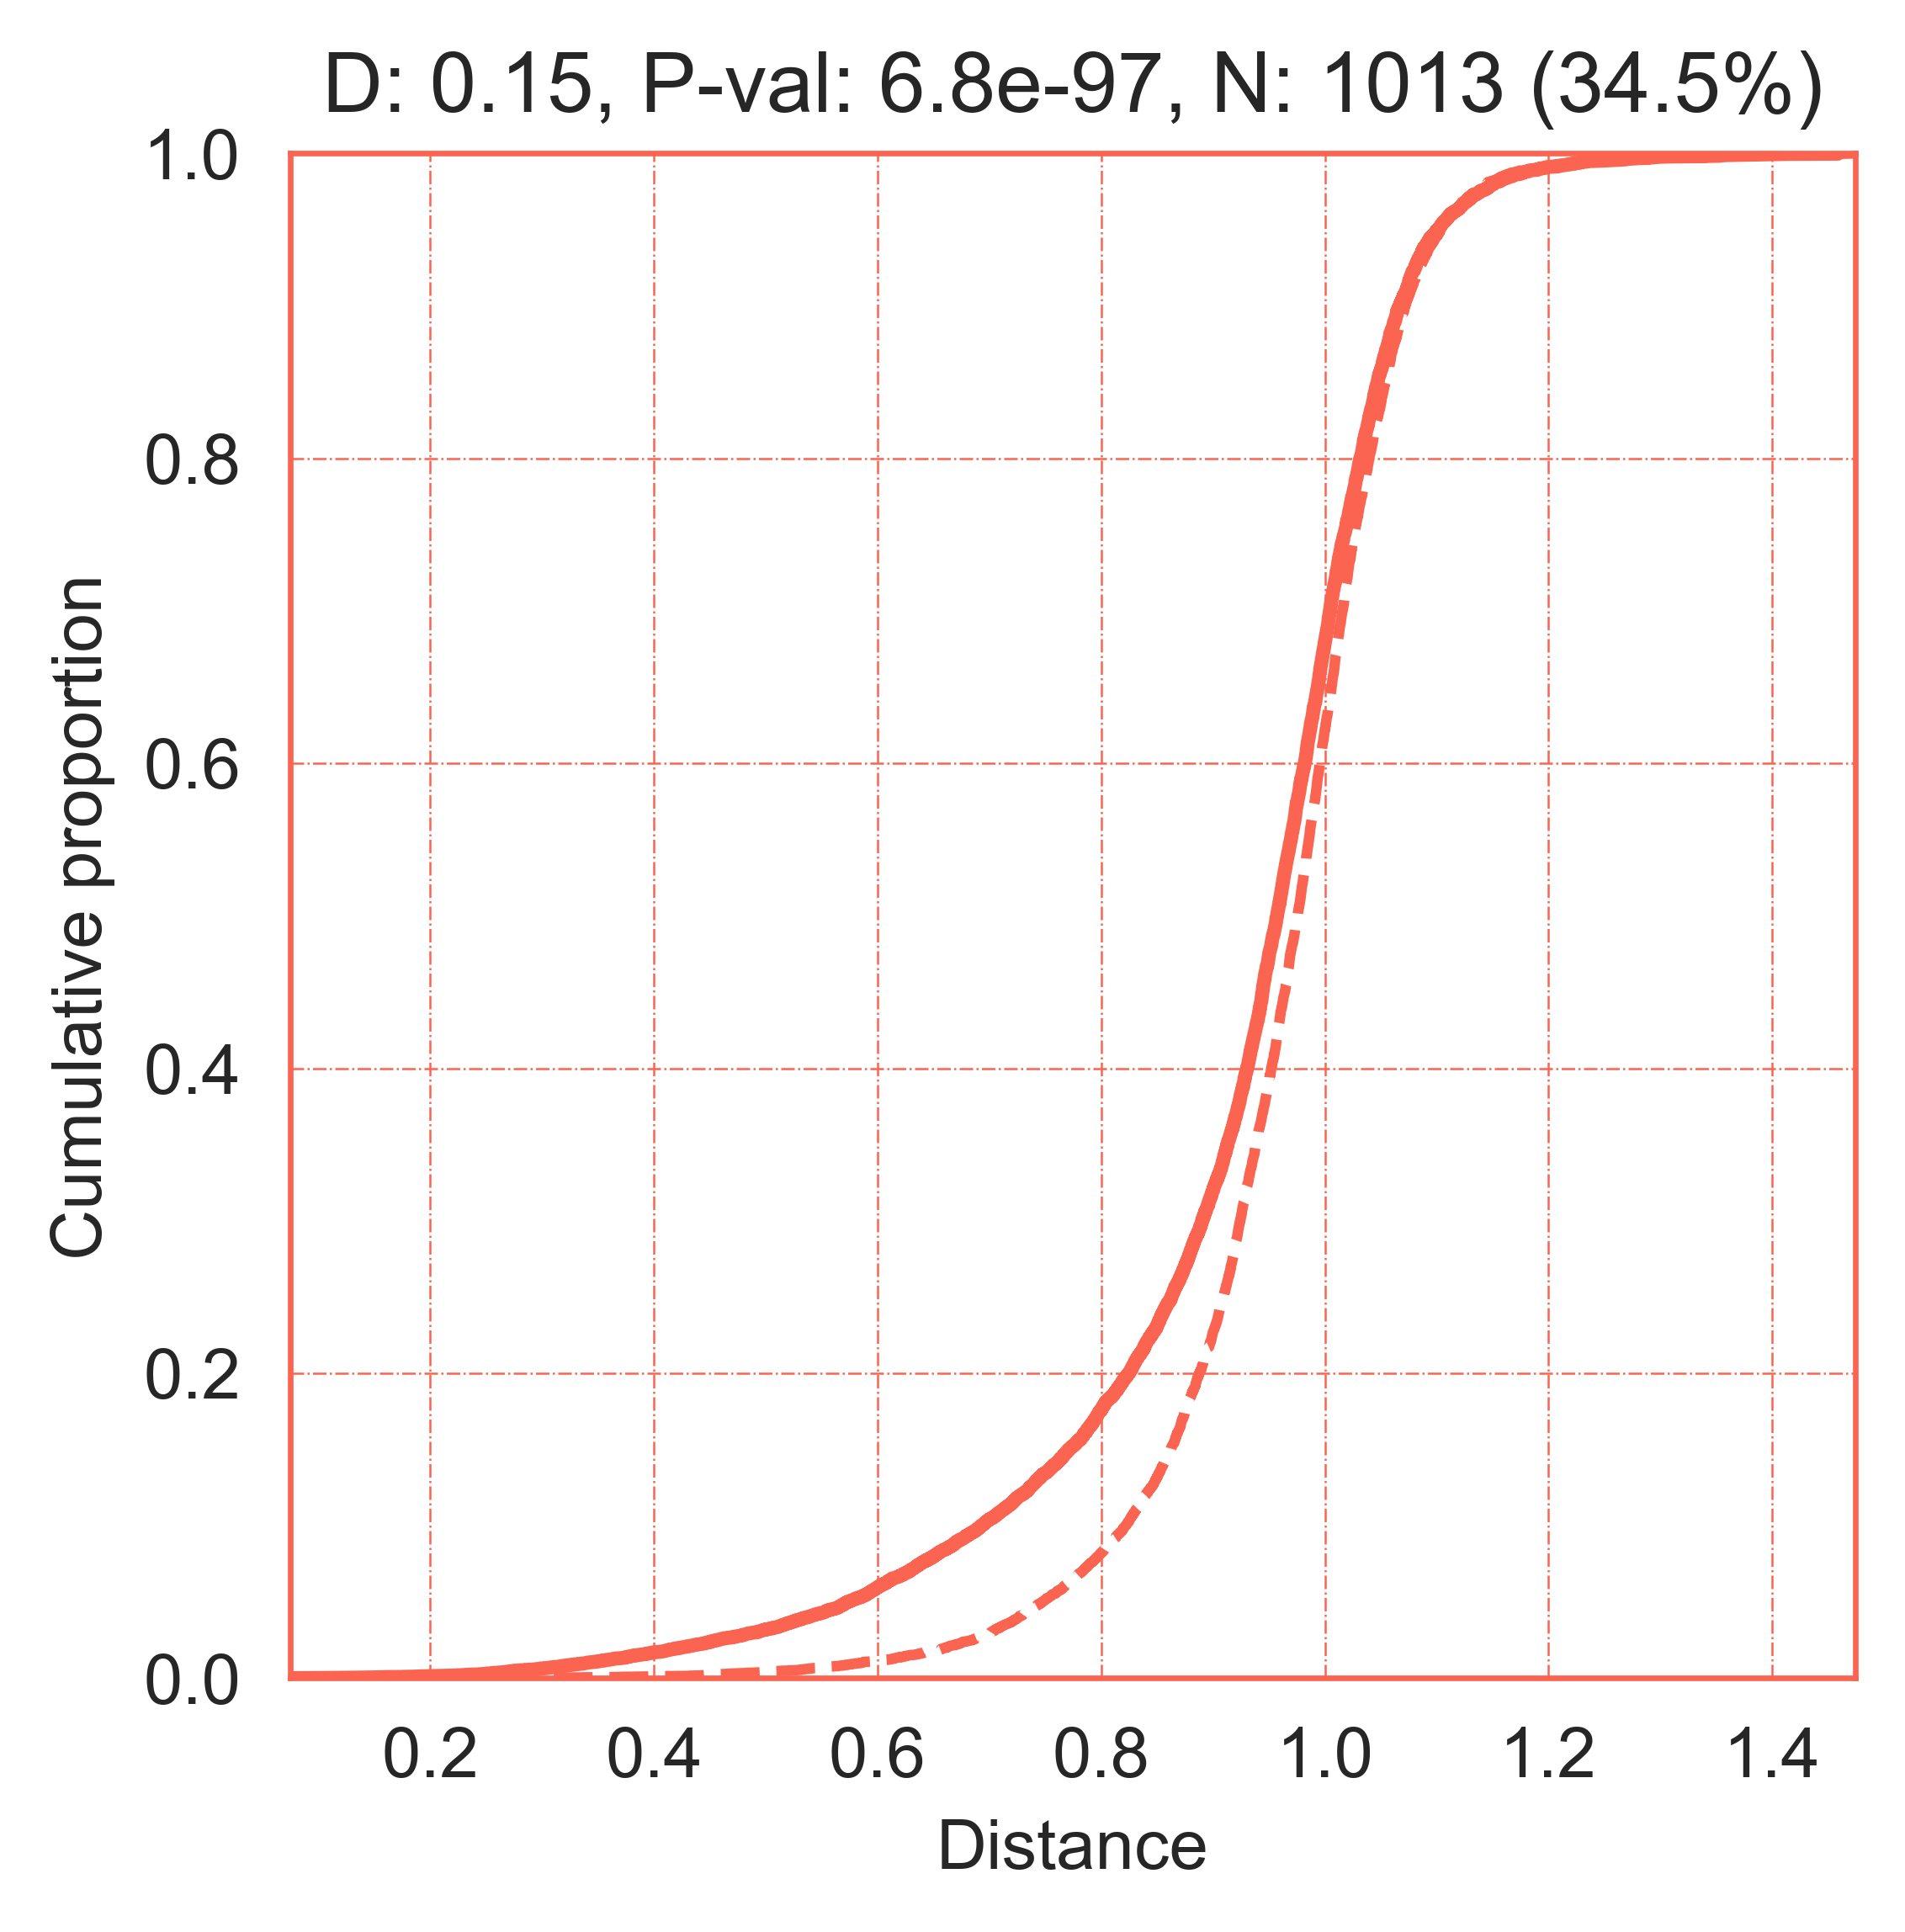

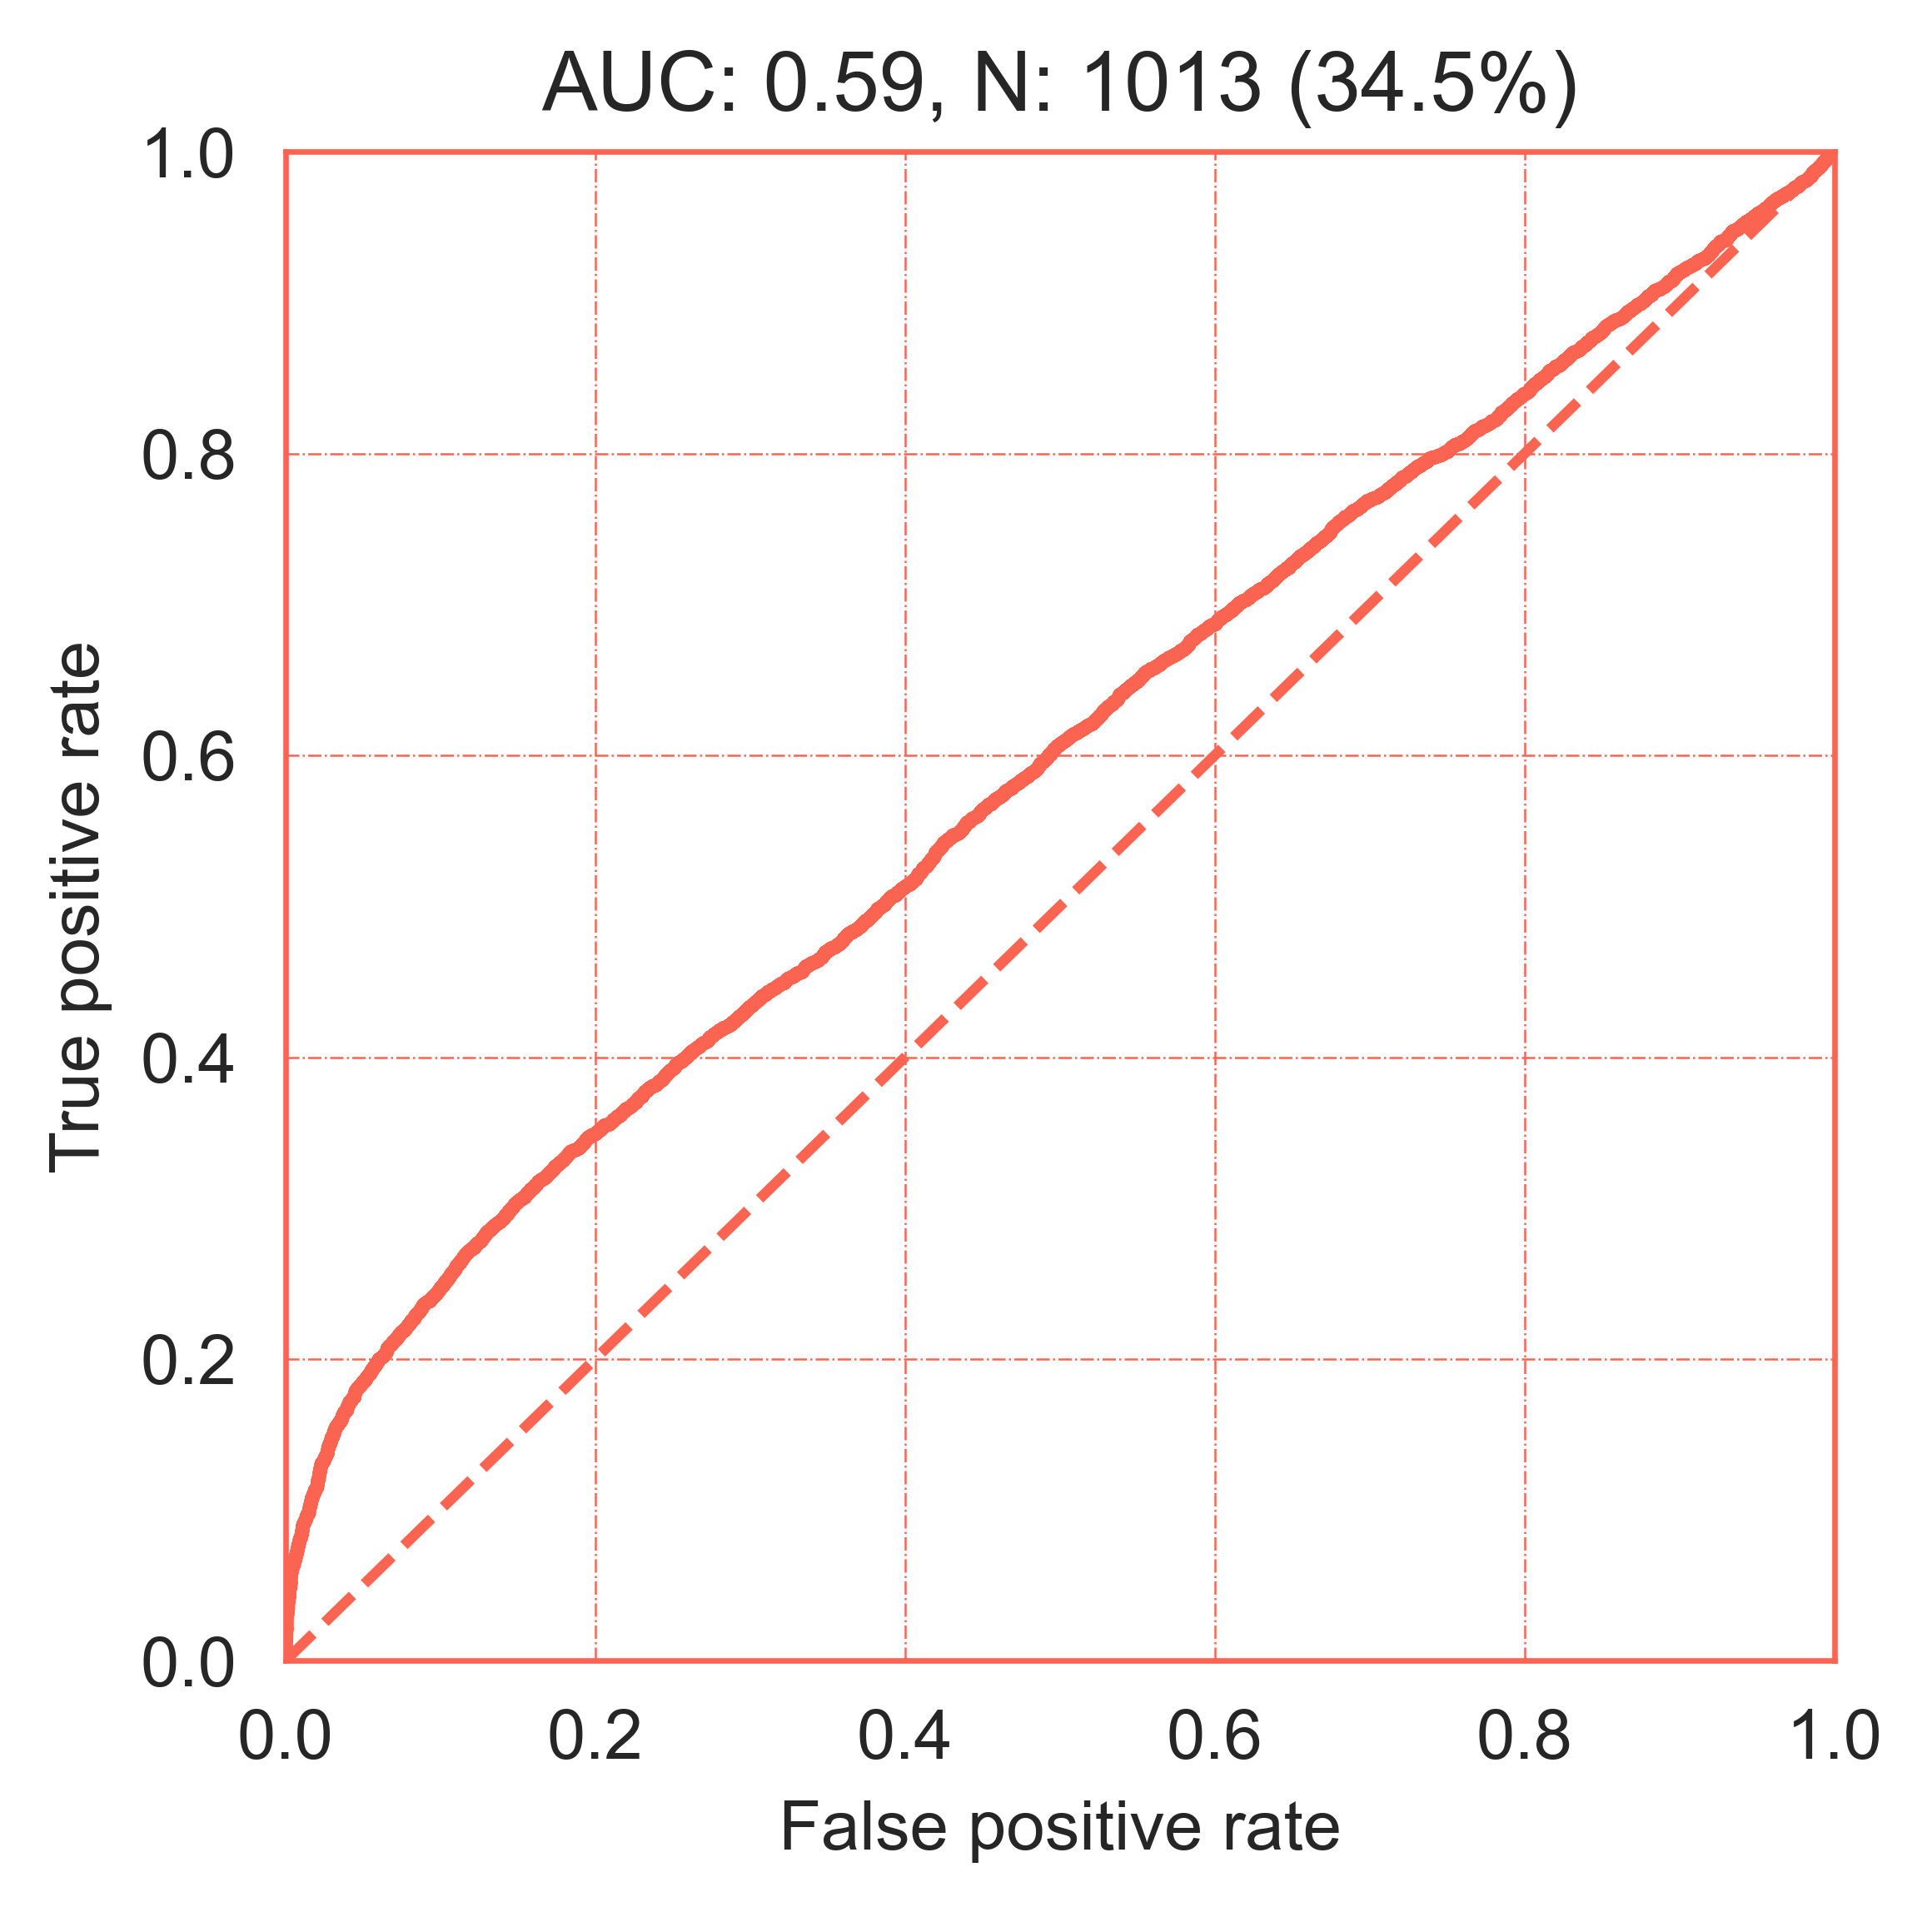

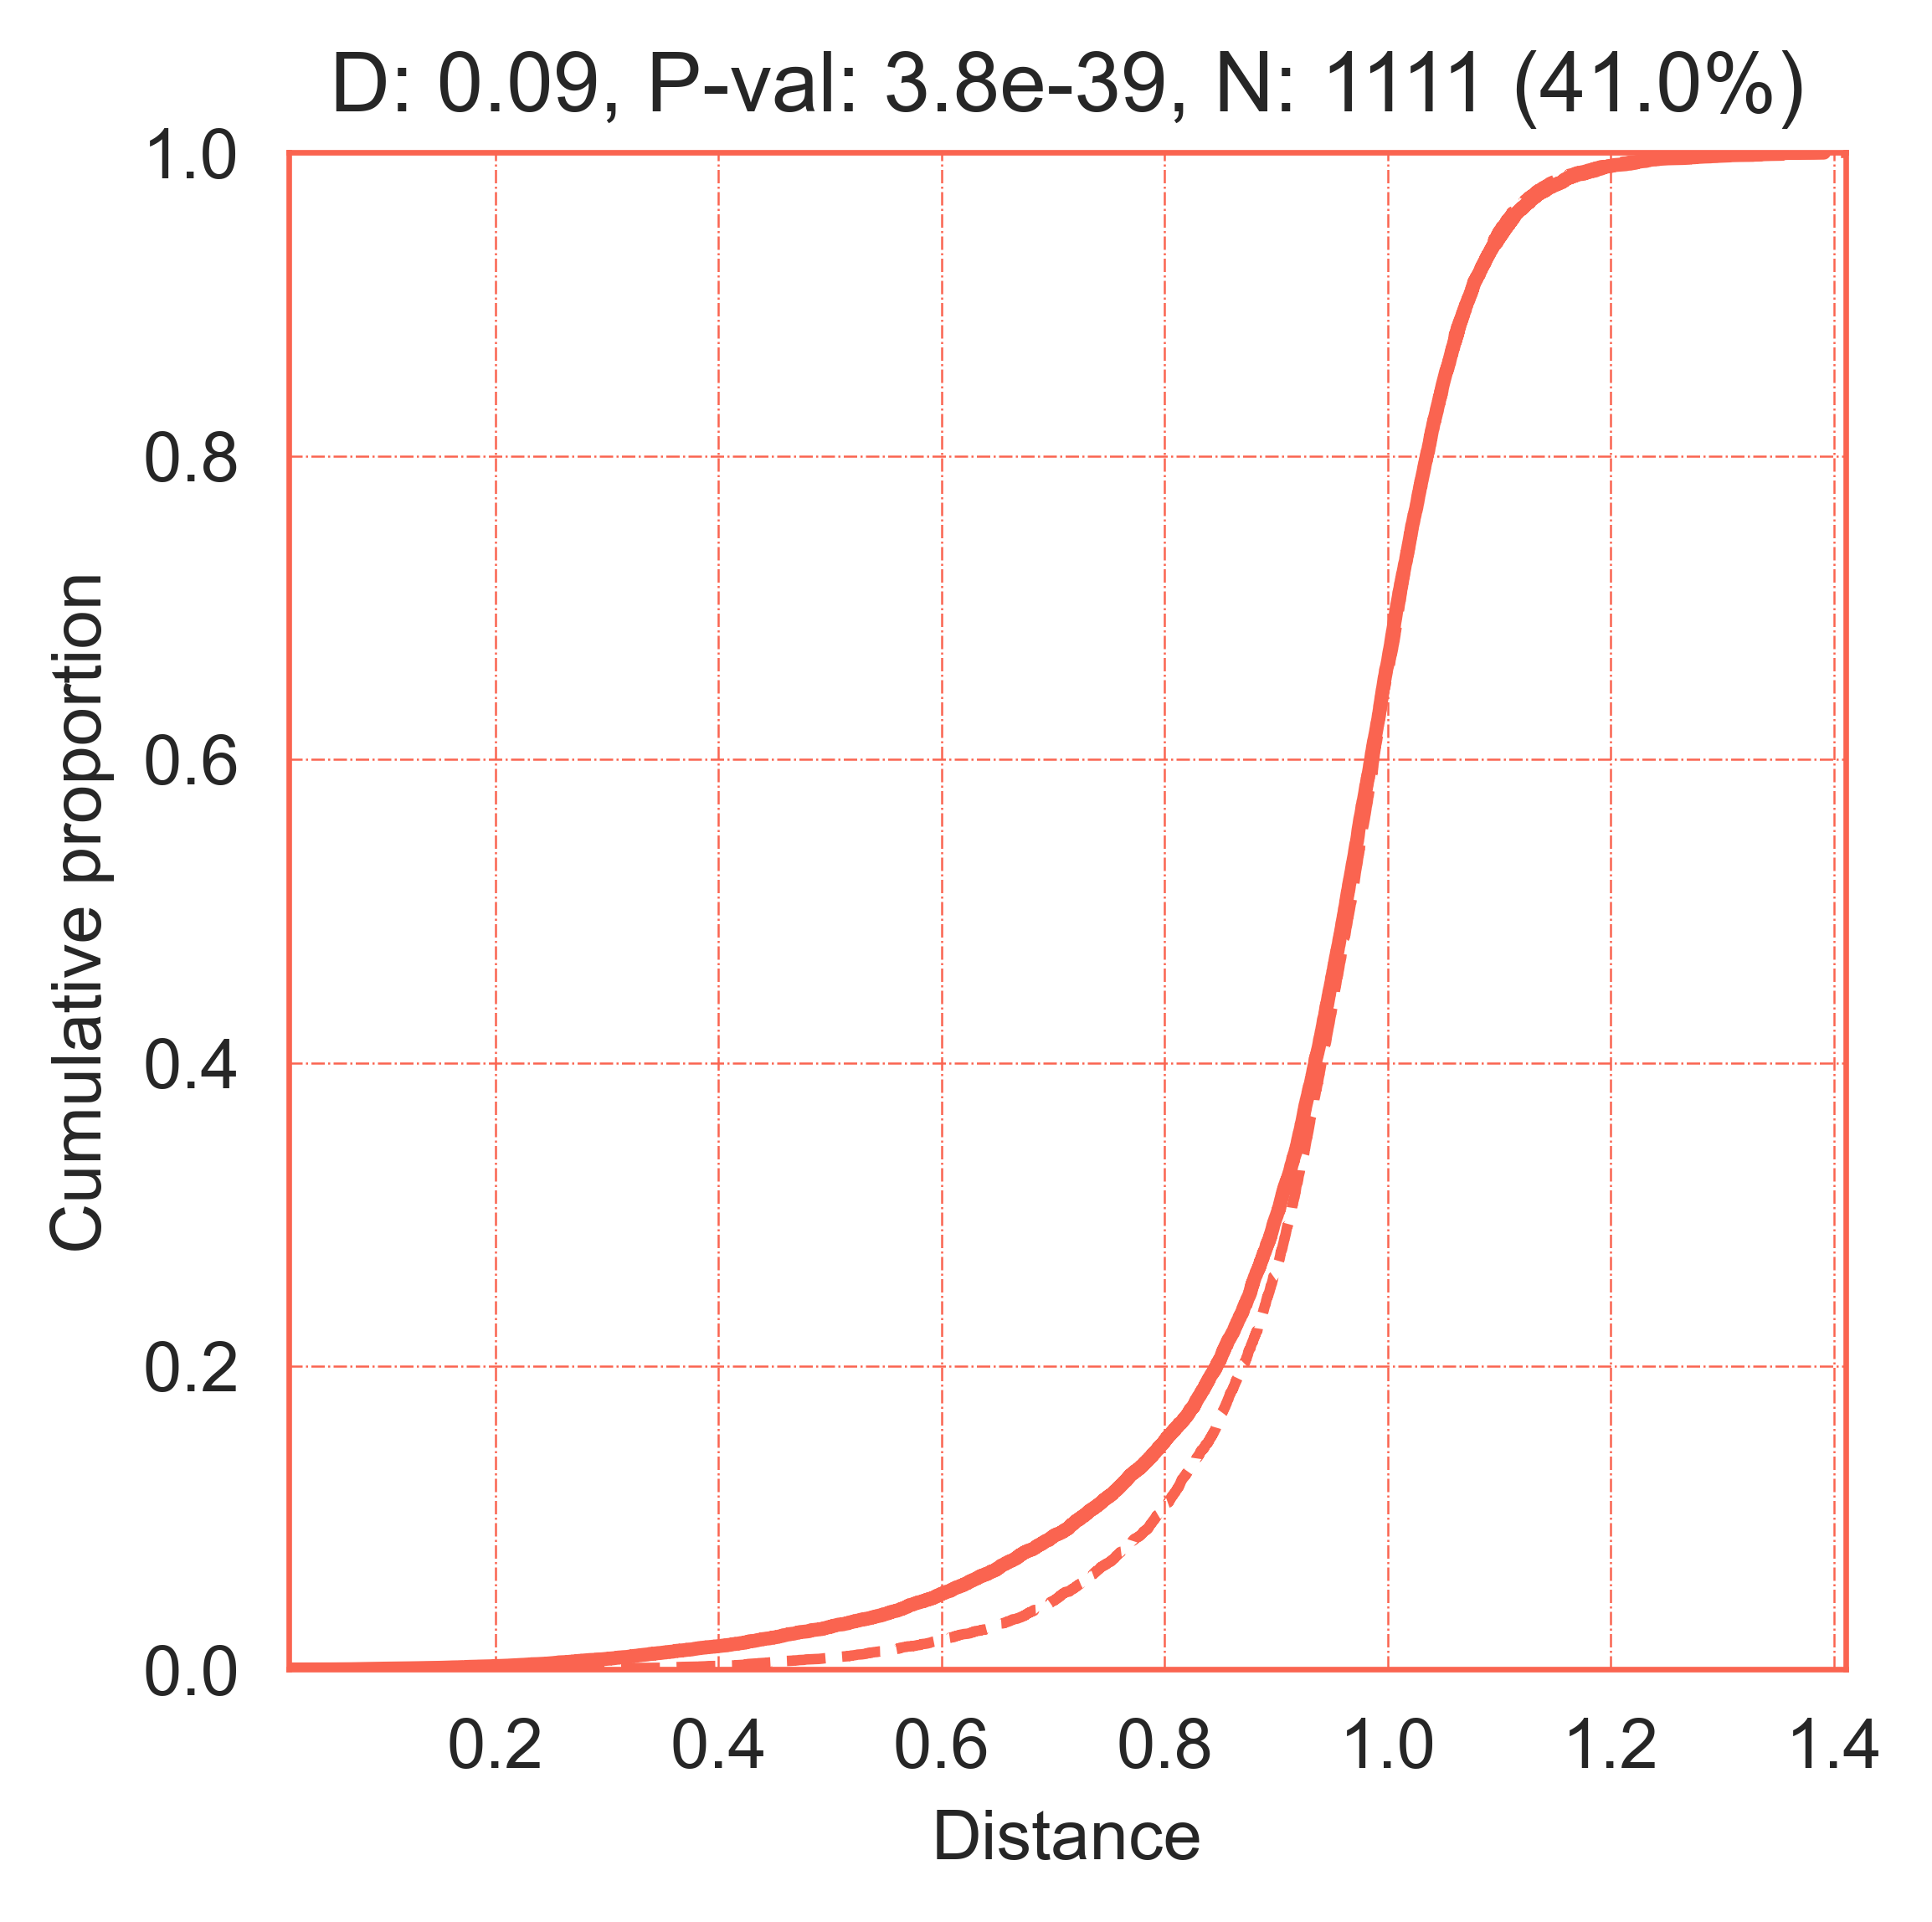

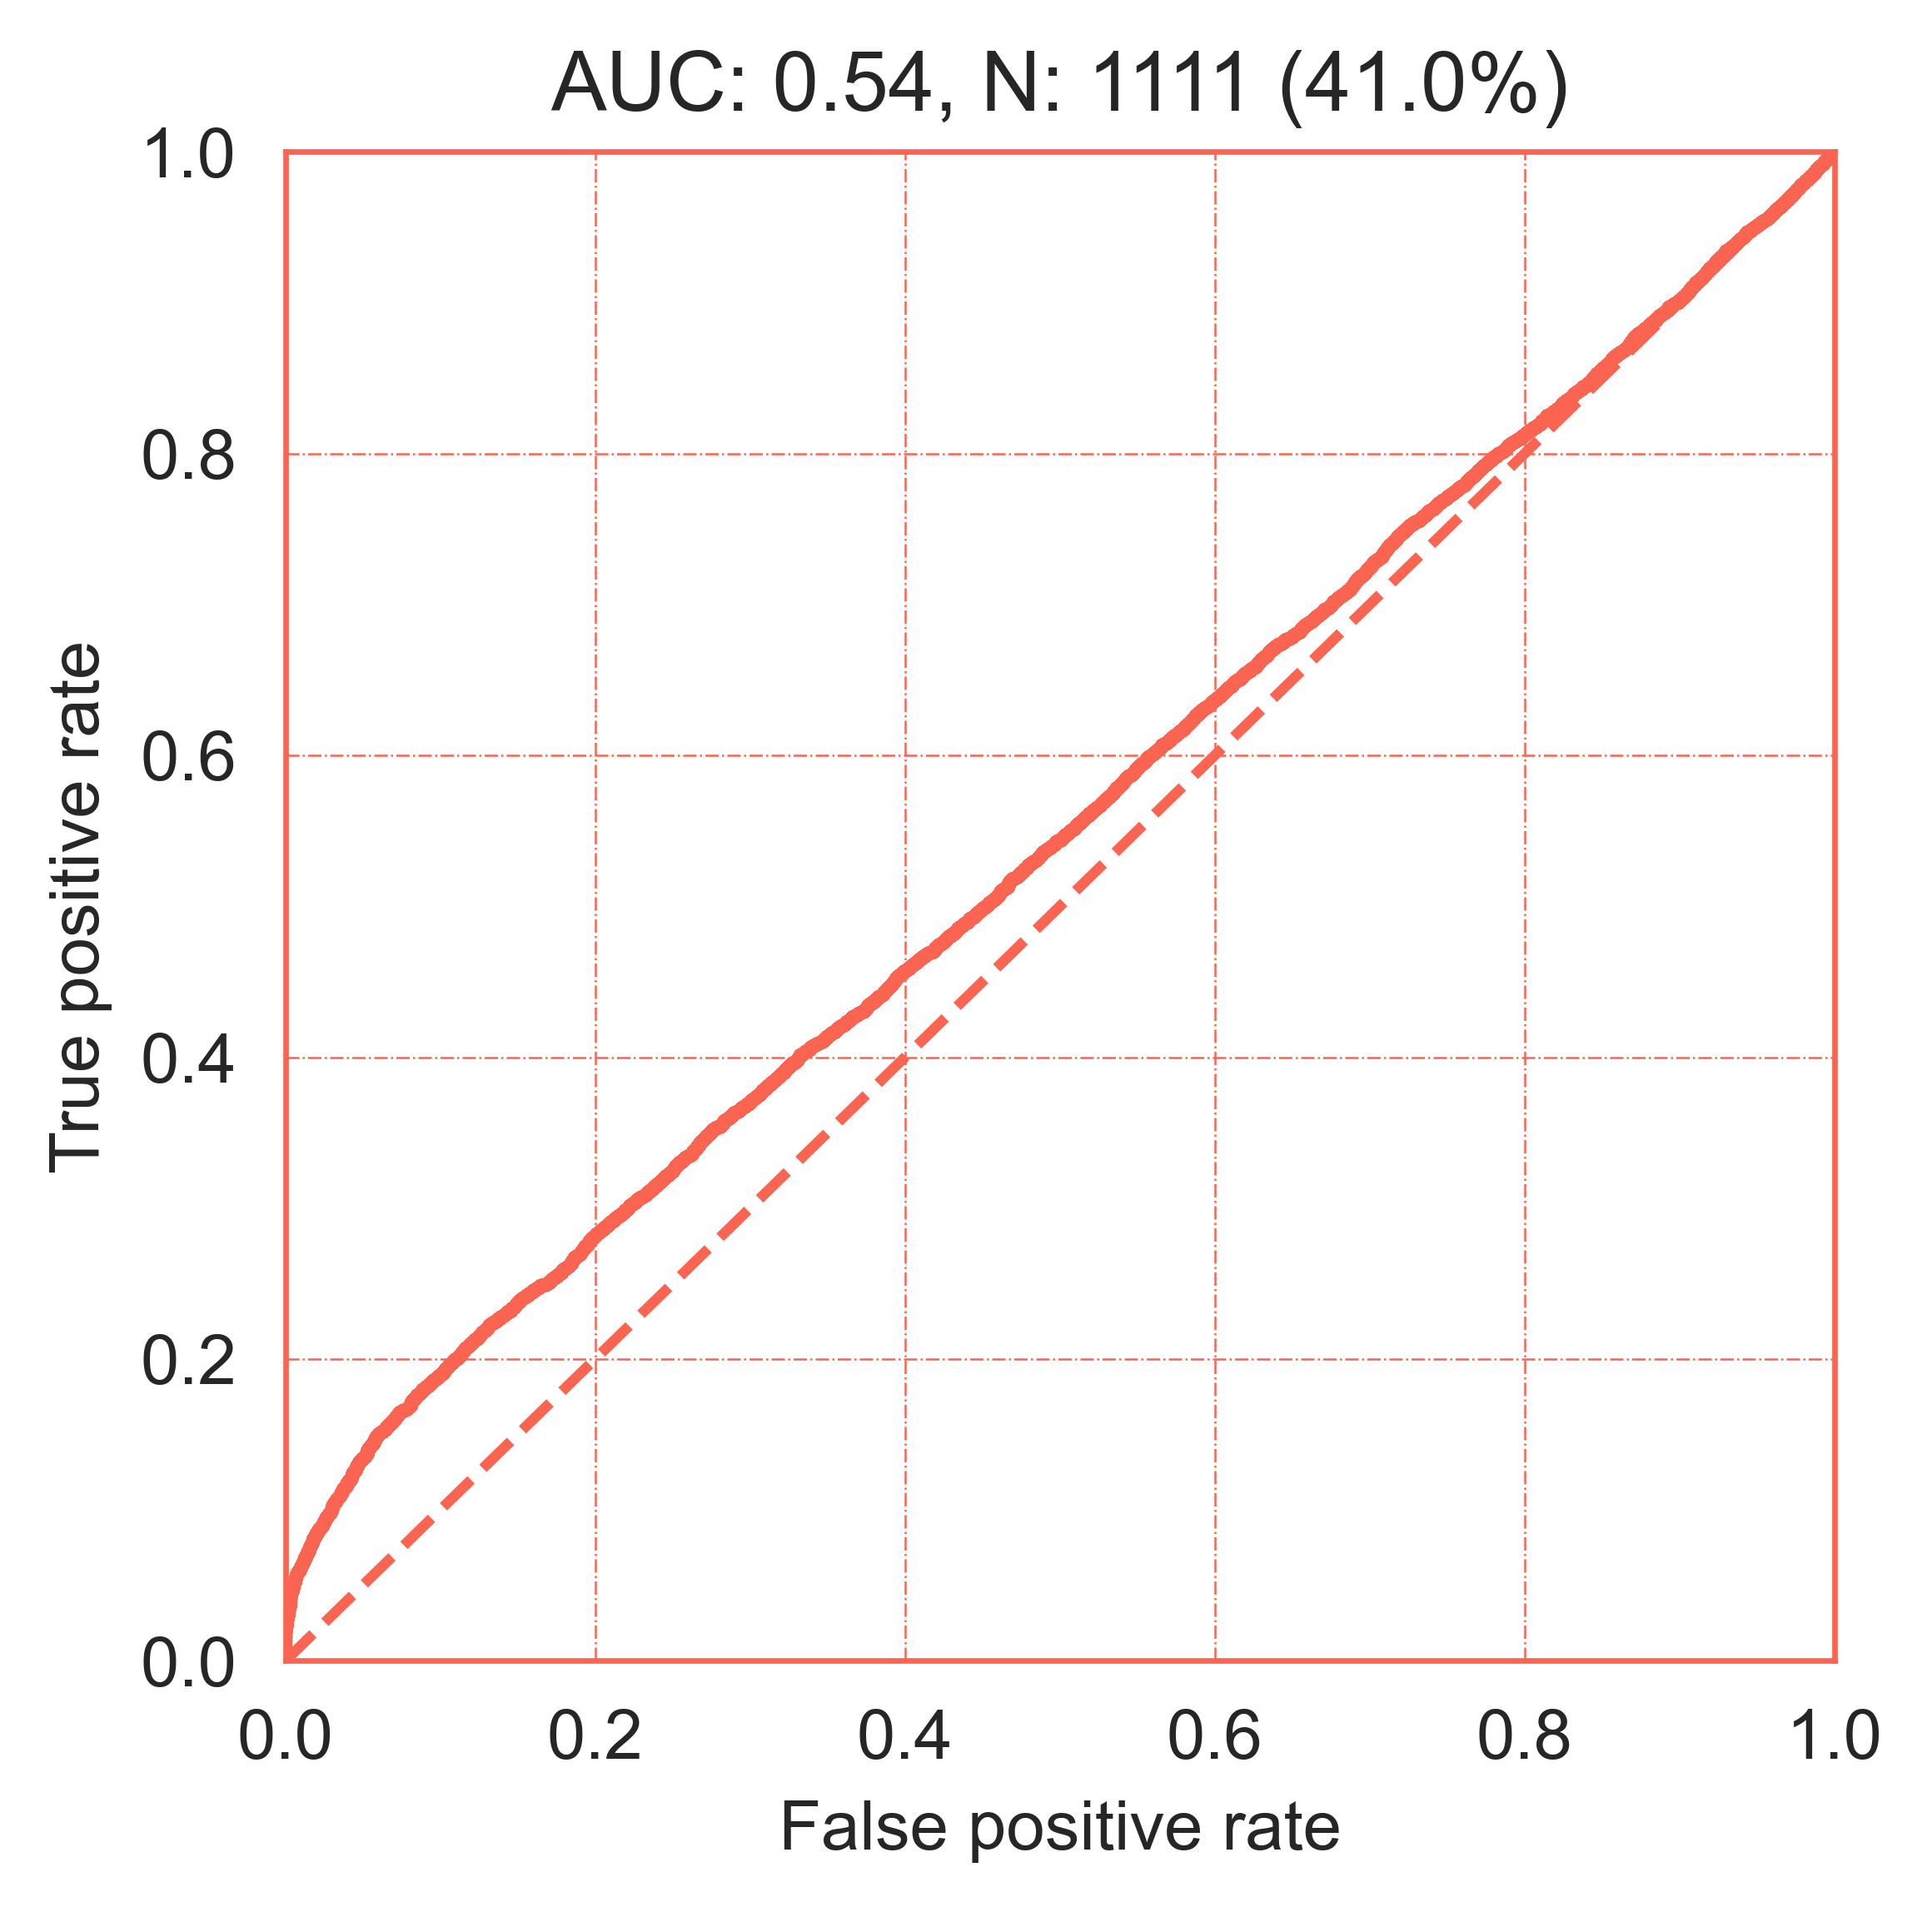

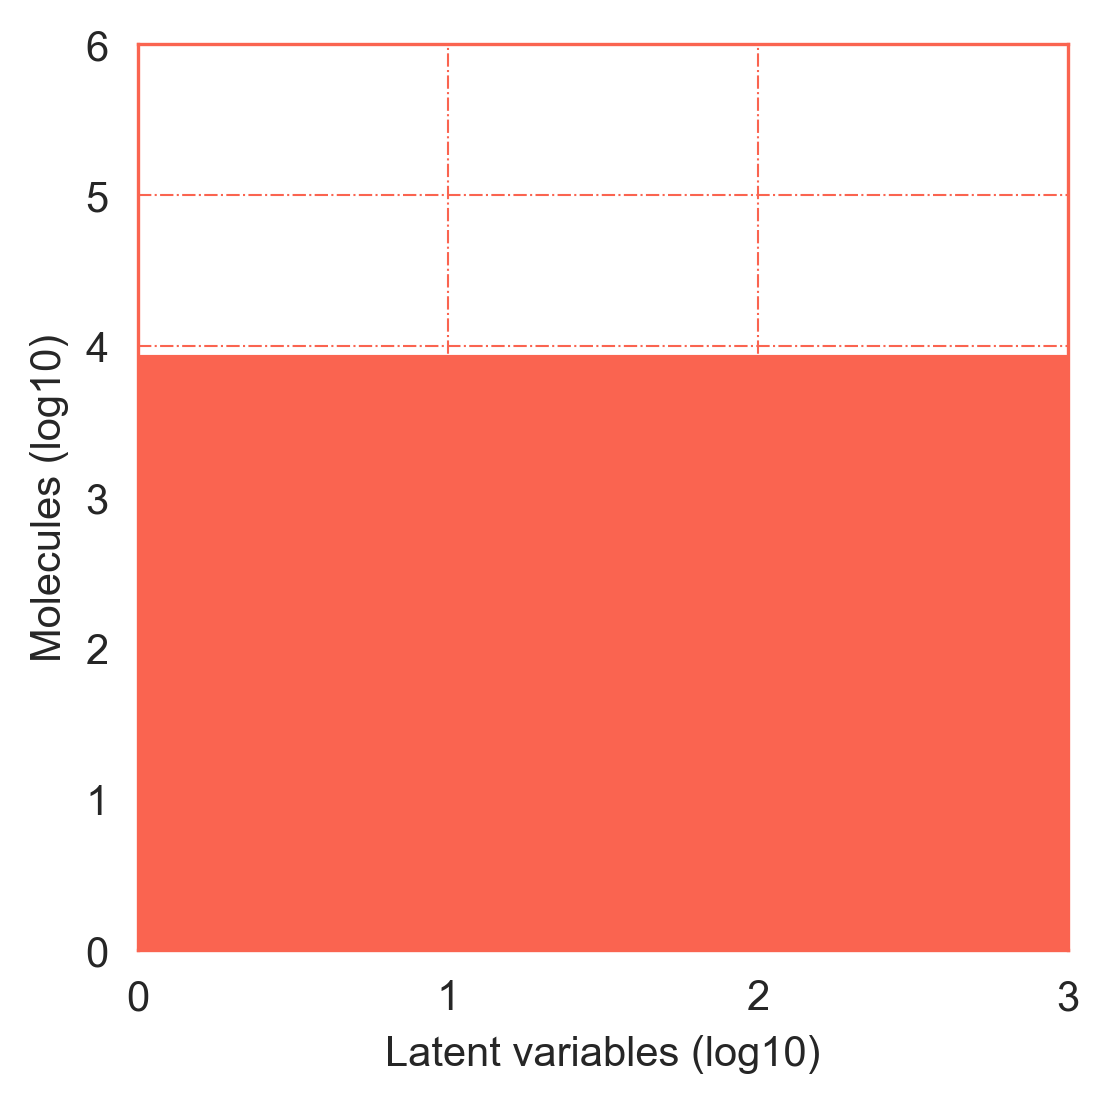

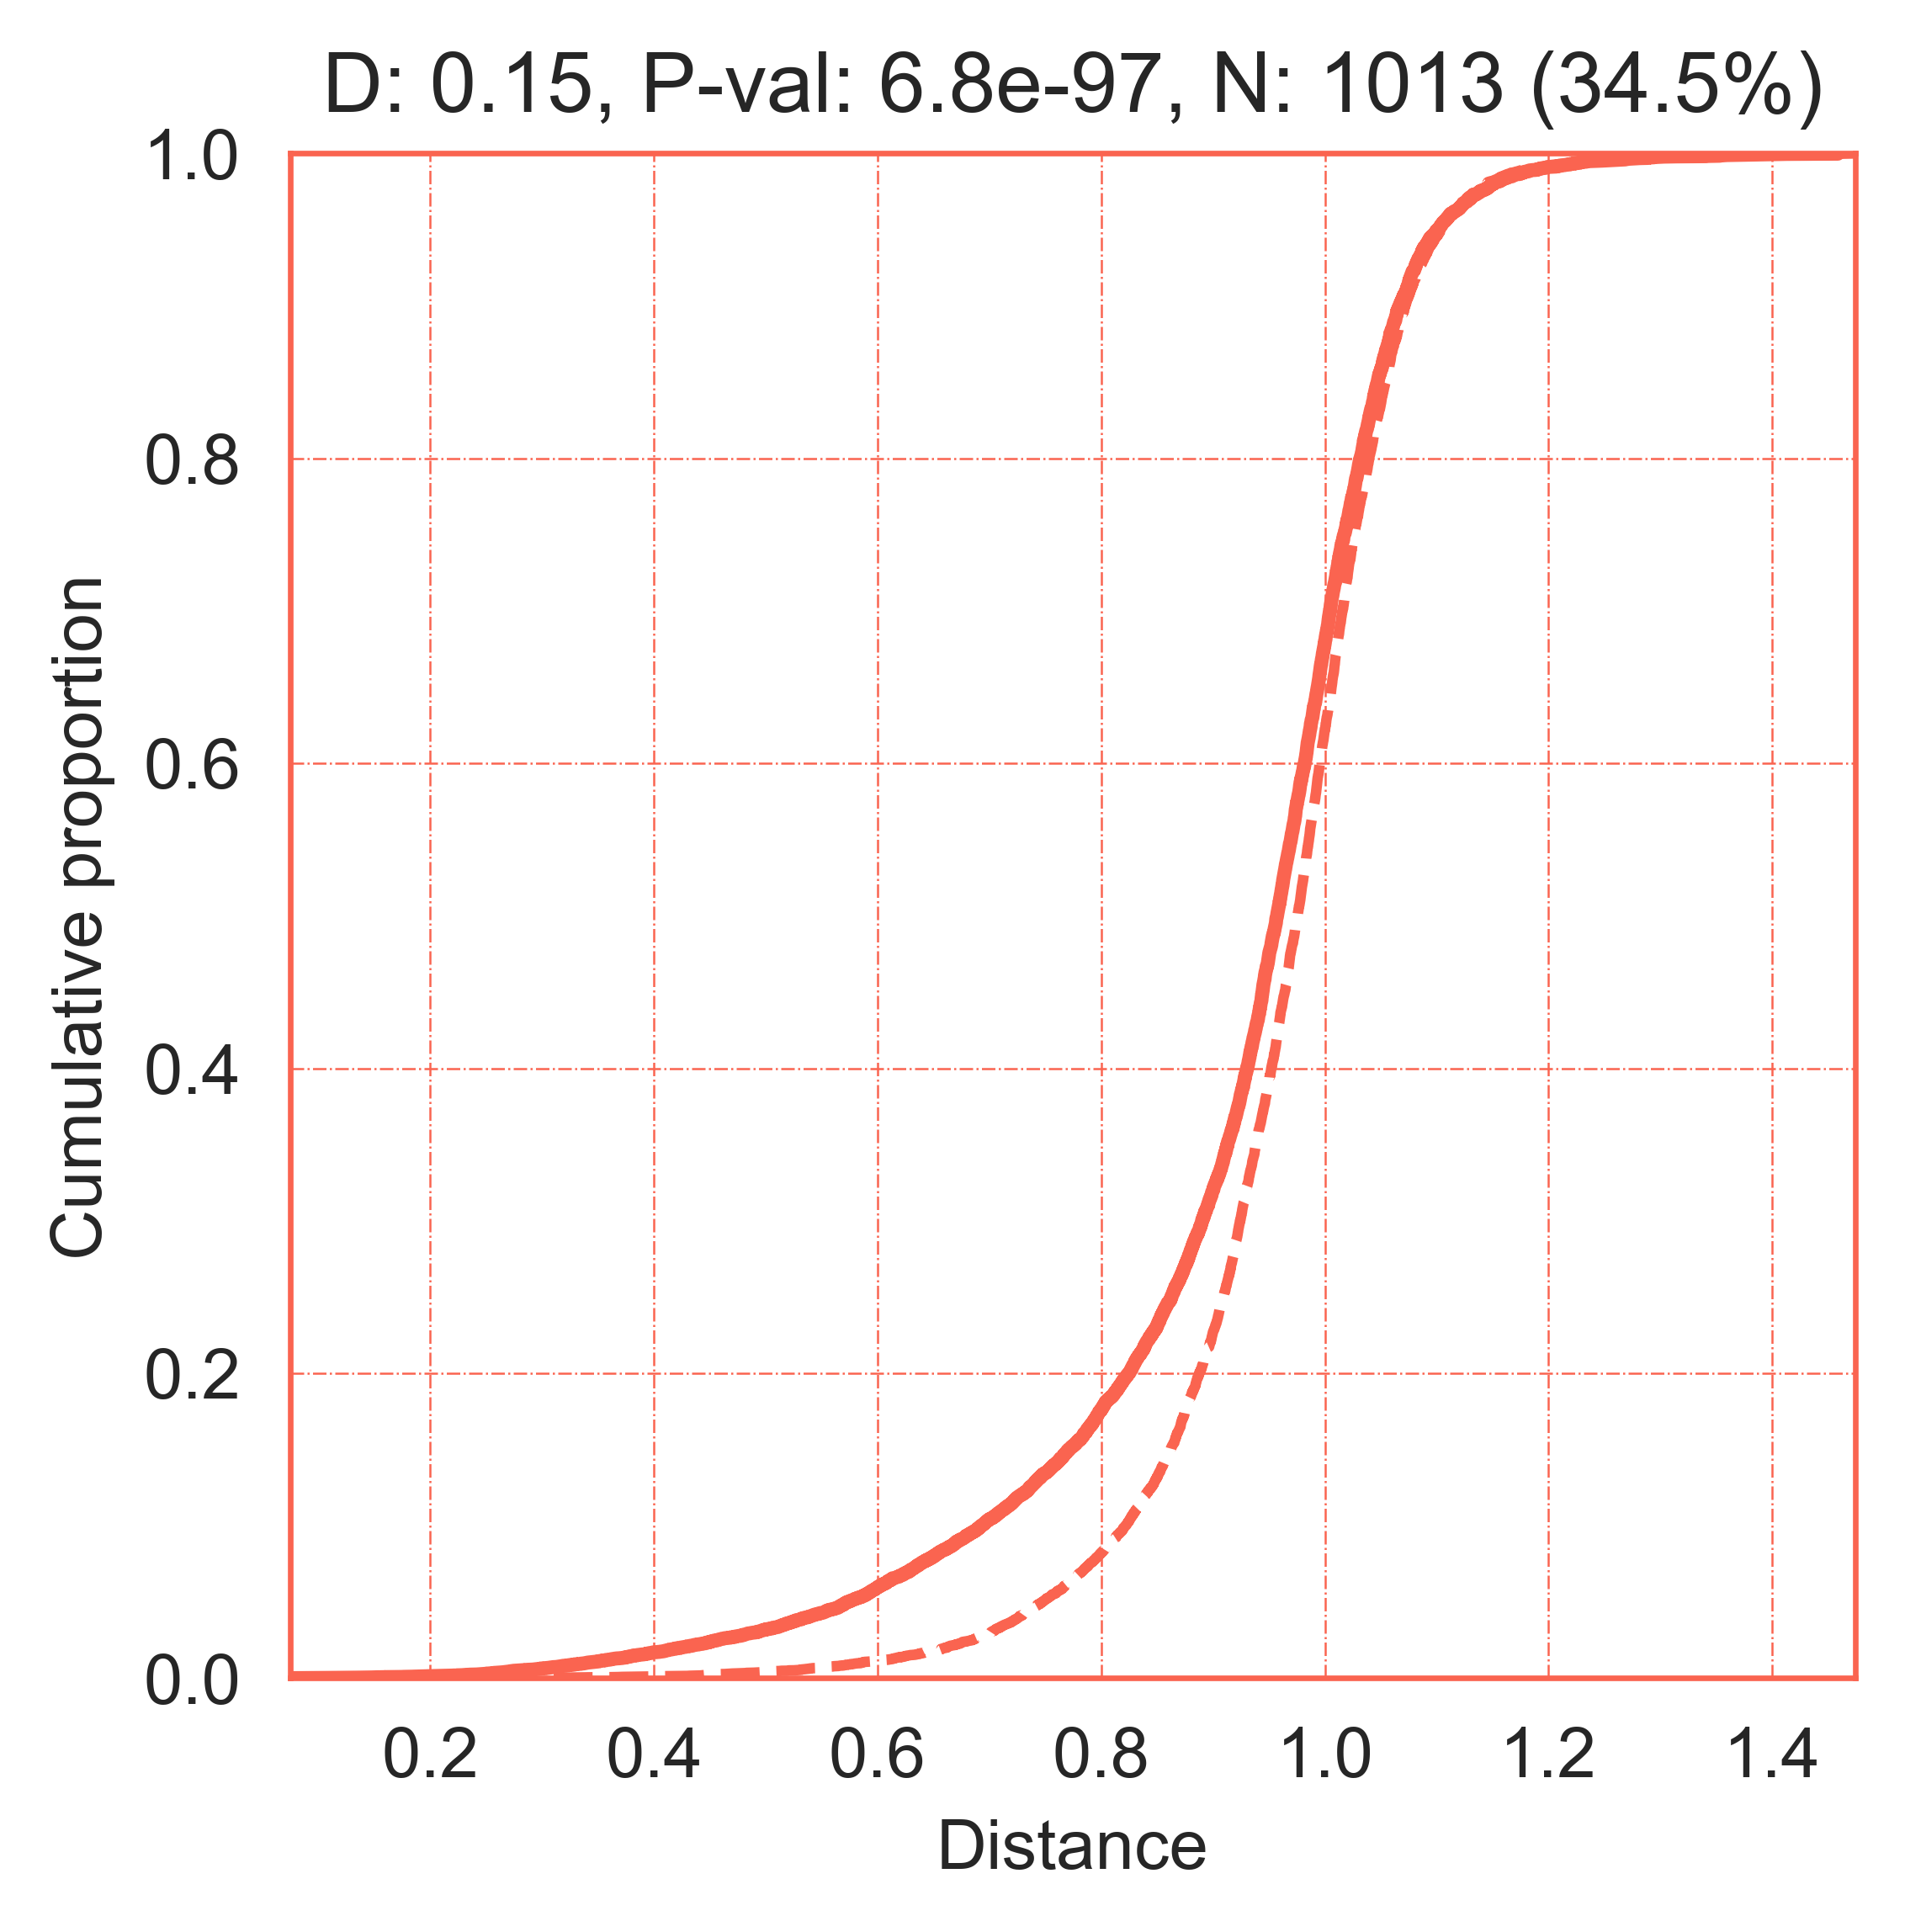

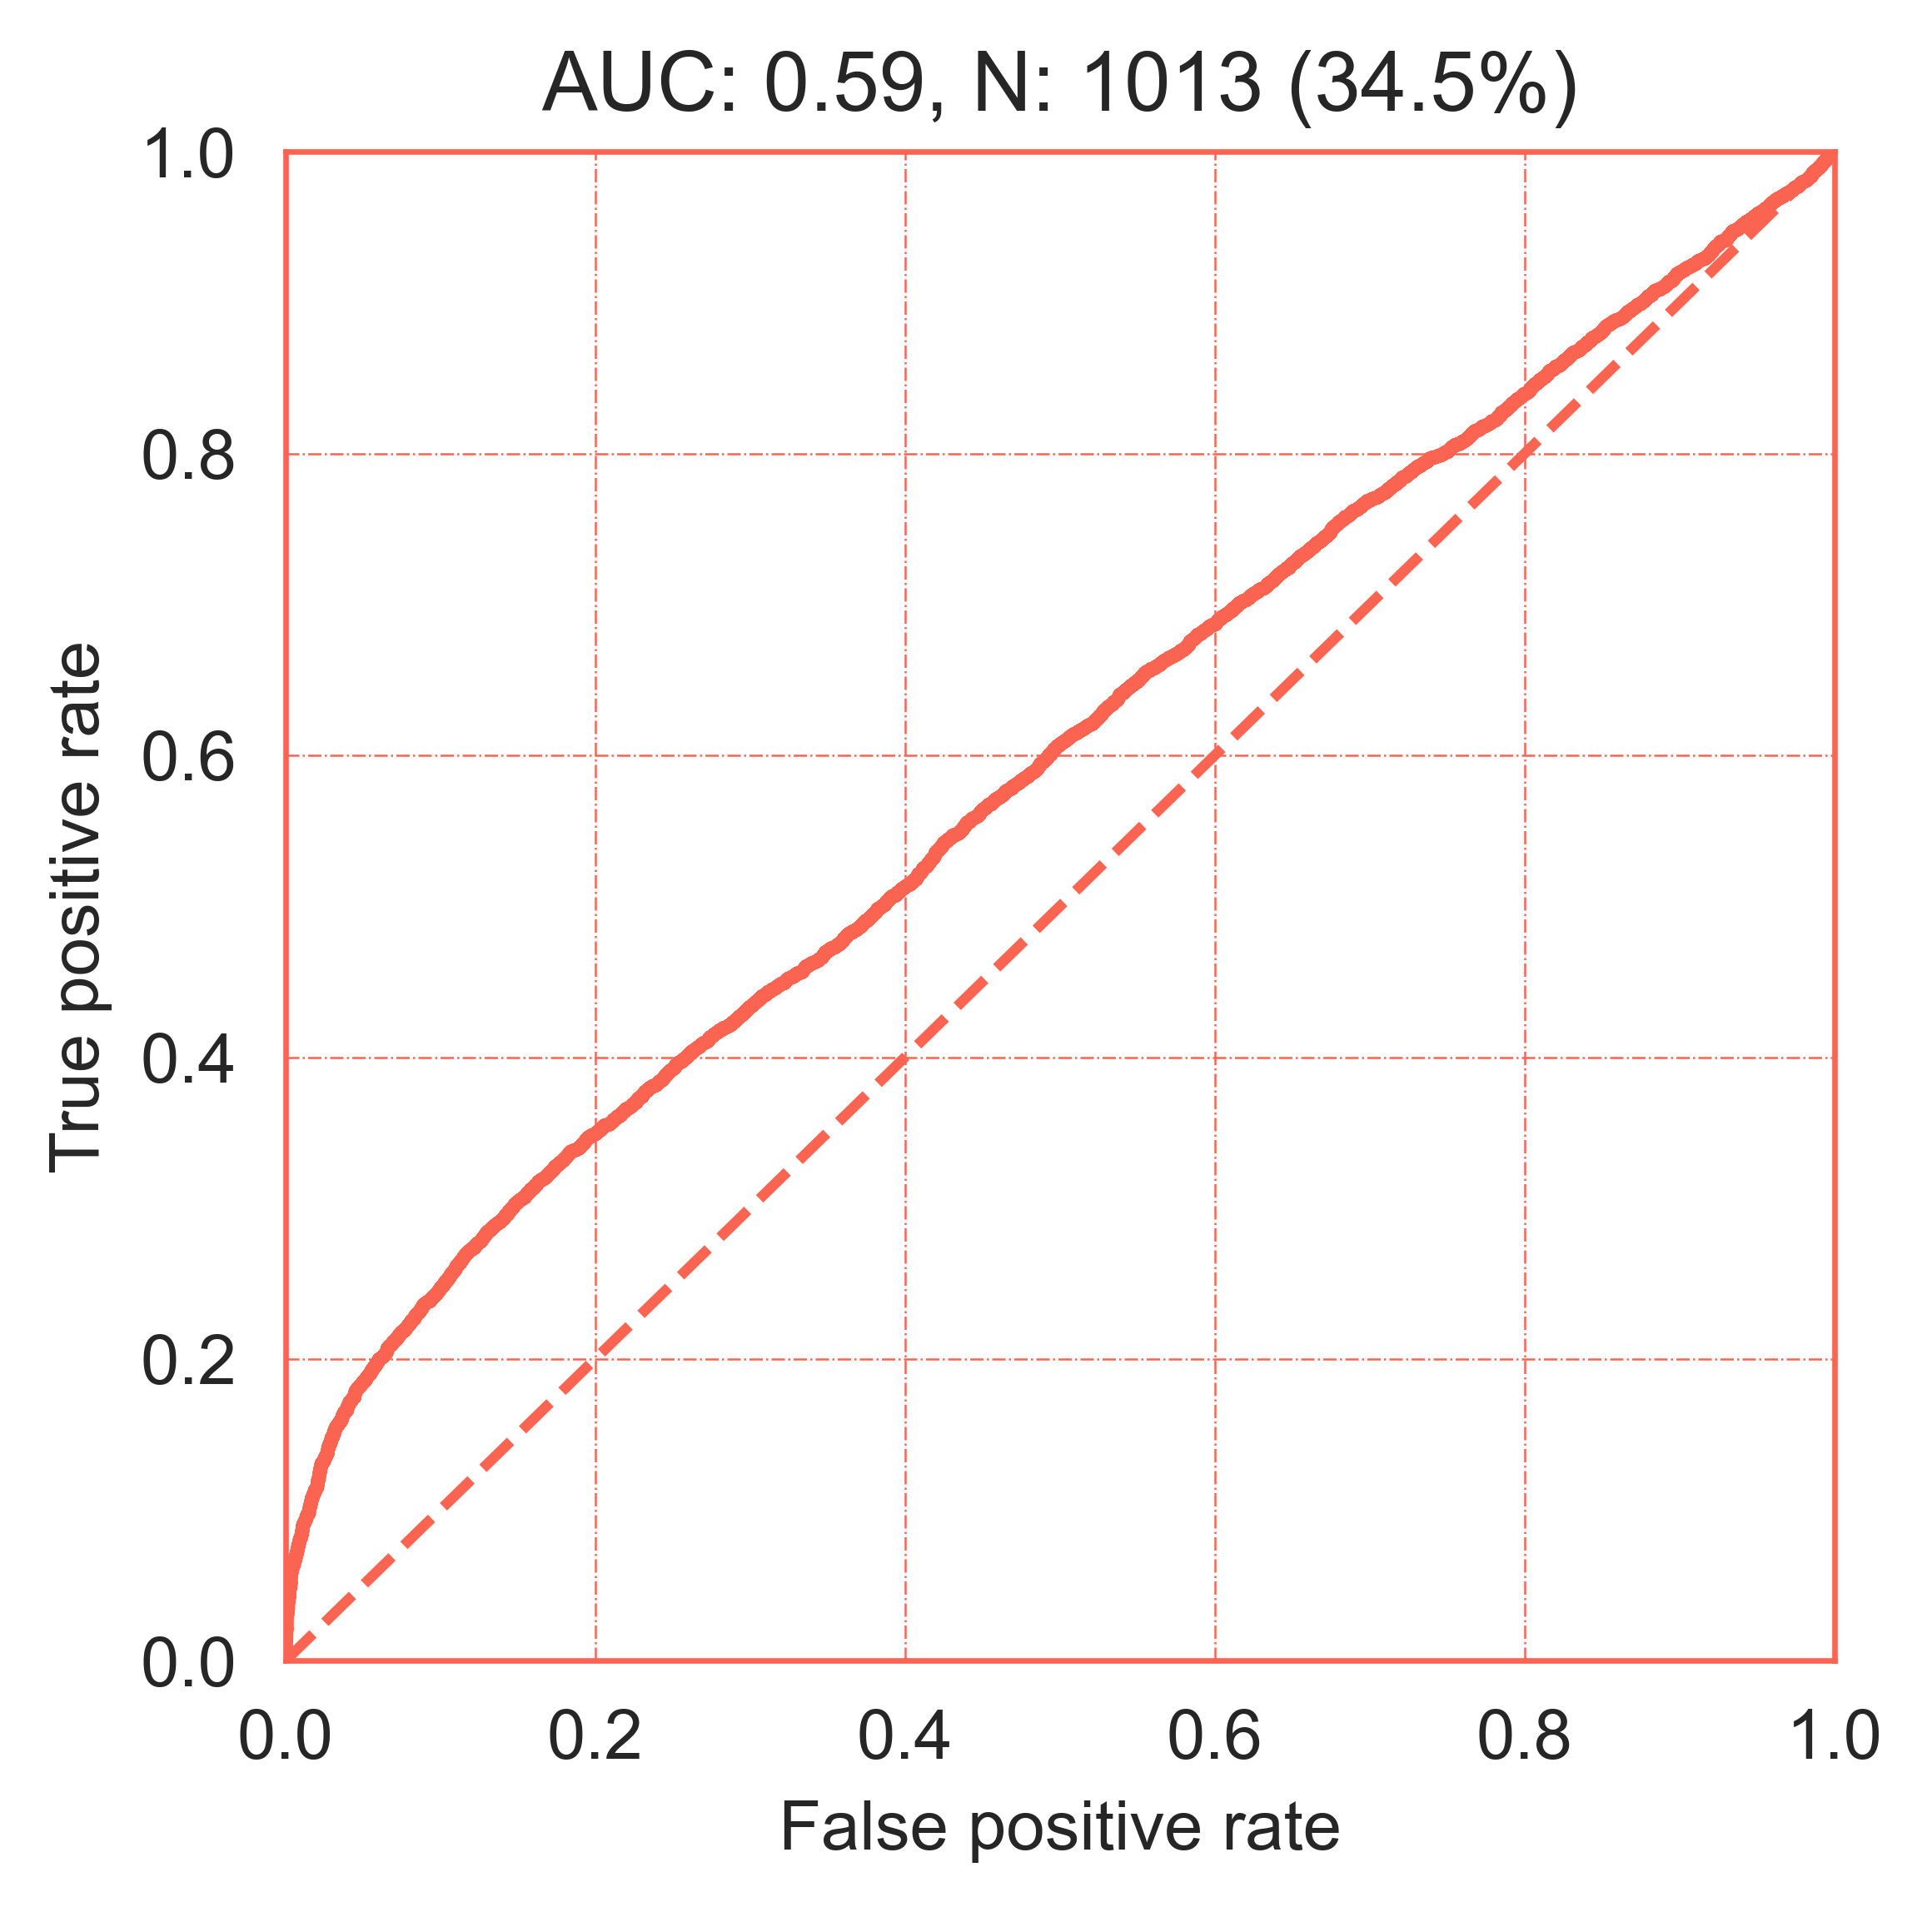

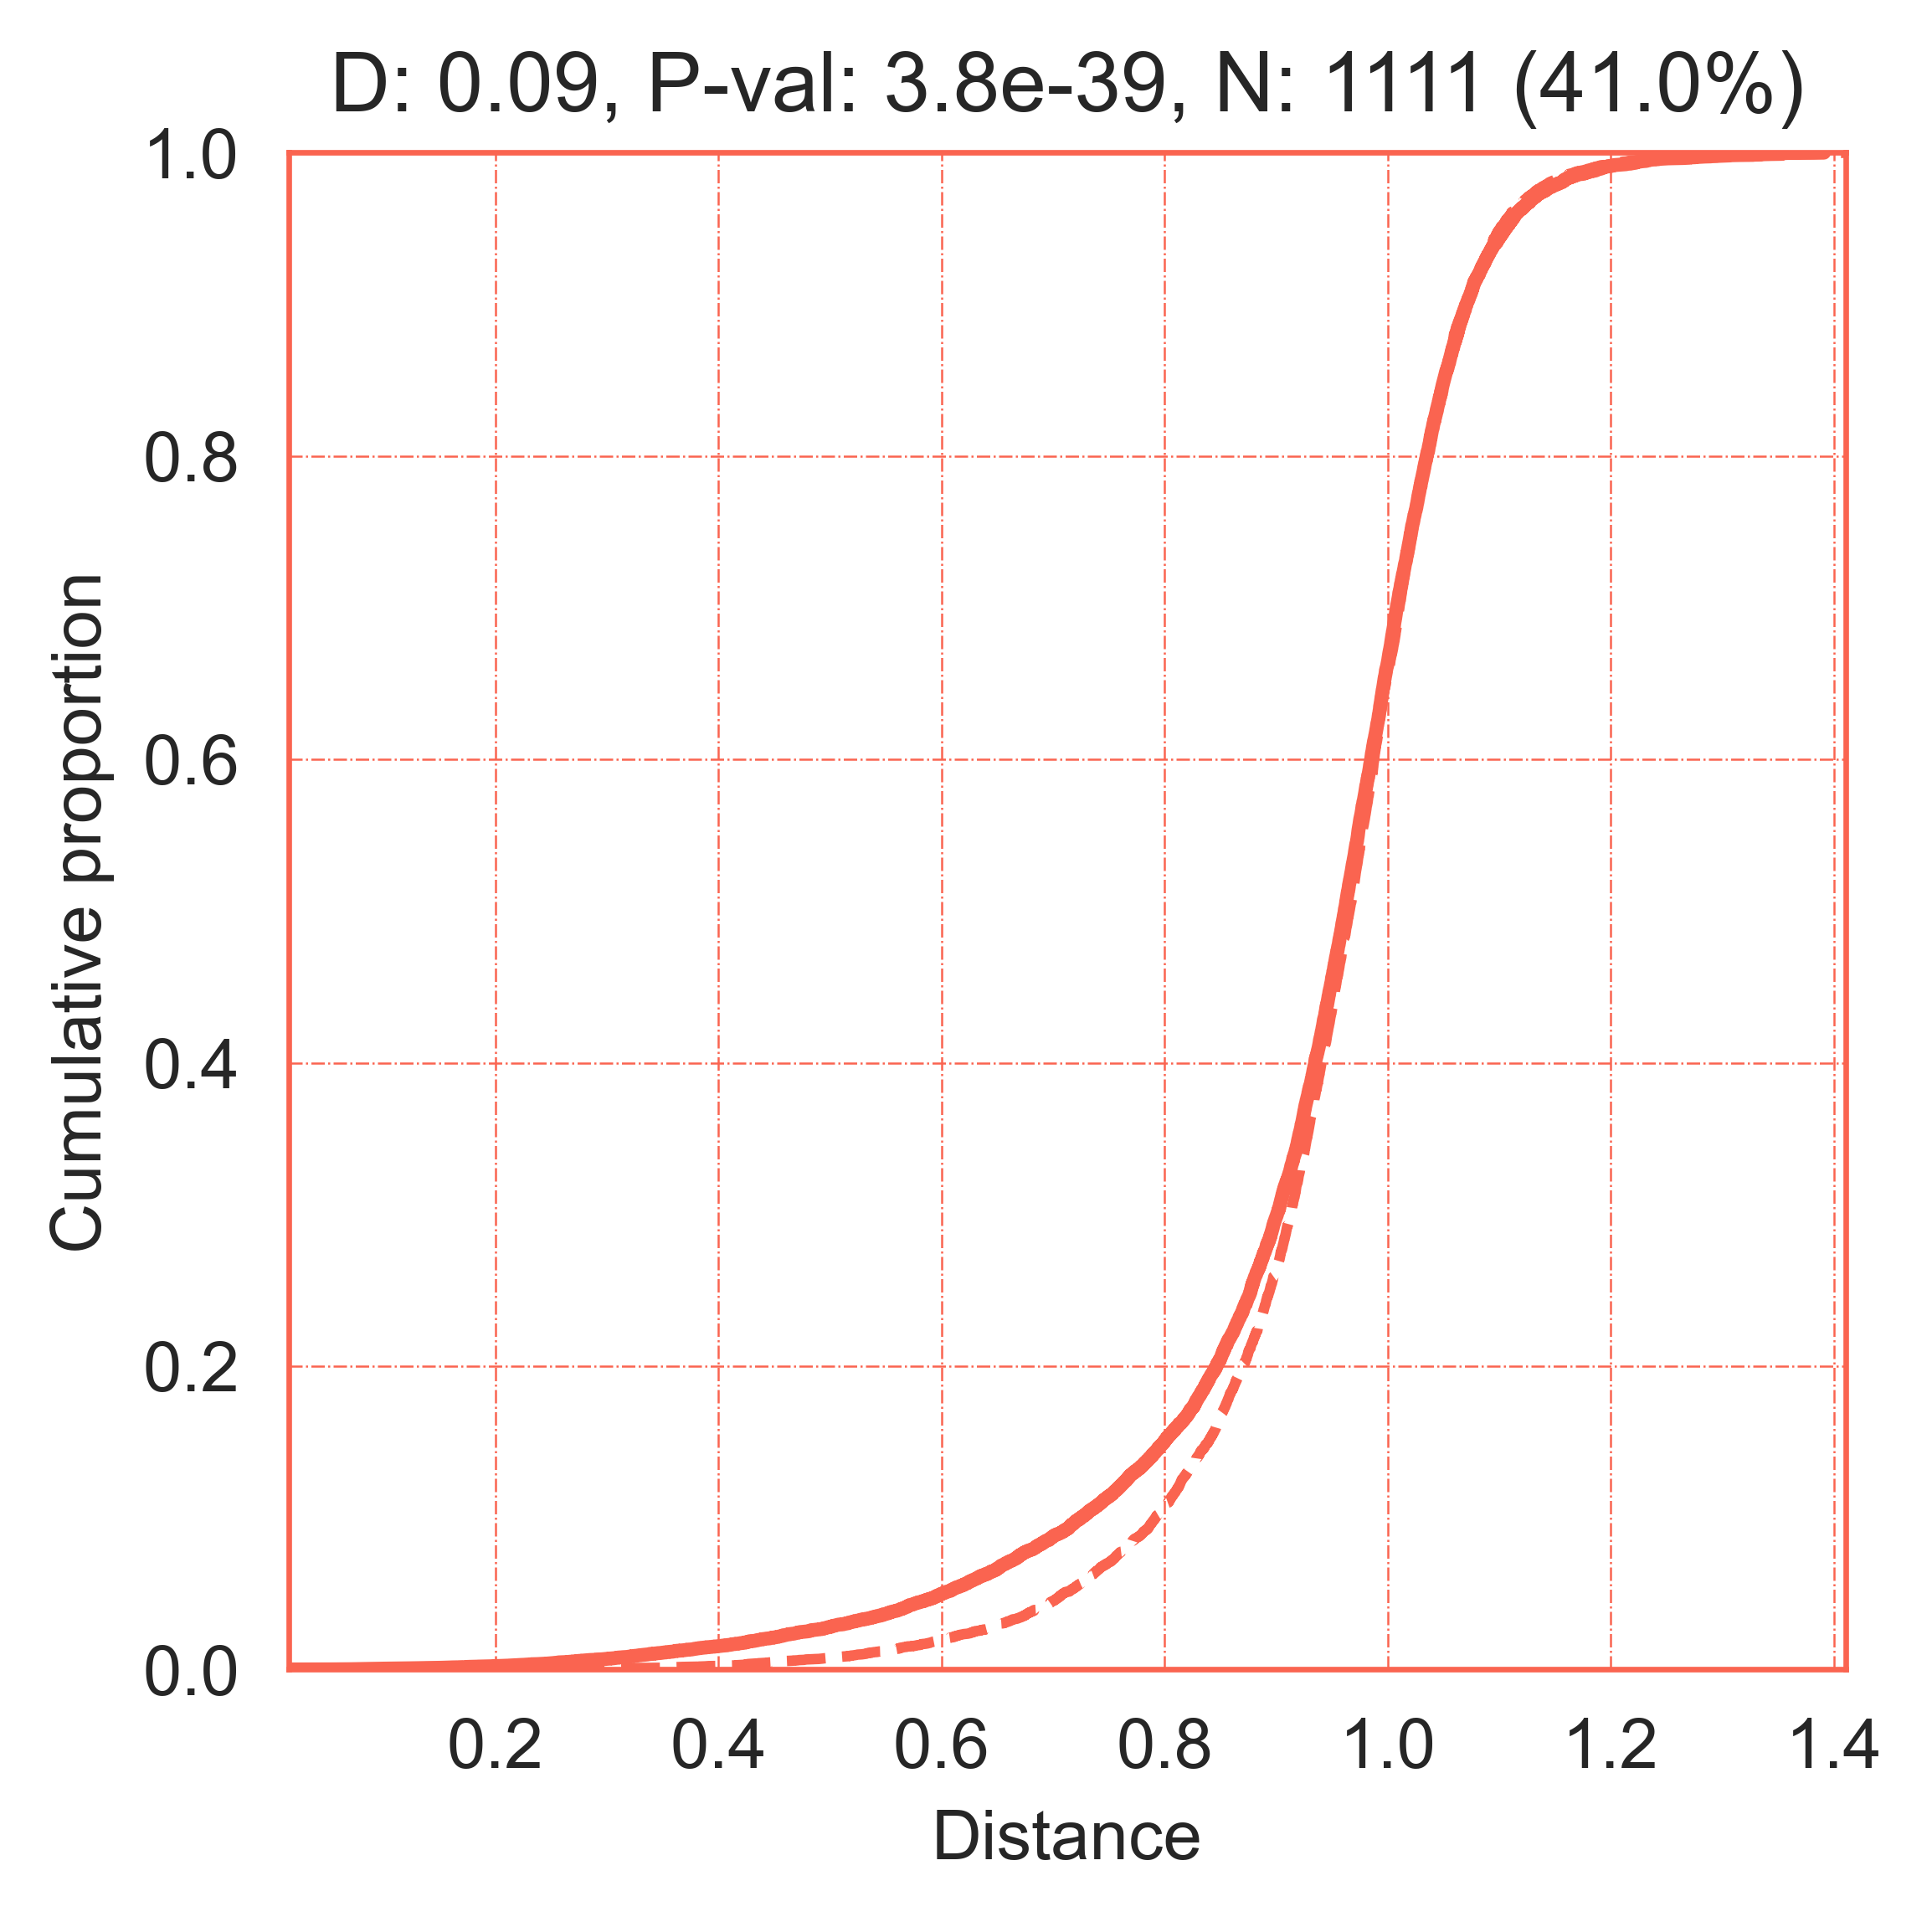

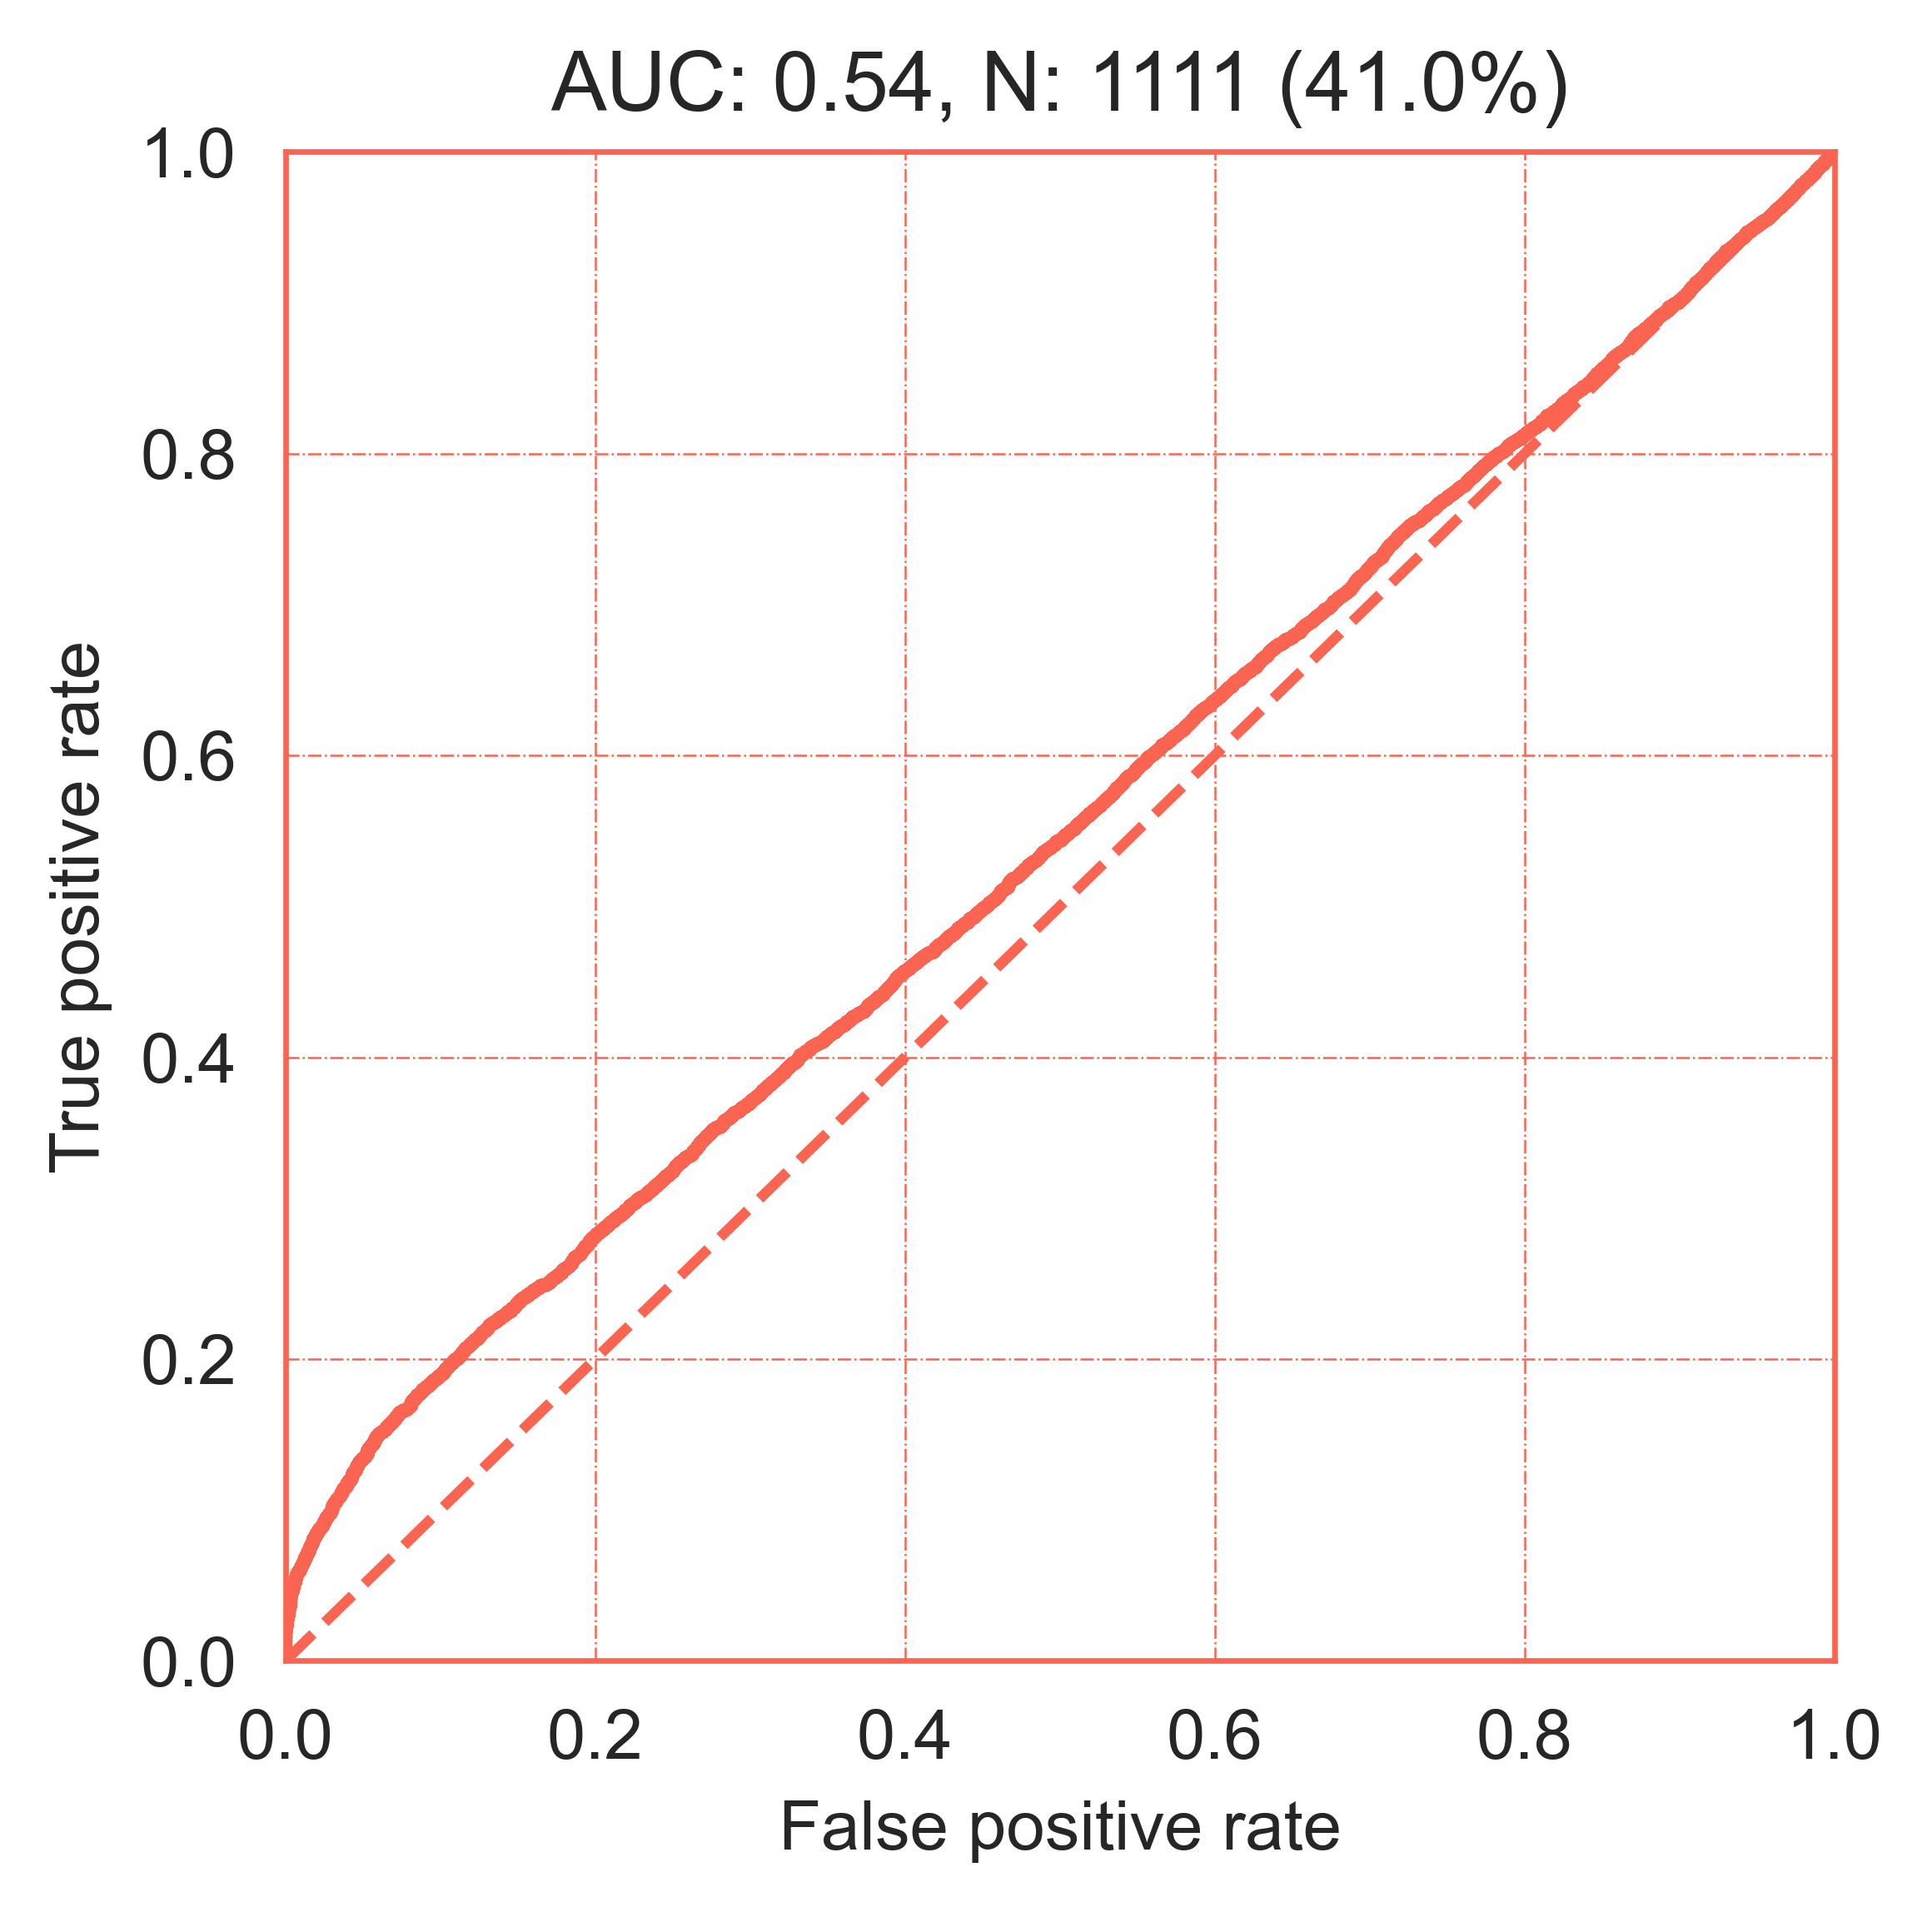

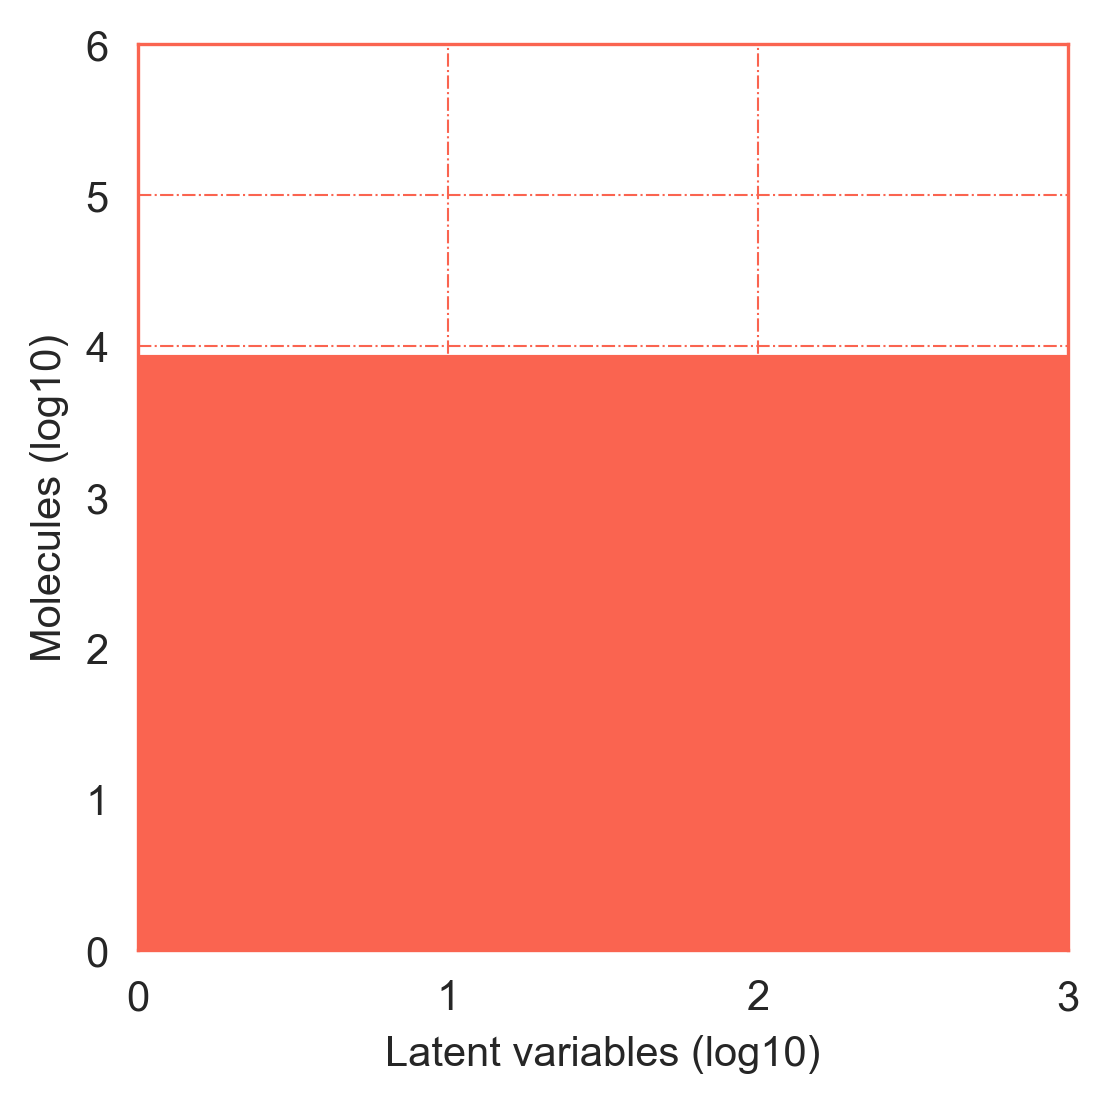

In [12]:
#Sign 0

sign0 = cc.get_signature('sign0','full', dataset)
# sign0.clear()
if not sign0.is_fit():
    sign0.fit(X=m, keys=keys,features=features, overwrite=True)


In [13]:
sign0.is_fit()

True

In [14]:
sign0 = cc.get_signature('sign0','full', dataset)


2021-07-29 20:11:29,289 chemicalchecker.core.signature_base.BaseSignature [INFO    ] Loading signature: /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign0


2021-07-29 20:11:29,390 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Reading subsamples
2021-07-29 20:11:38,989 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Getting all needed data.
2021-07-29 20:11:38,989 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2021-07-29 20:11:39,006 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2021-07-29 20:11:39,012 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2021-07-29 20:11:39,085 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2021-07-29 20:11:39,330 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2021-07-29 20:11:39,502 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2021-07-29 20:11:39,547 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across coverage
2021-07-29 20:11:39,548 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] kw_plotter: exemplary True
2021-07-29 20:11:39,549 chemicalchecker.core.diagnostic

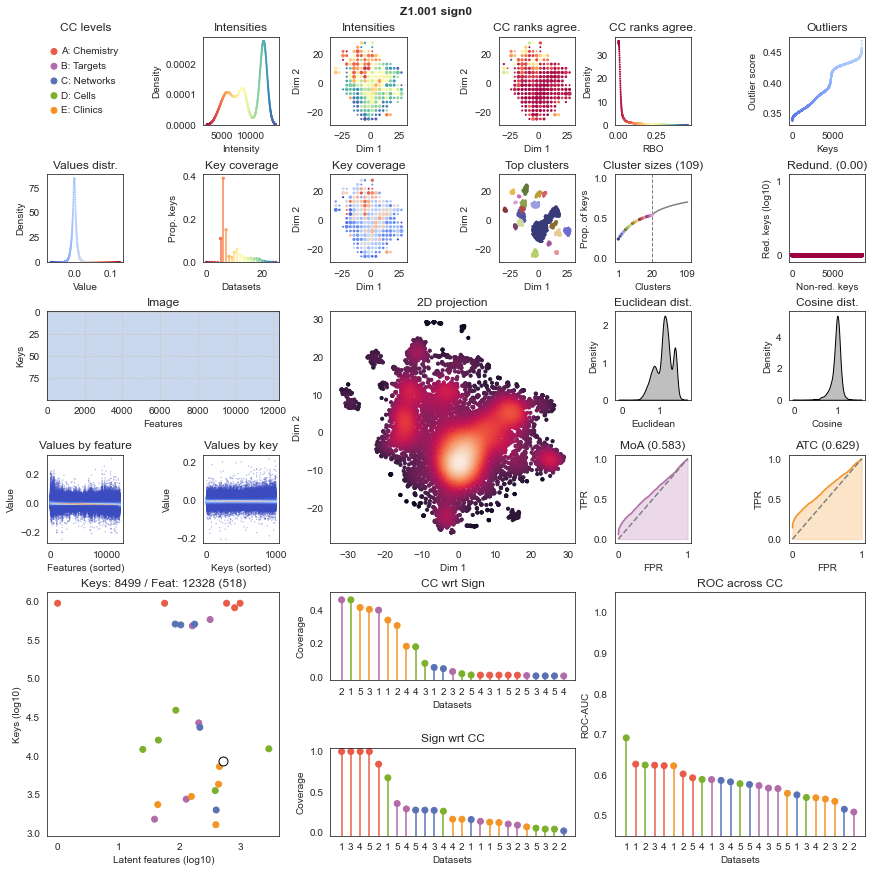

In [15]:
diagPlot(sign0)

In [16]:
# Sig1

2021-07-29 20:11:51,401 chemicalchecker.core.signature_base.BaseSignature [INFO    ] New signature: /aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign1
2021-07-29 20:11:53,695 tensorflow   [DEBUG   ] Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
/opt/miniconda3/envs/py37/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-07-29 20:11:54,653 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2021-07-29 20:11:54,655 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature
2021-07-29 20:11:54,656 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] 

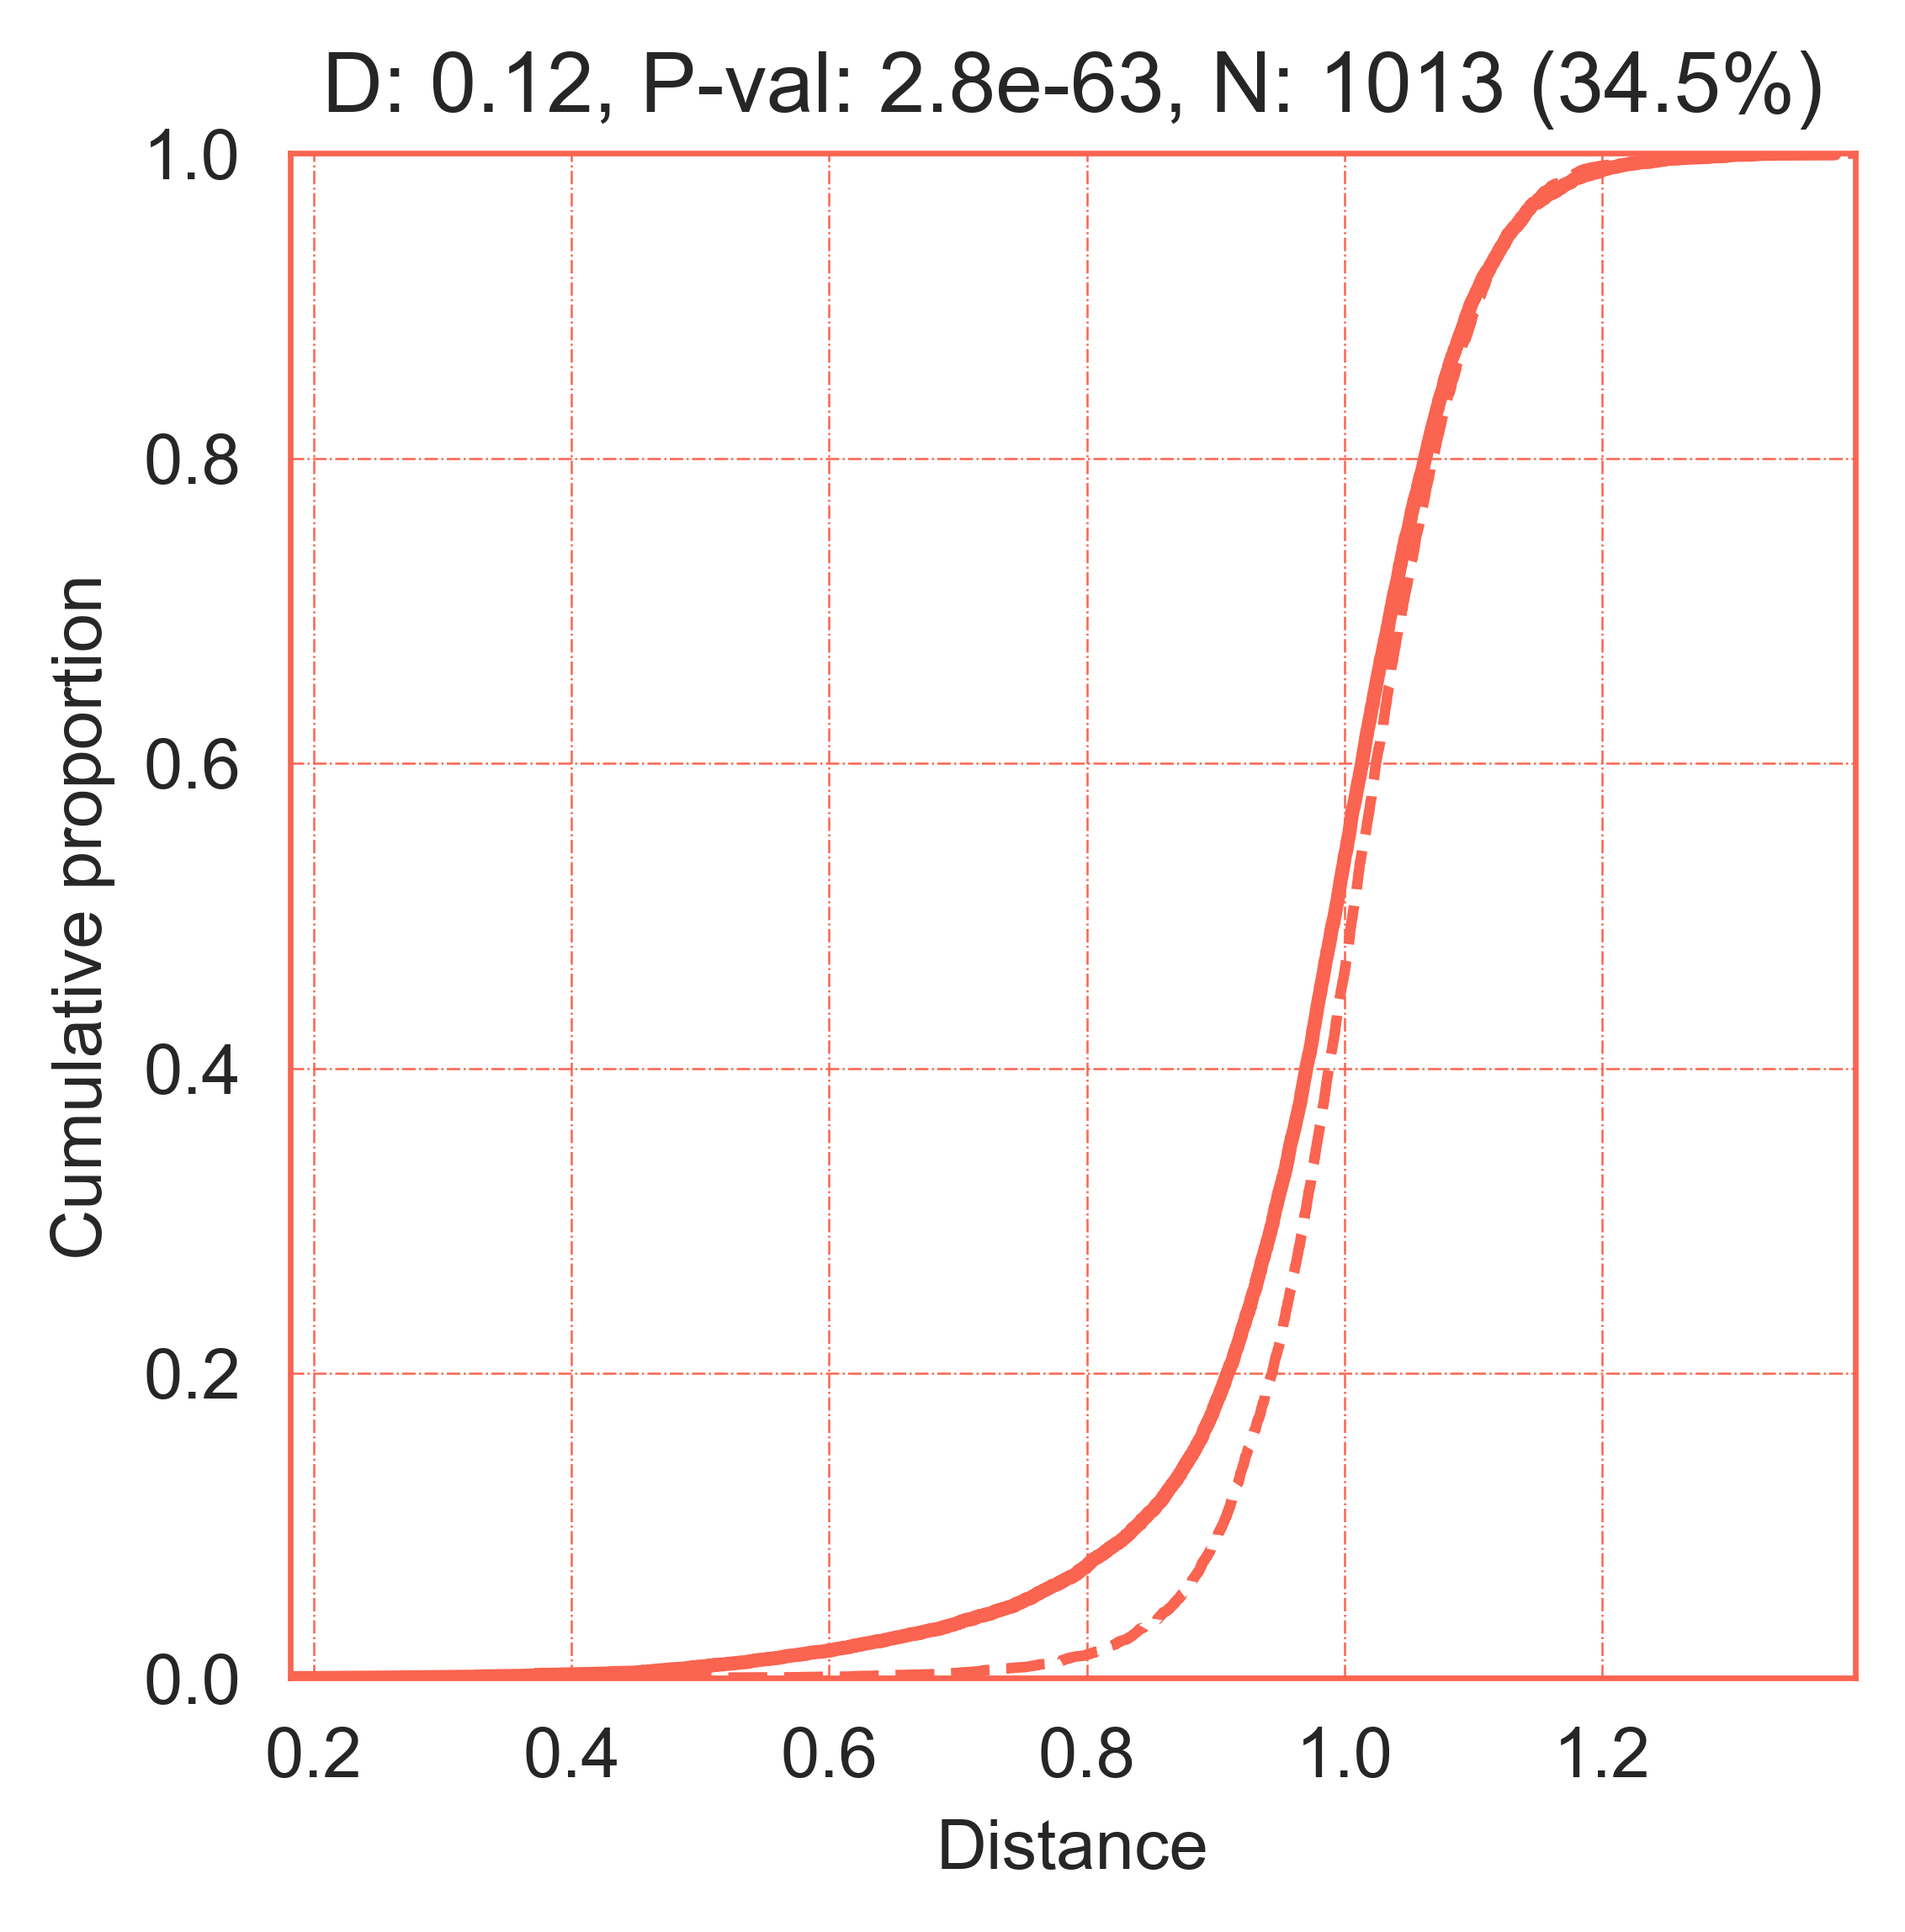

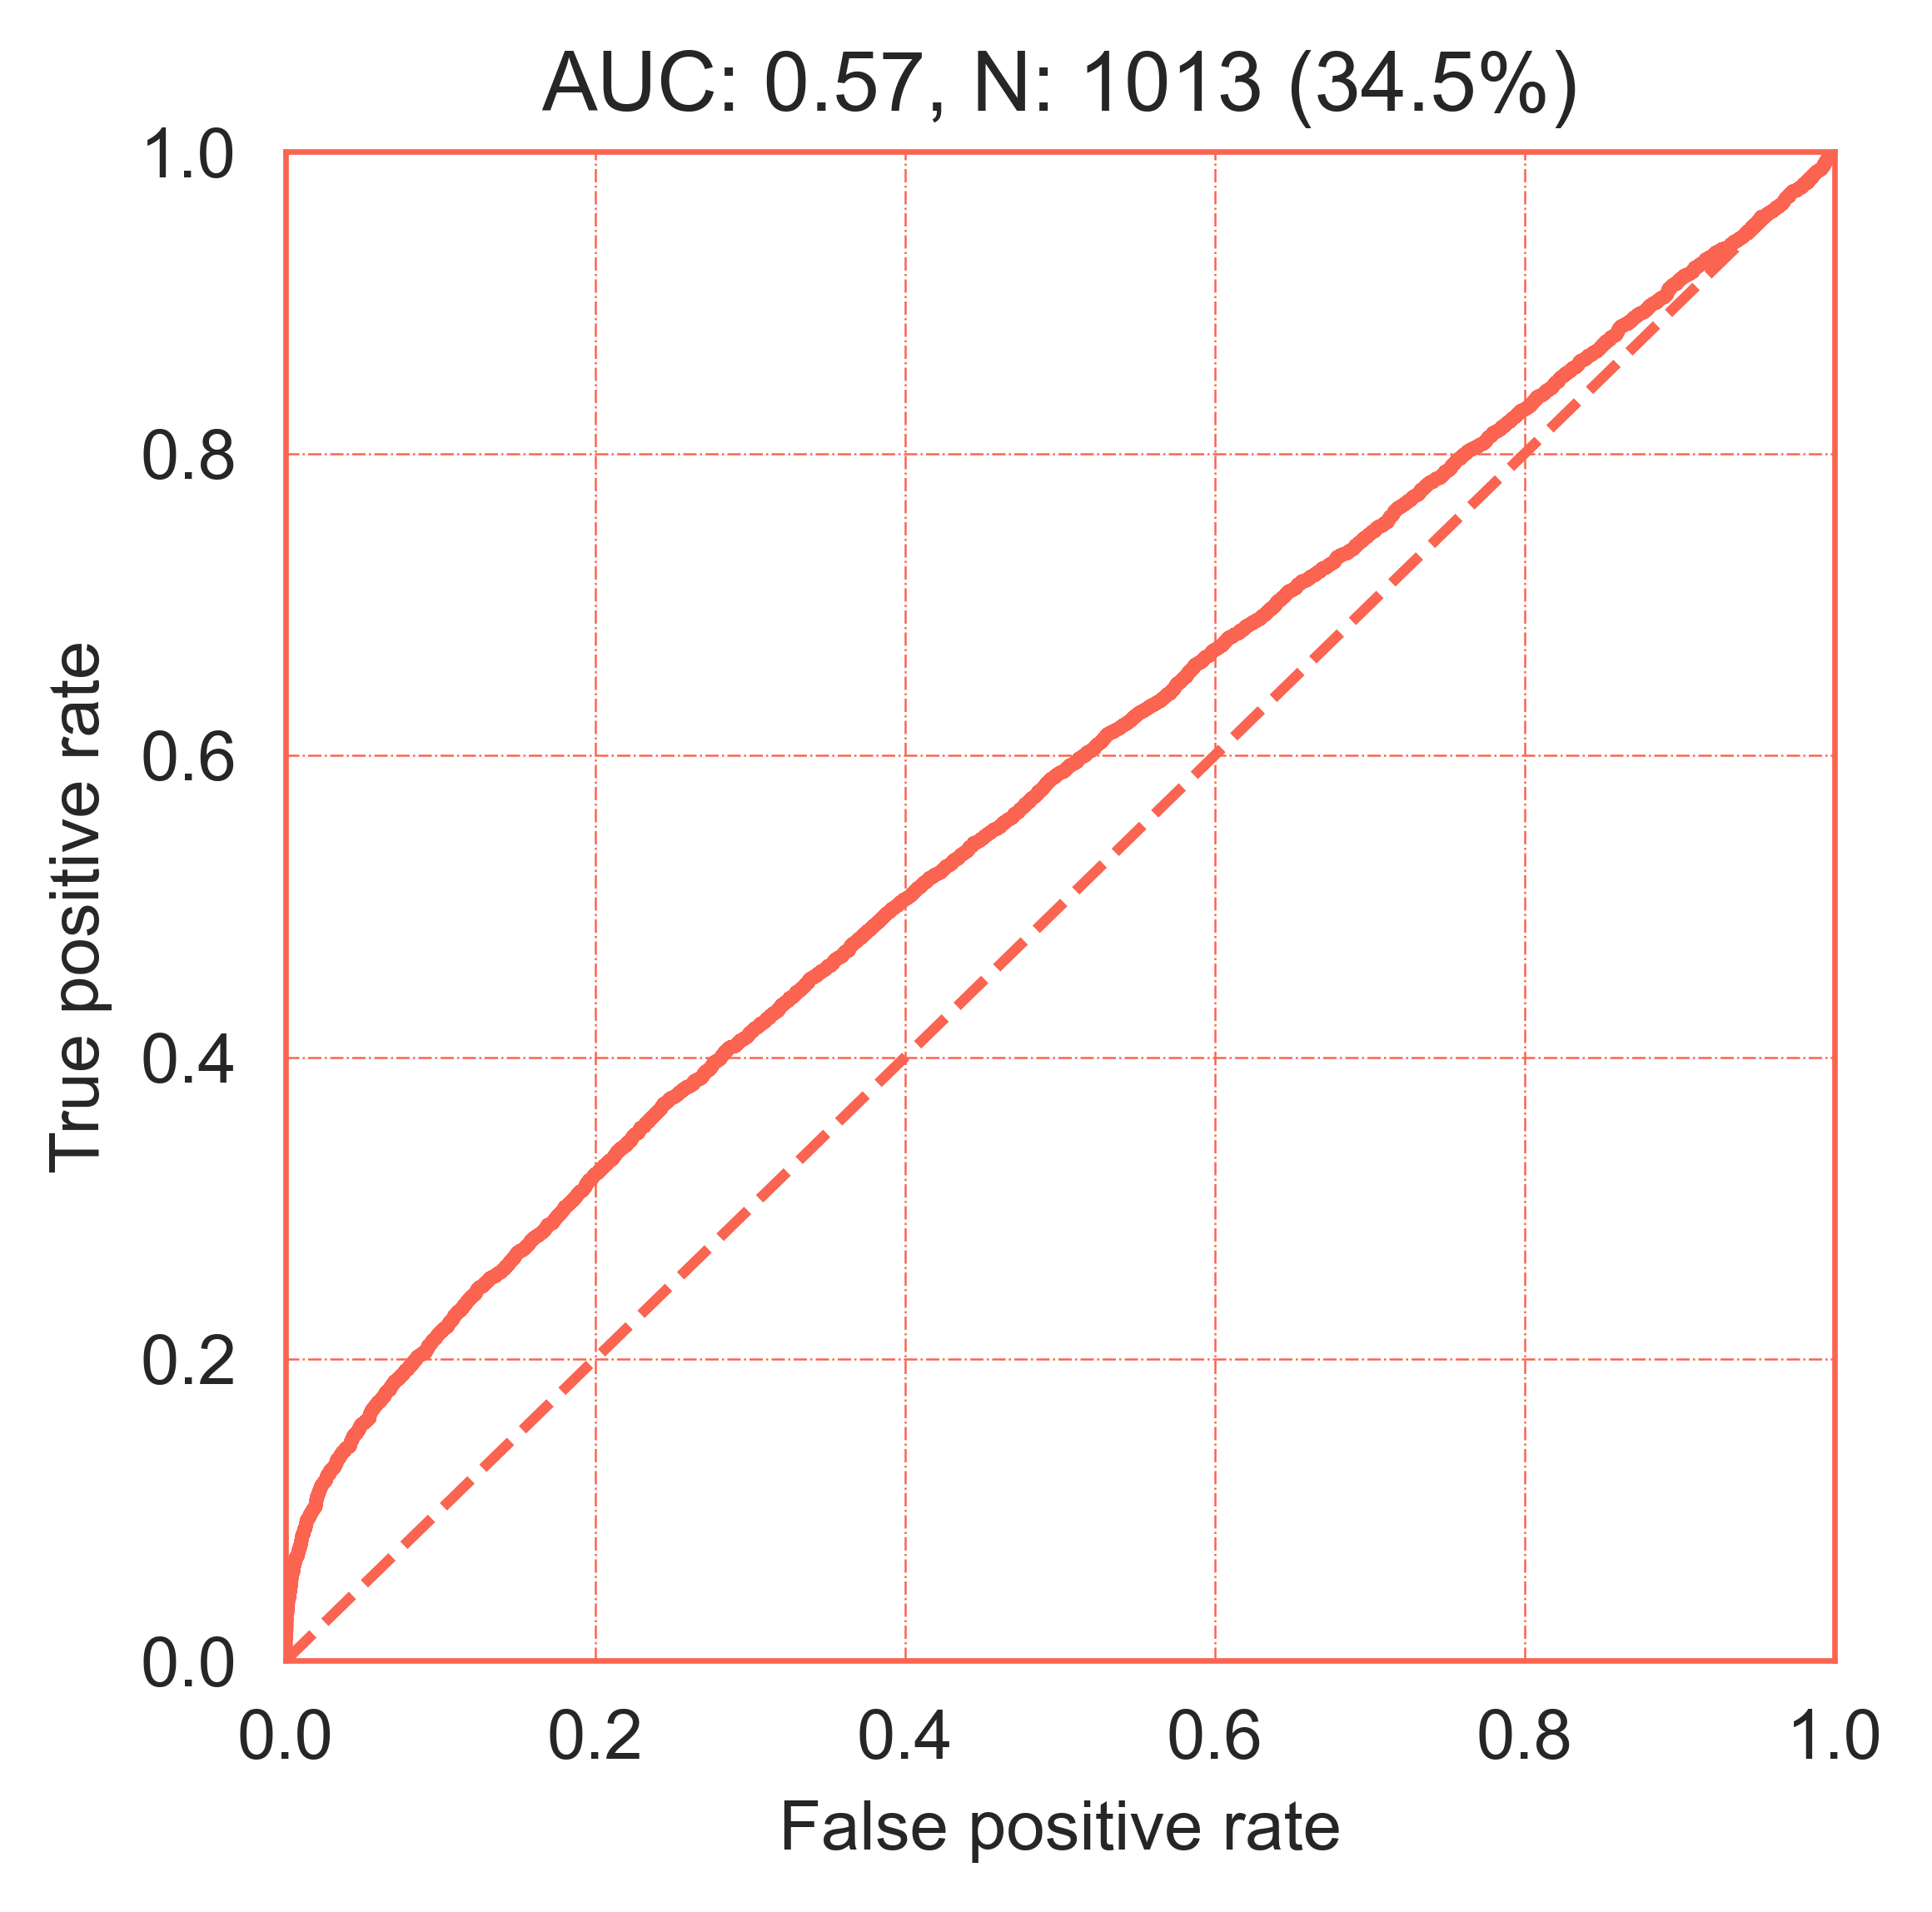

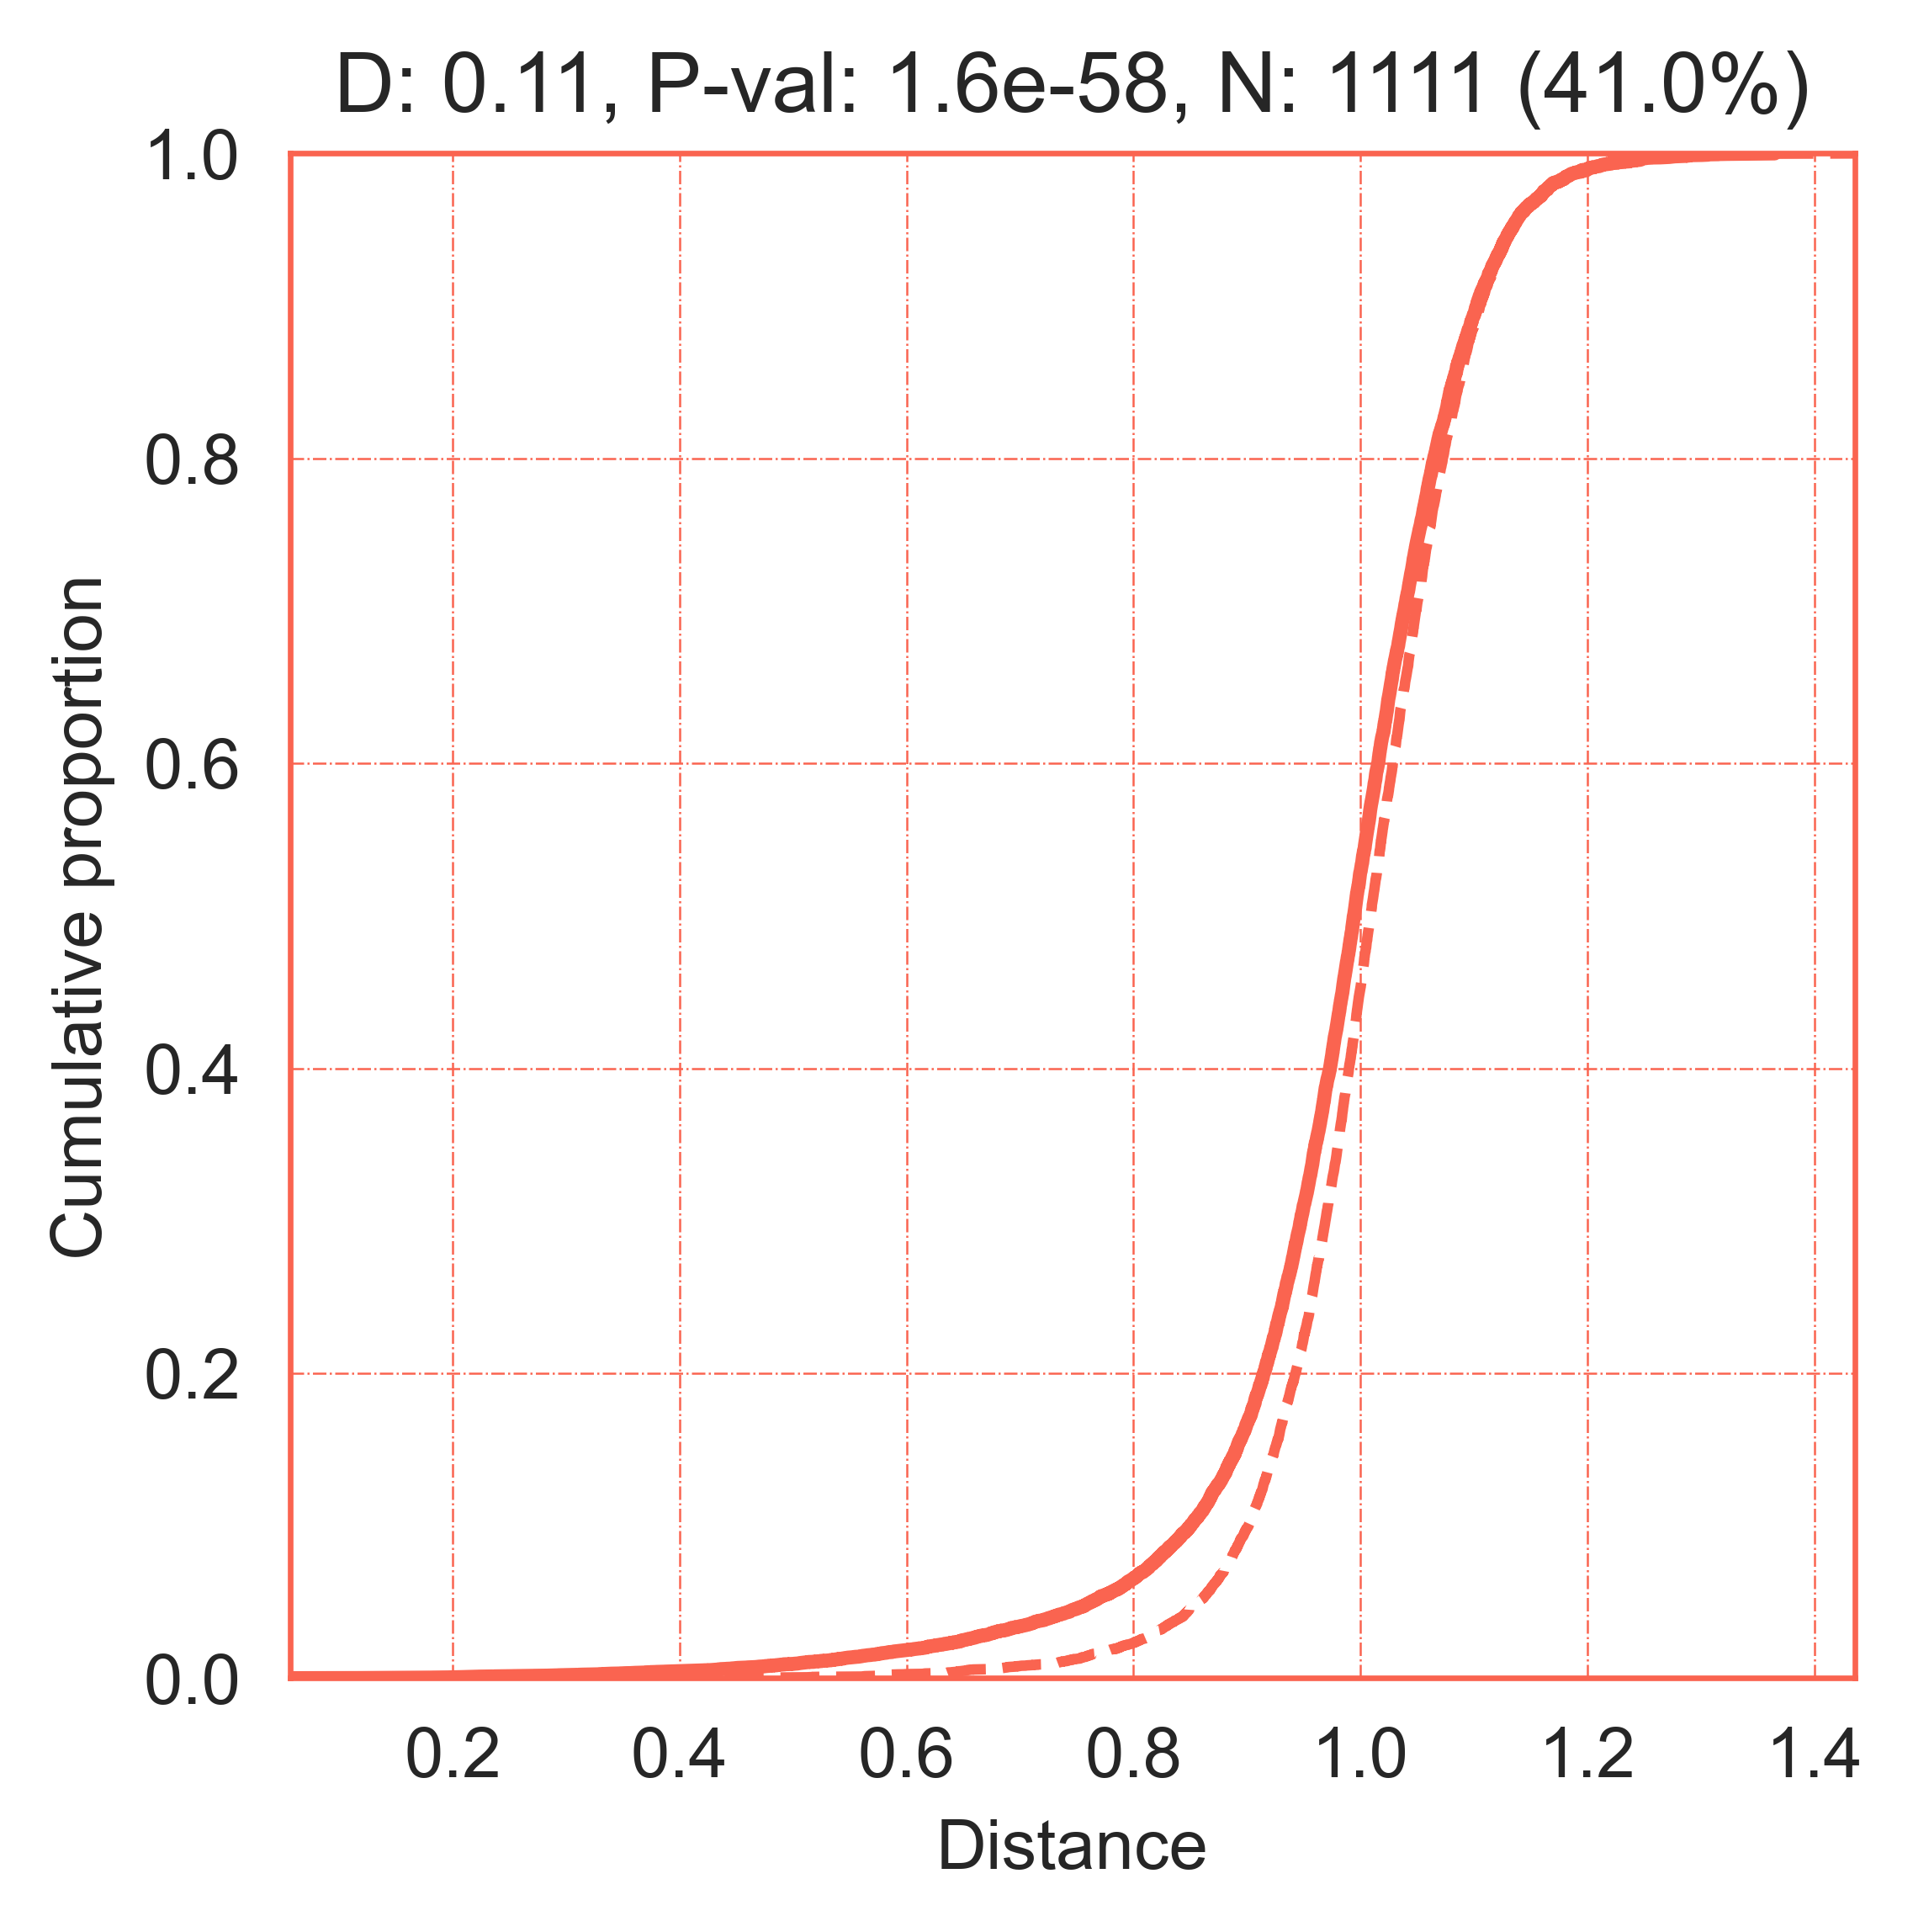

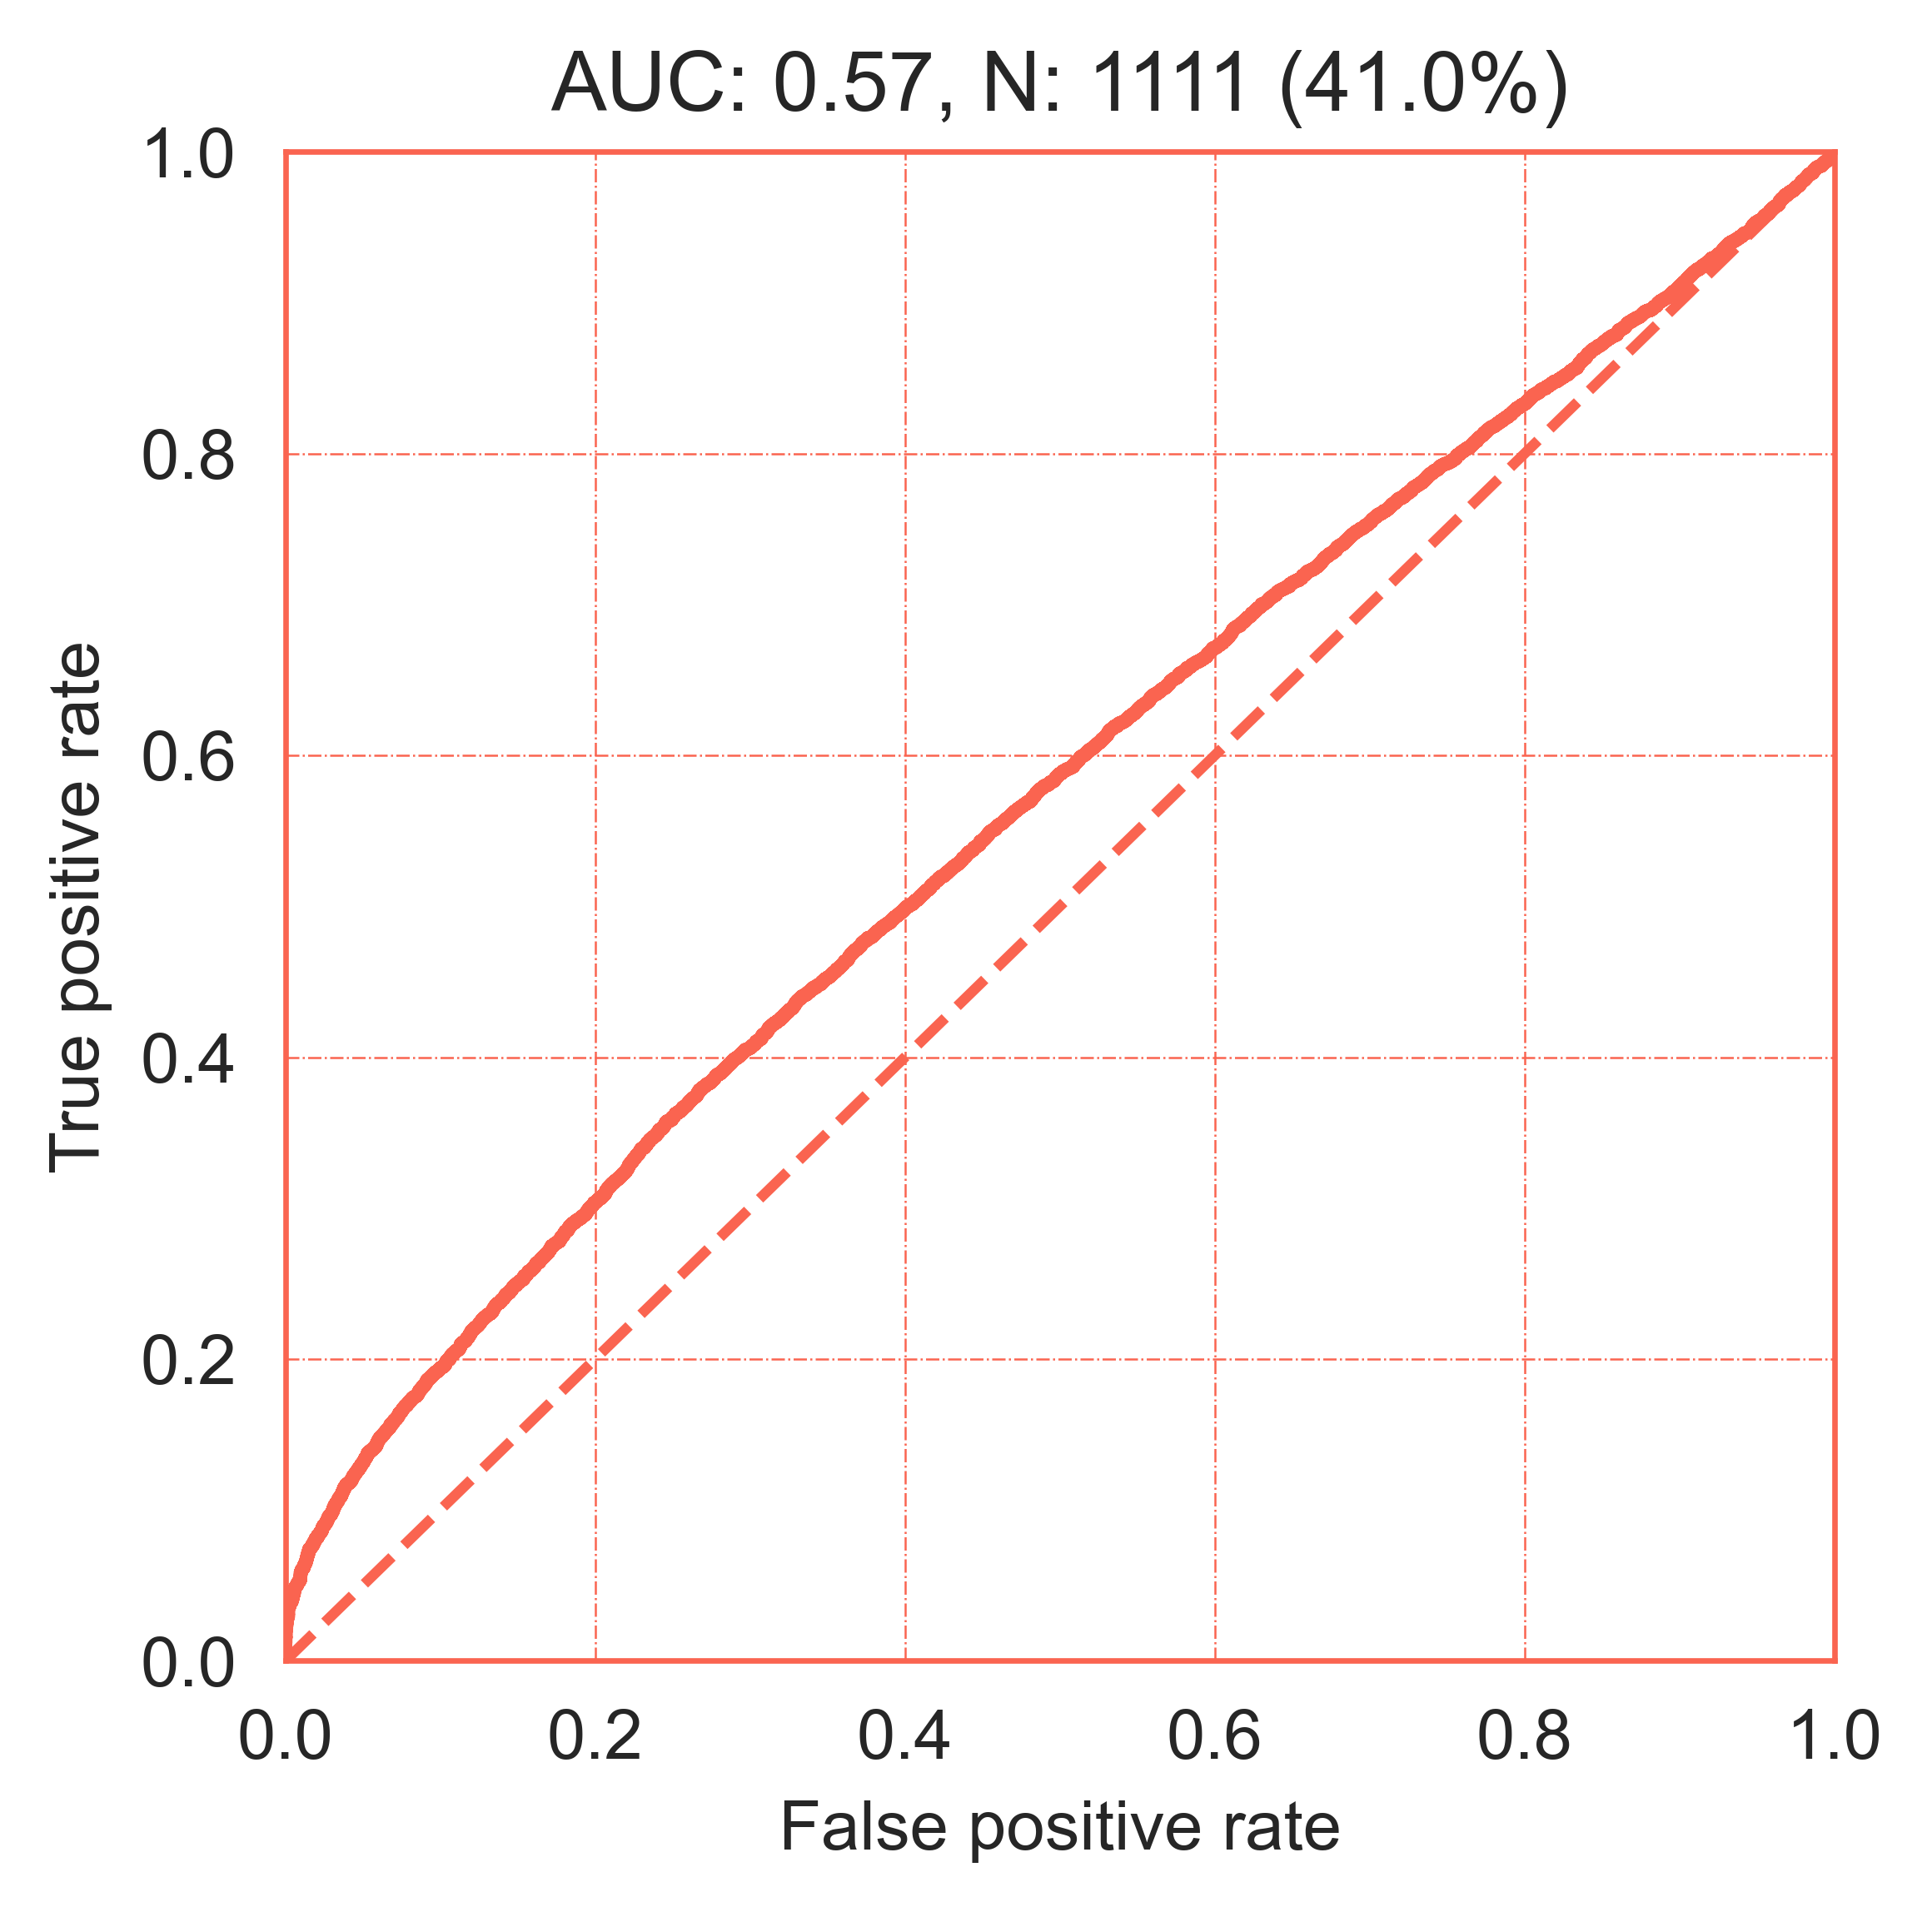

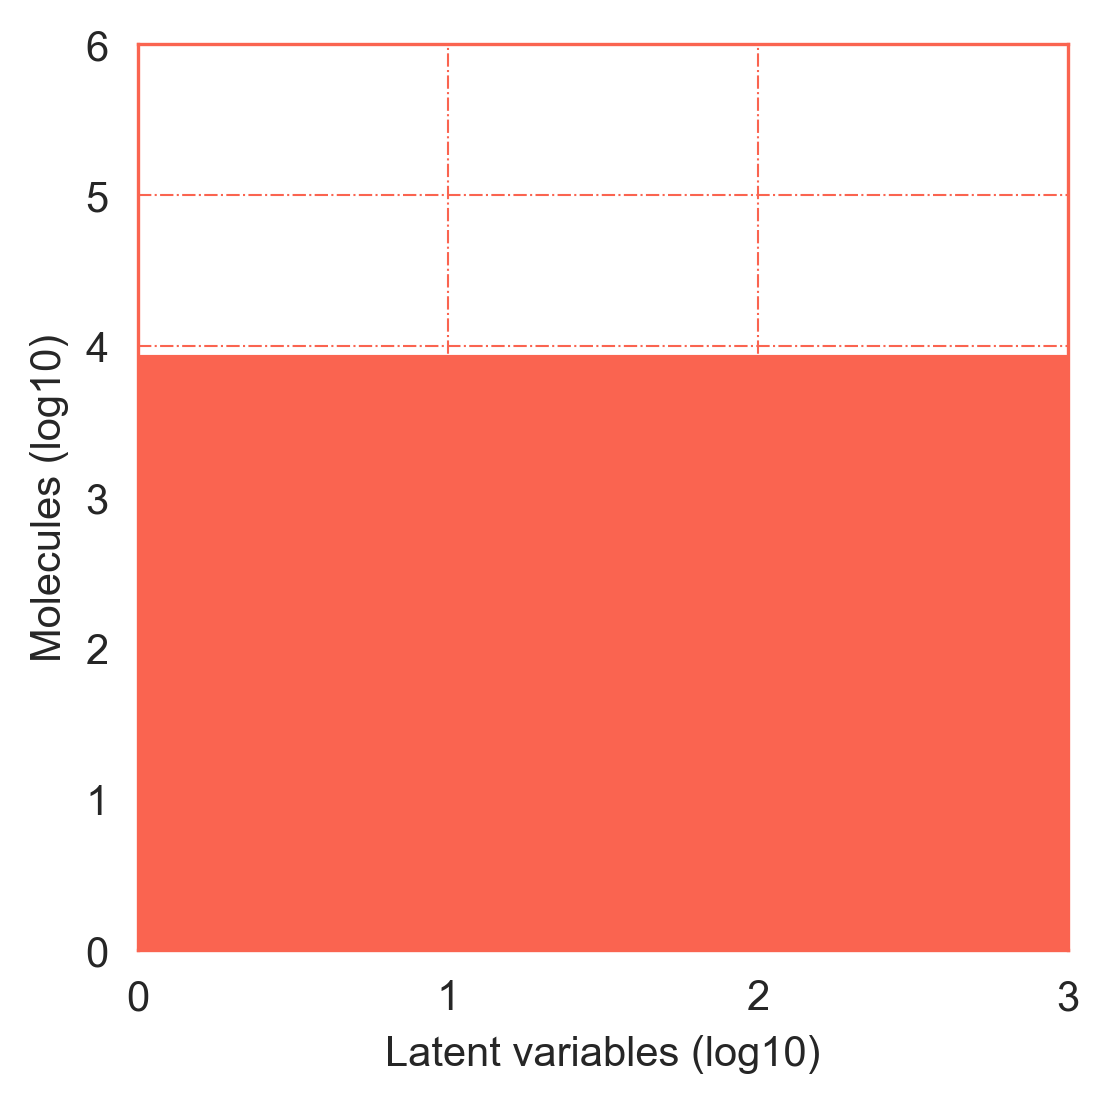

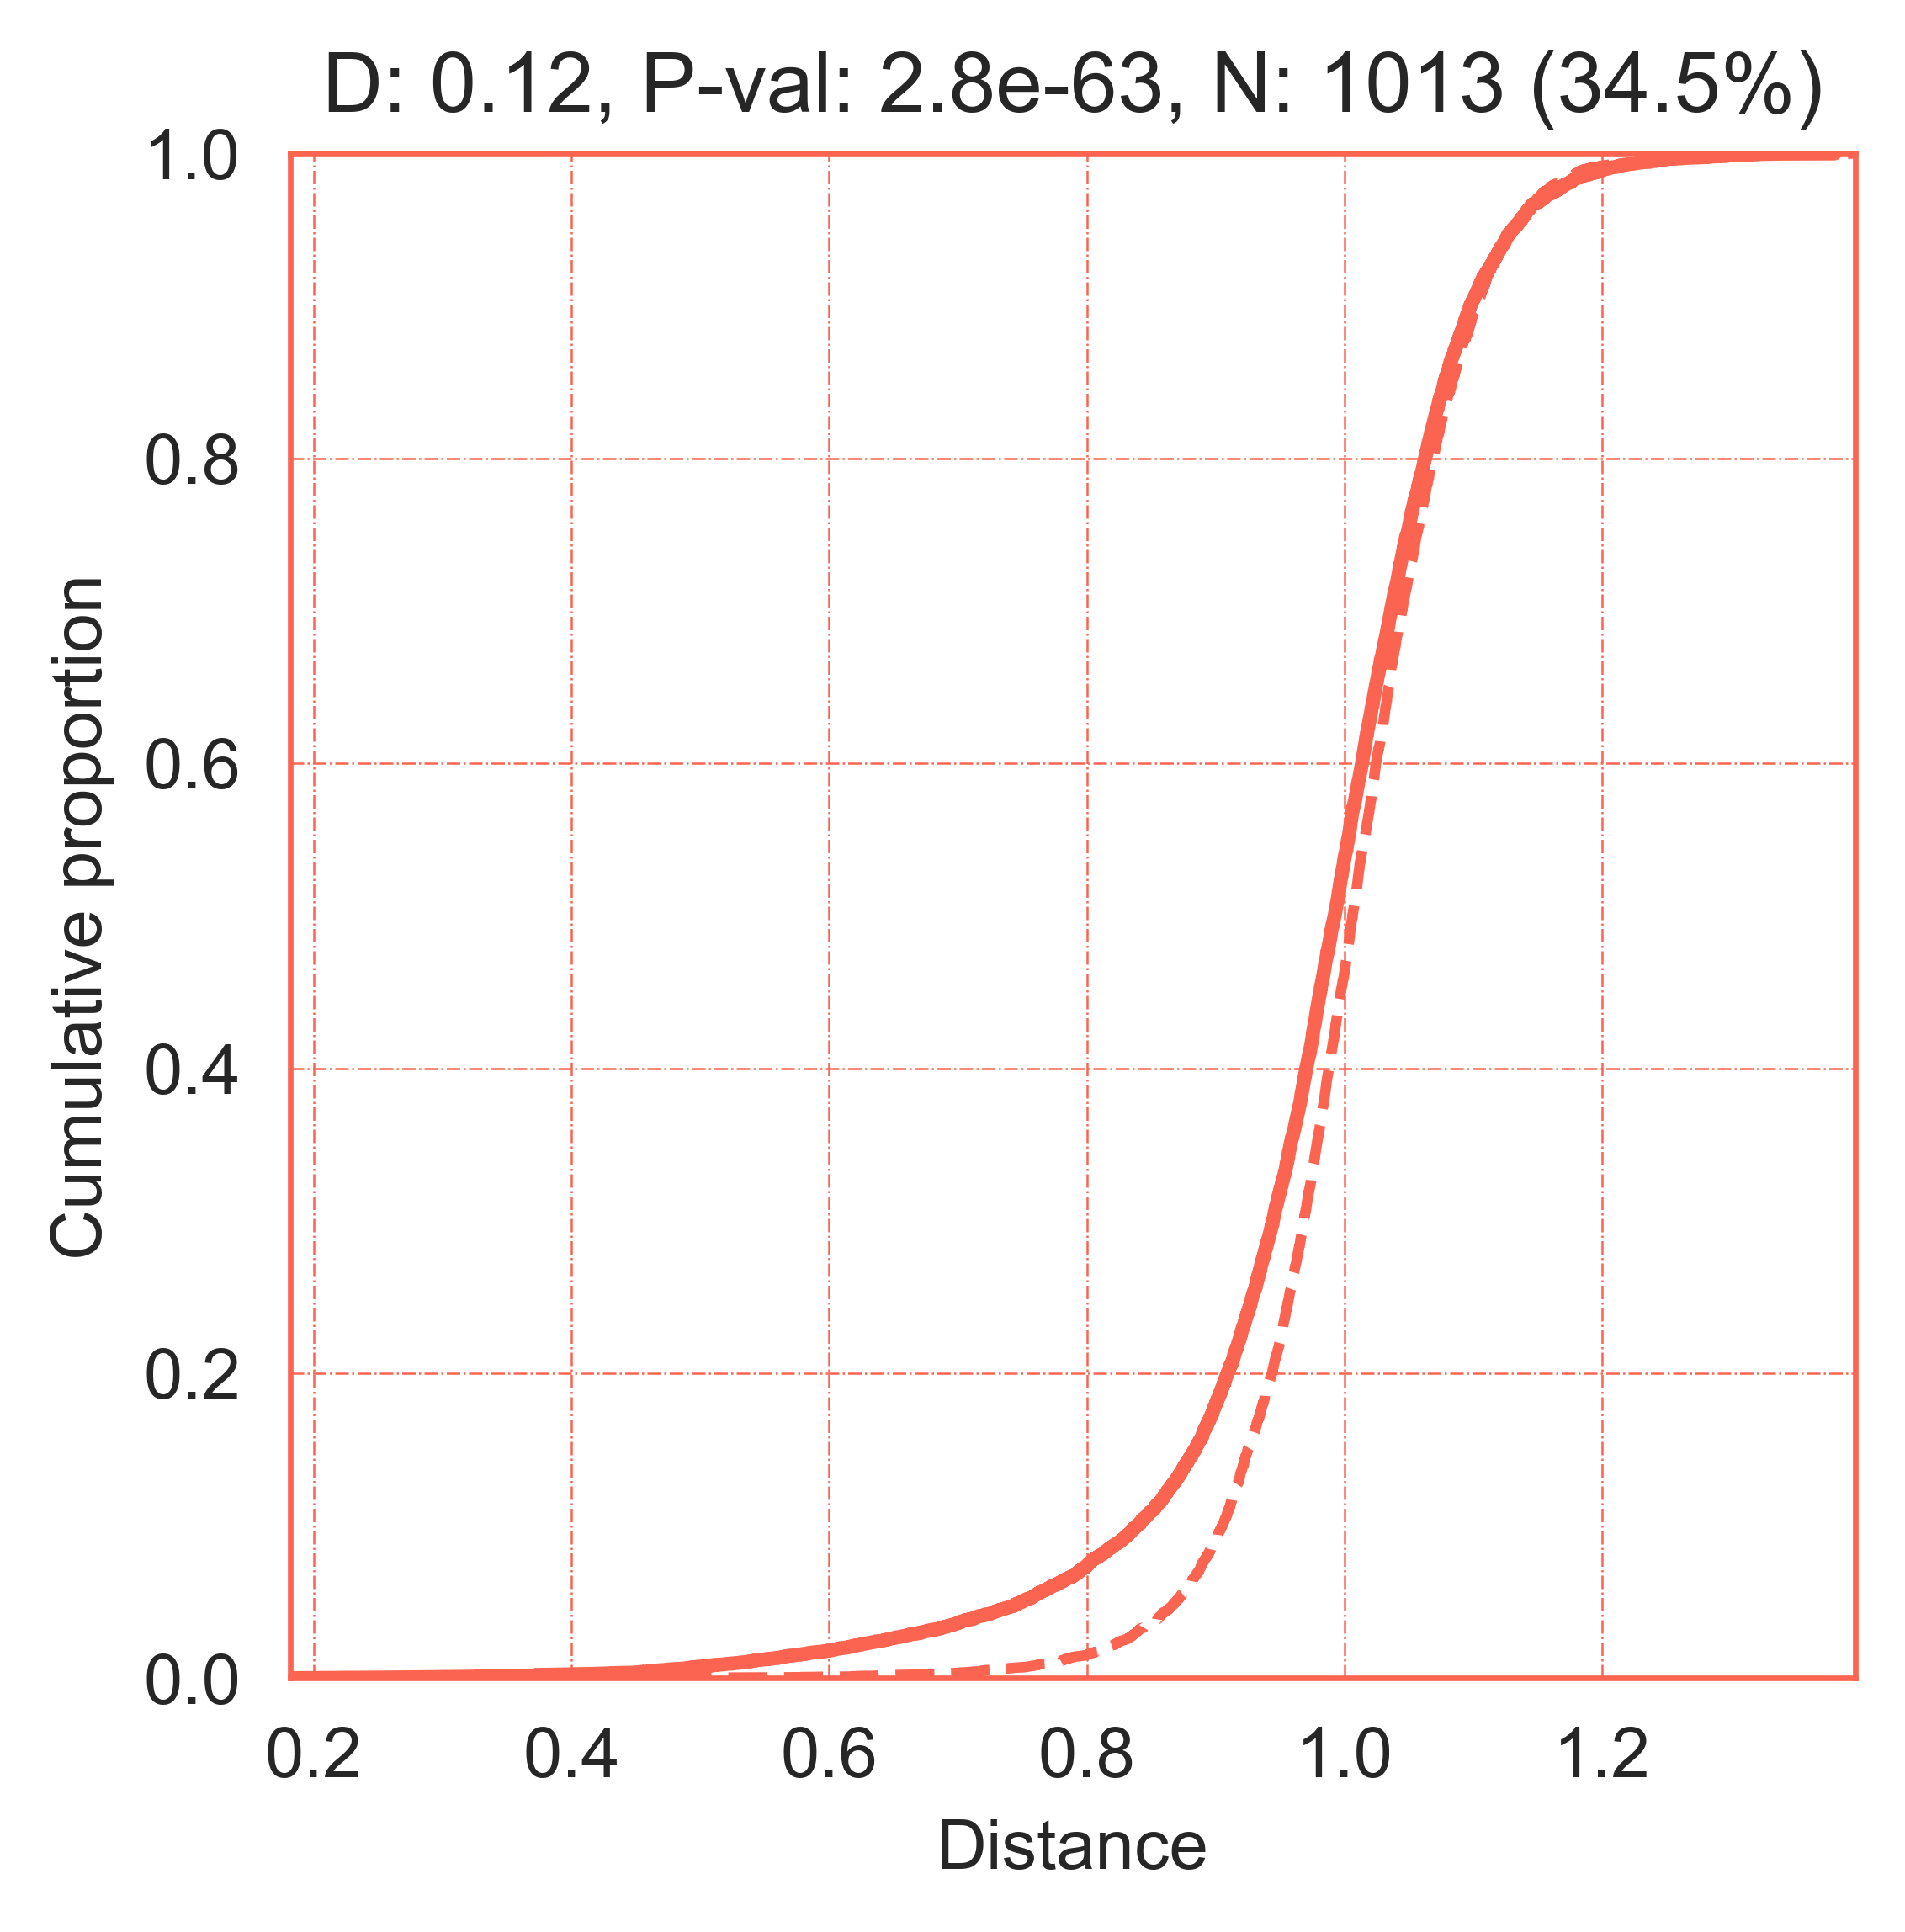

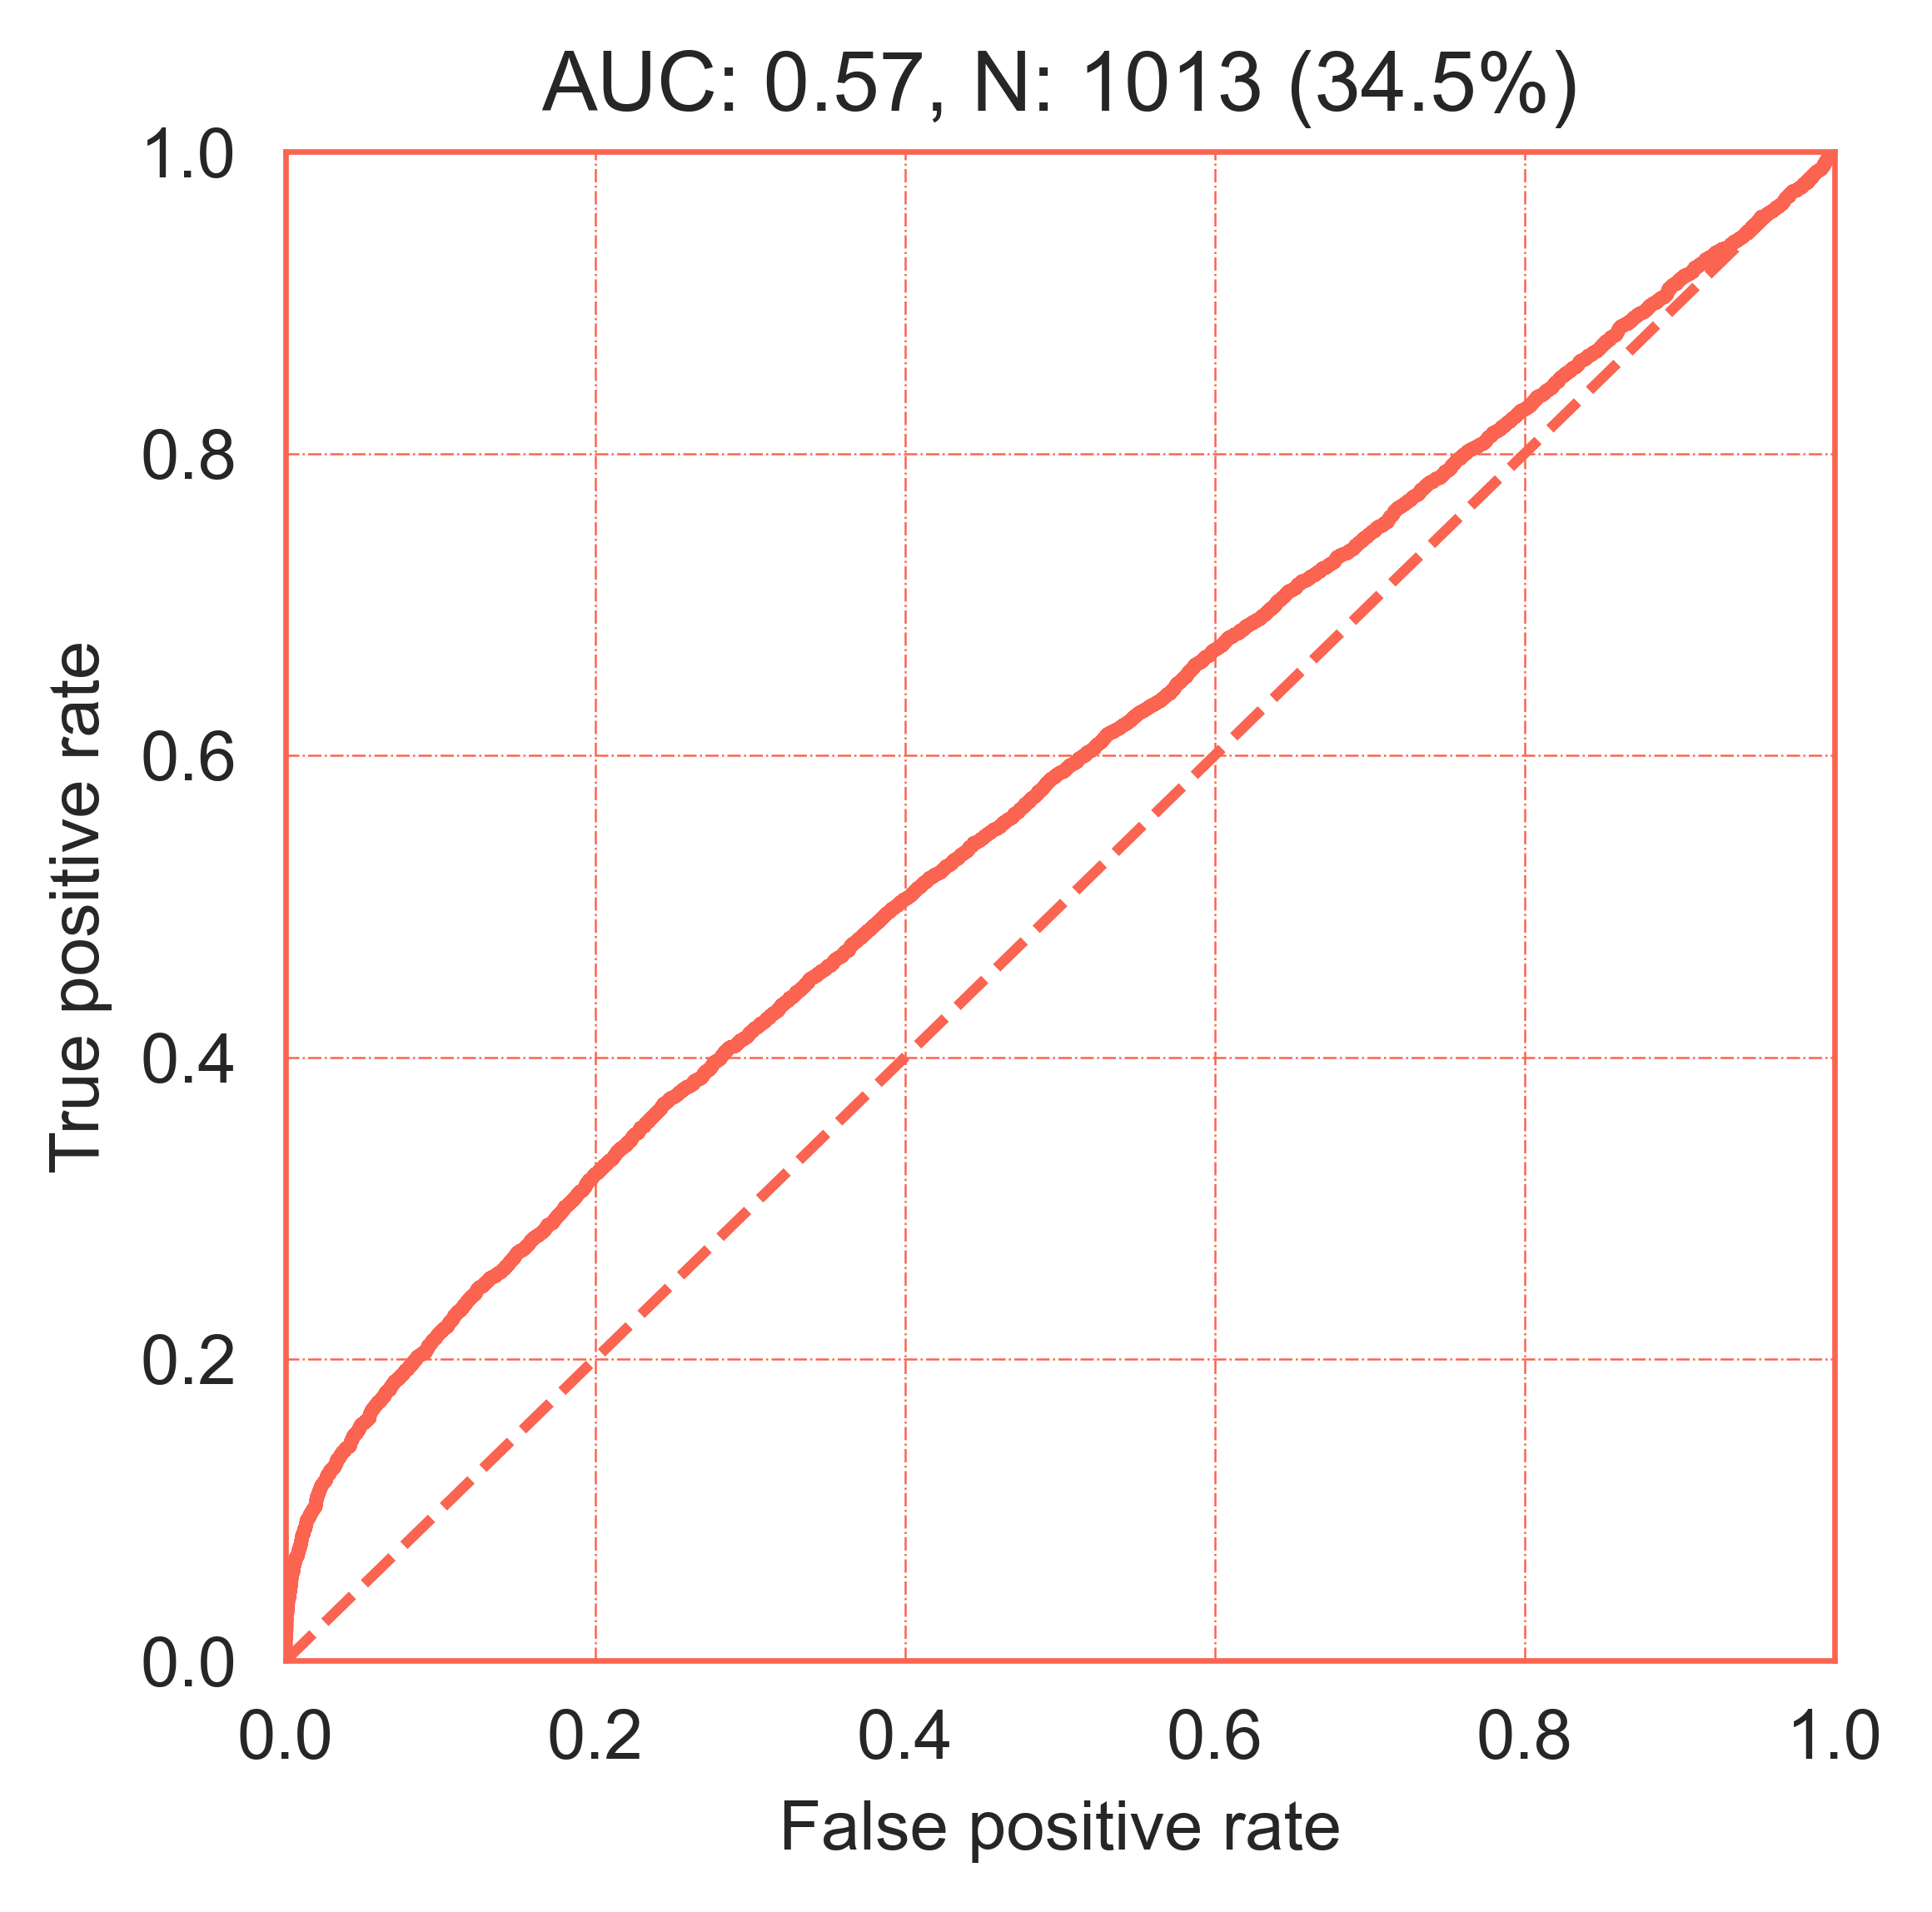

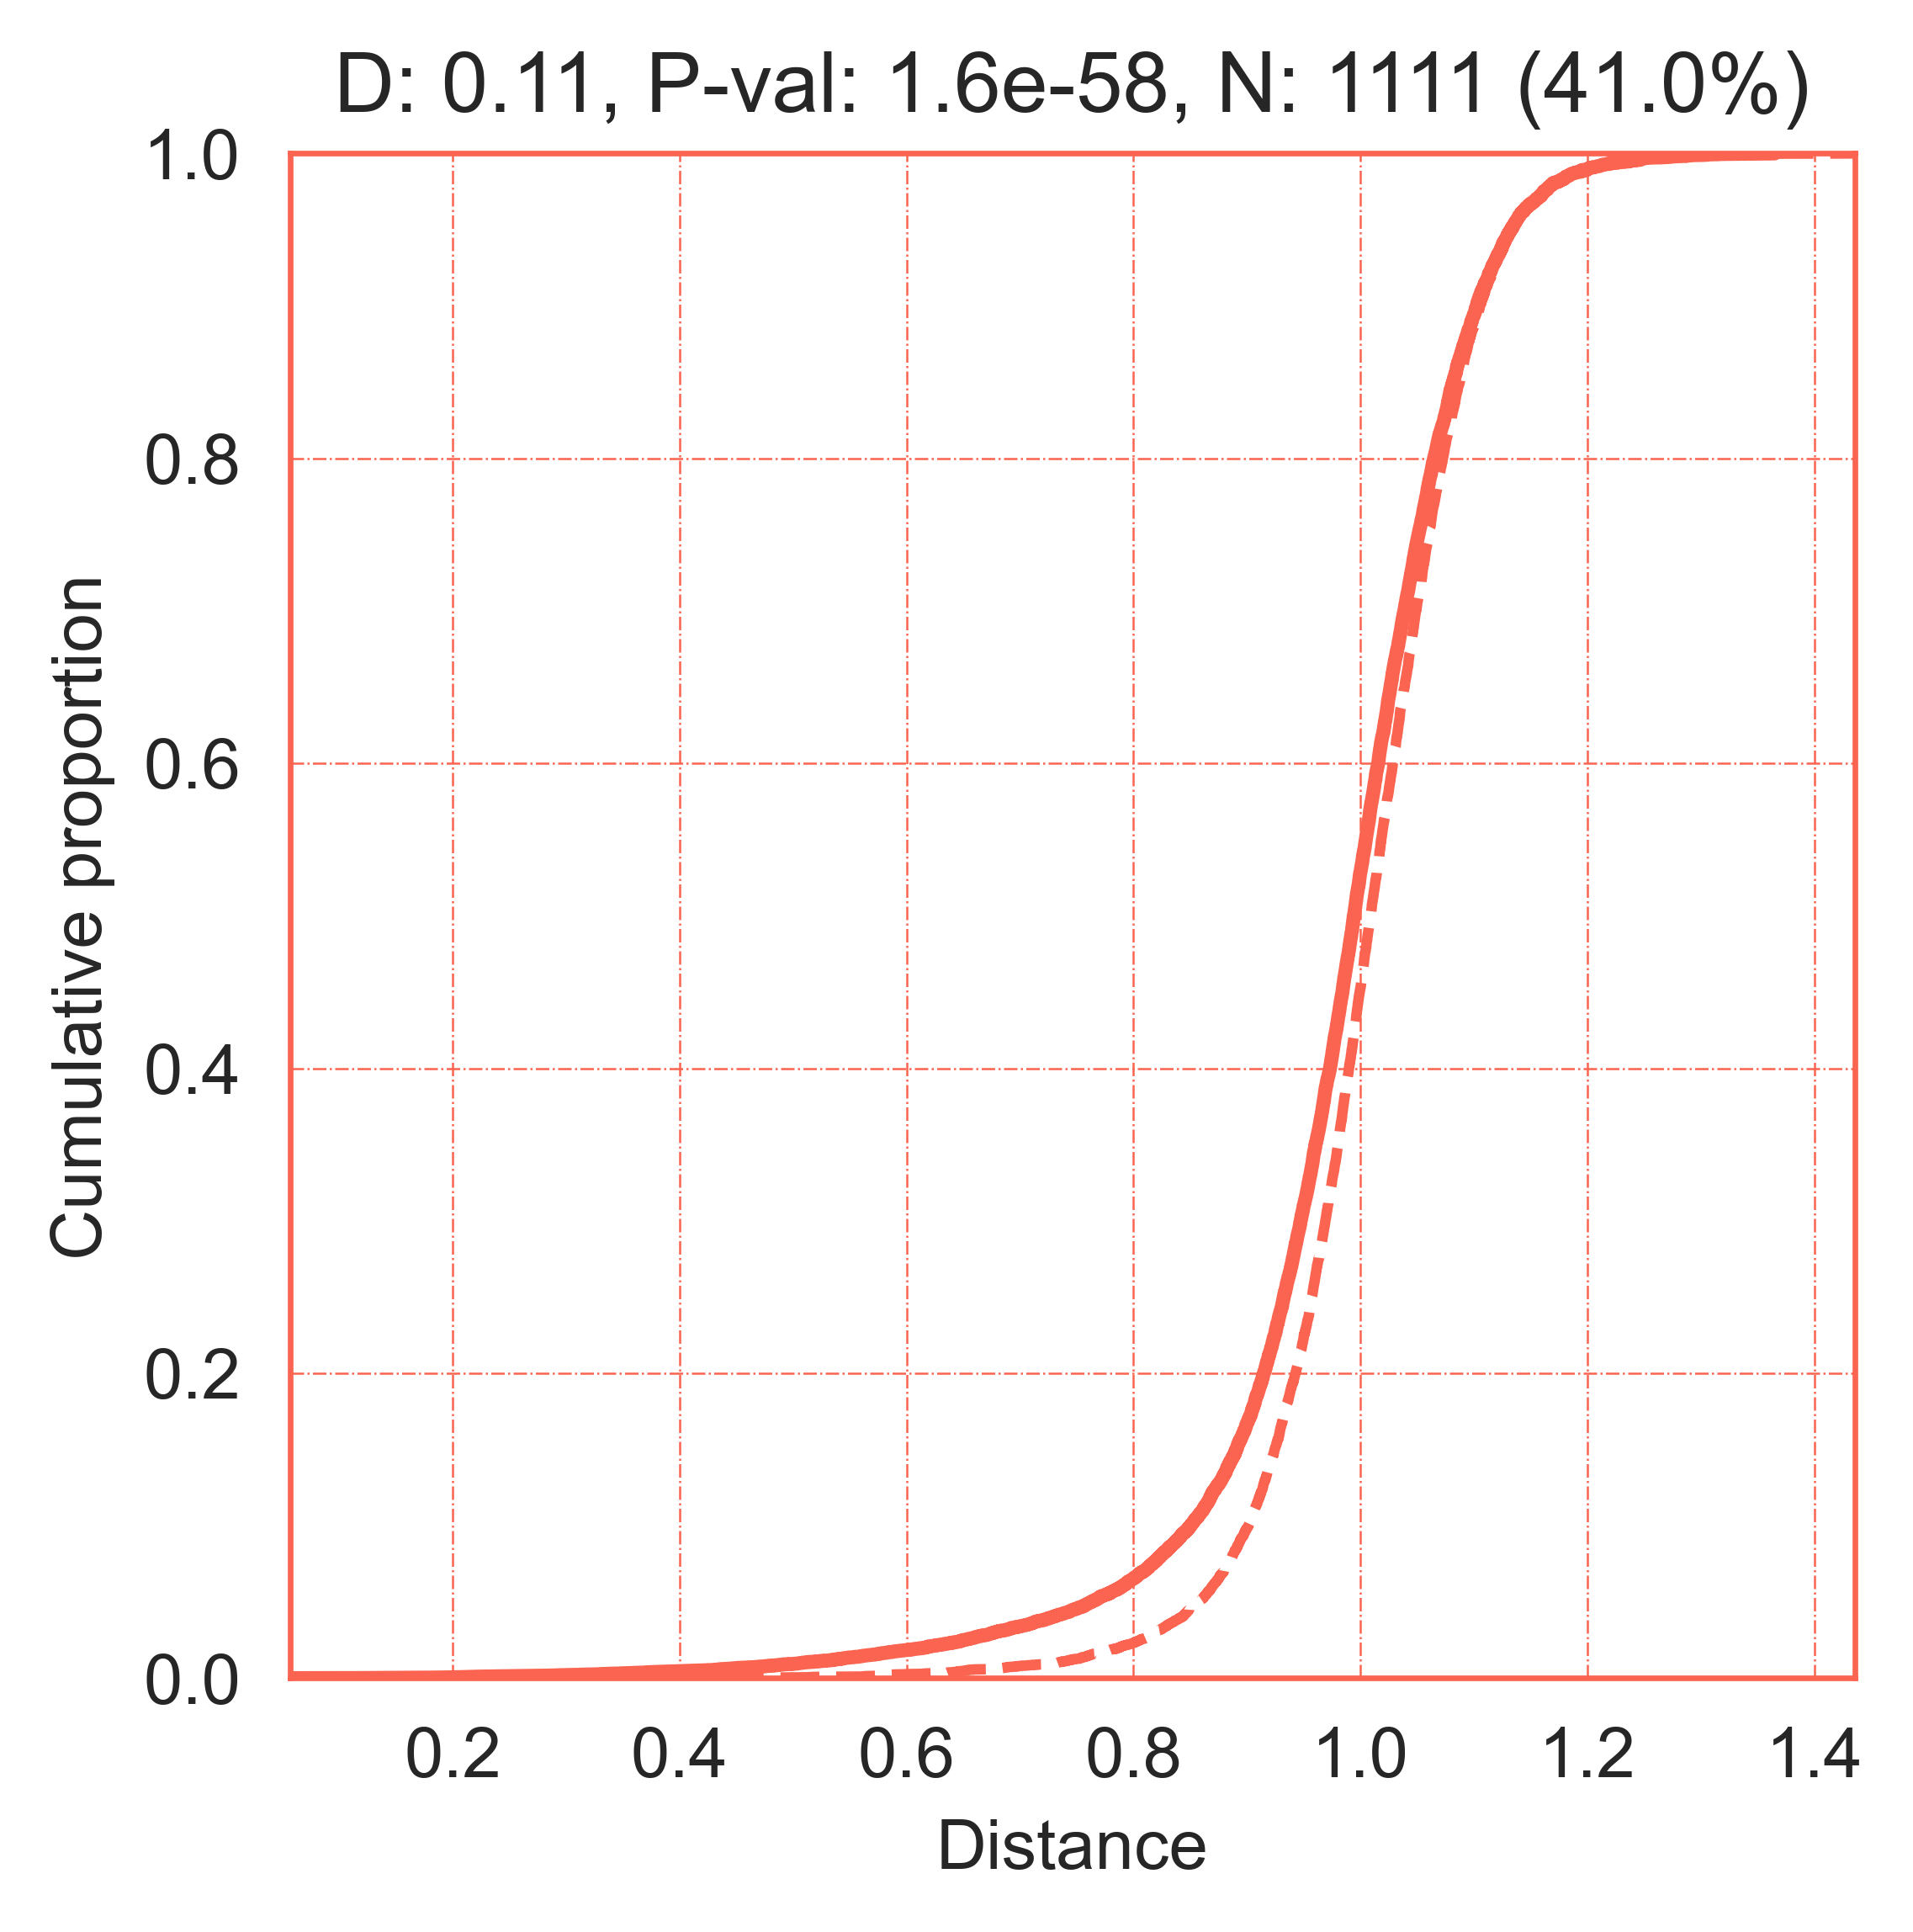

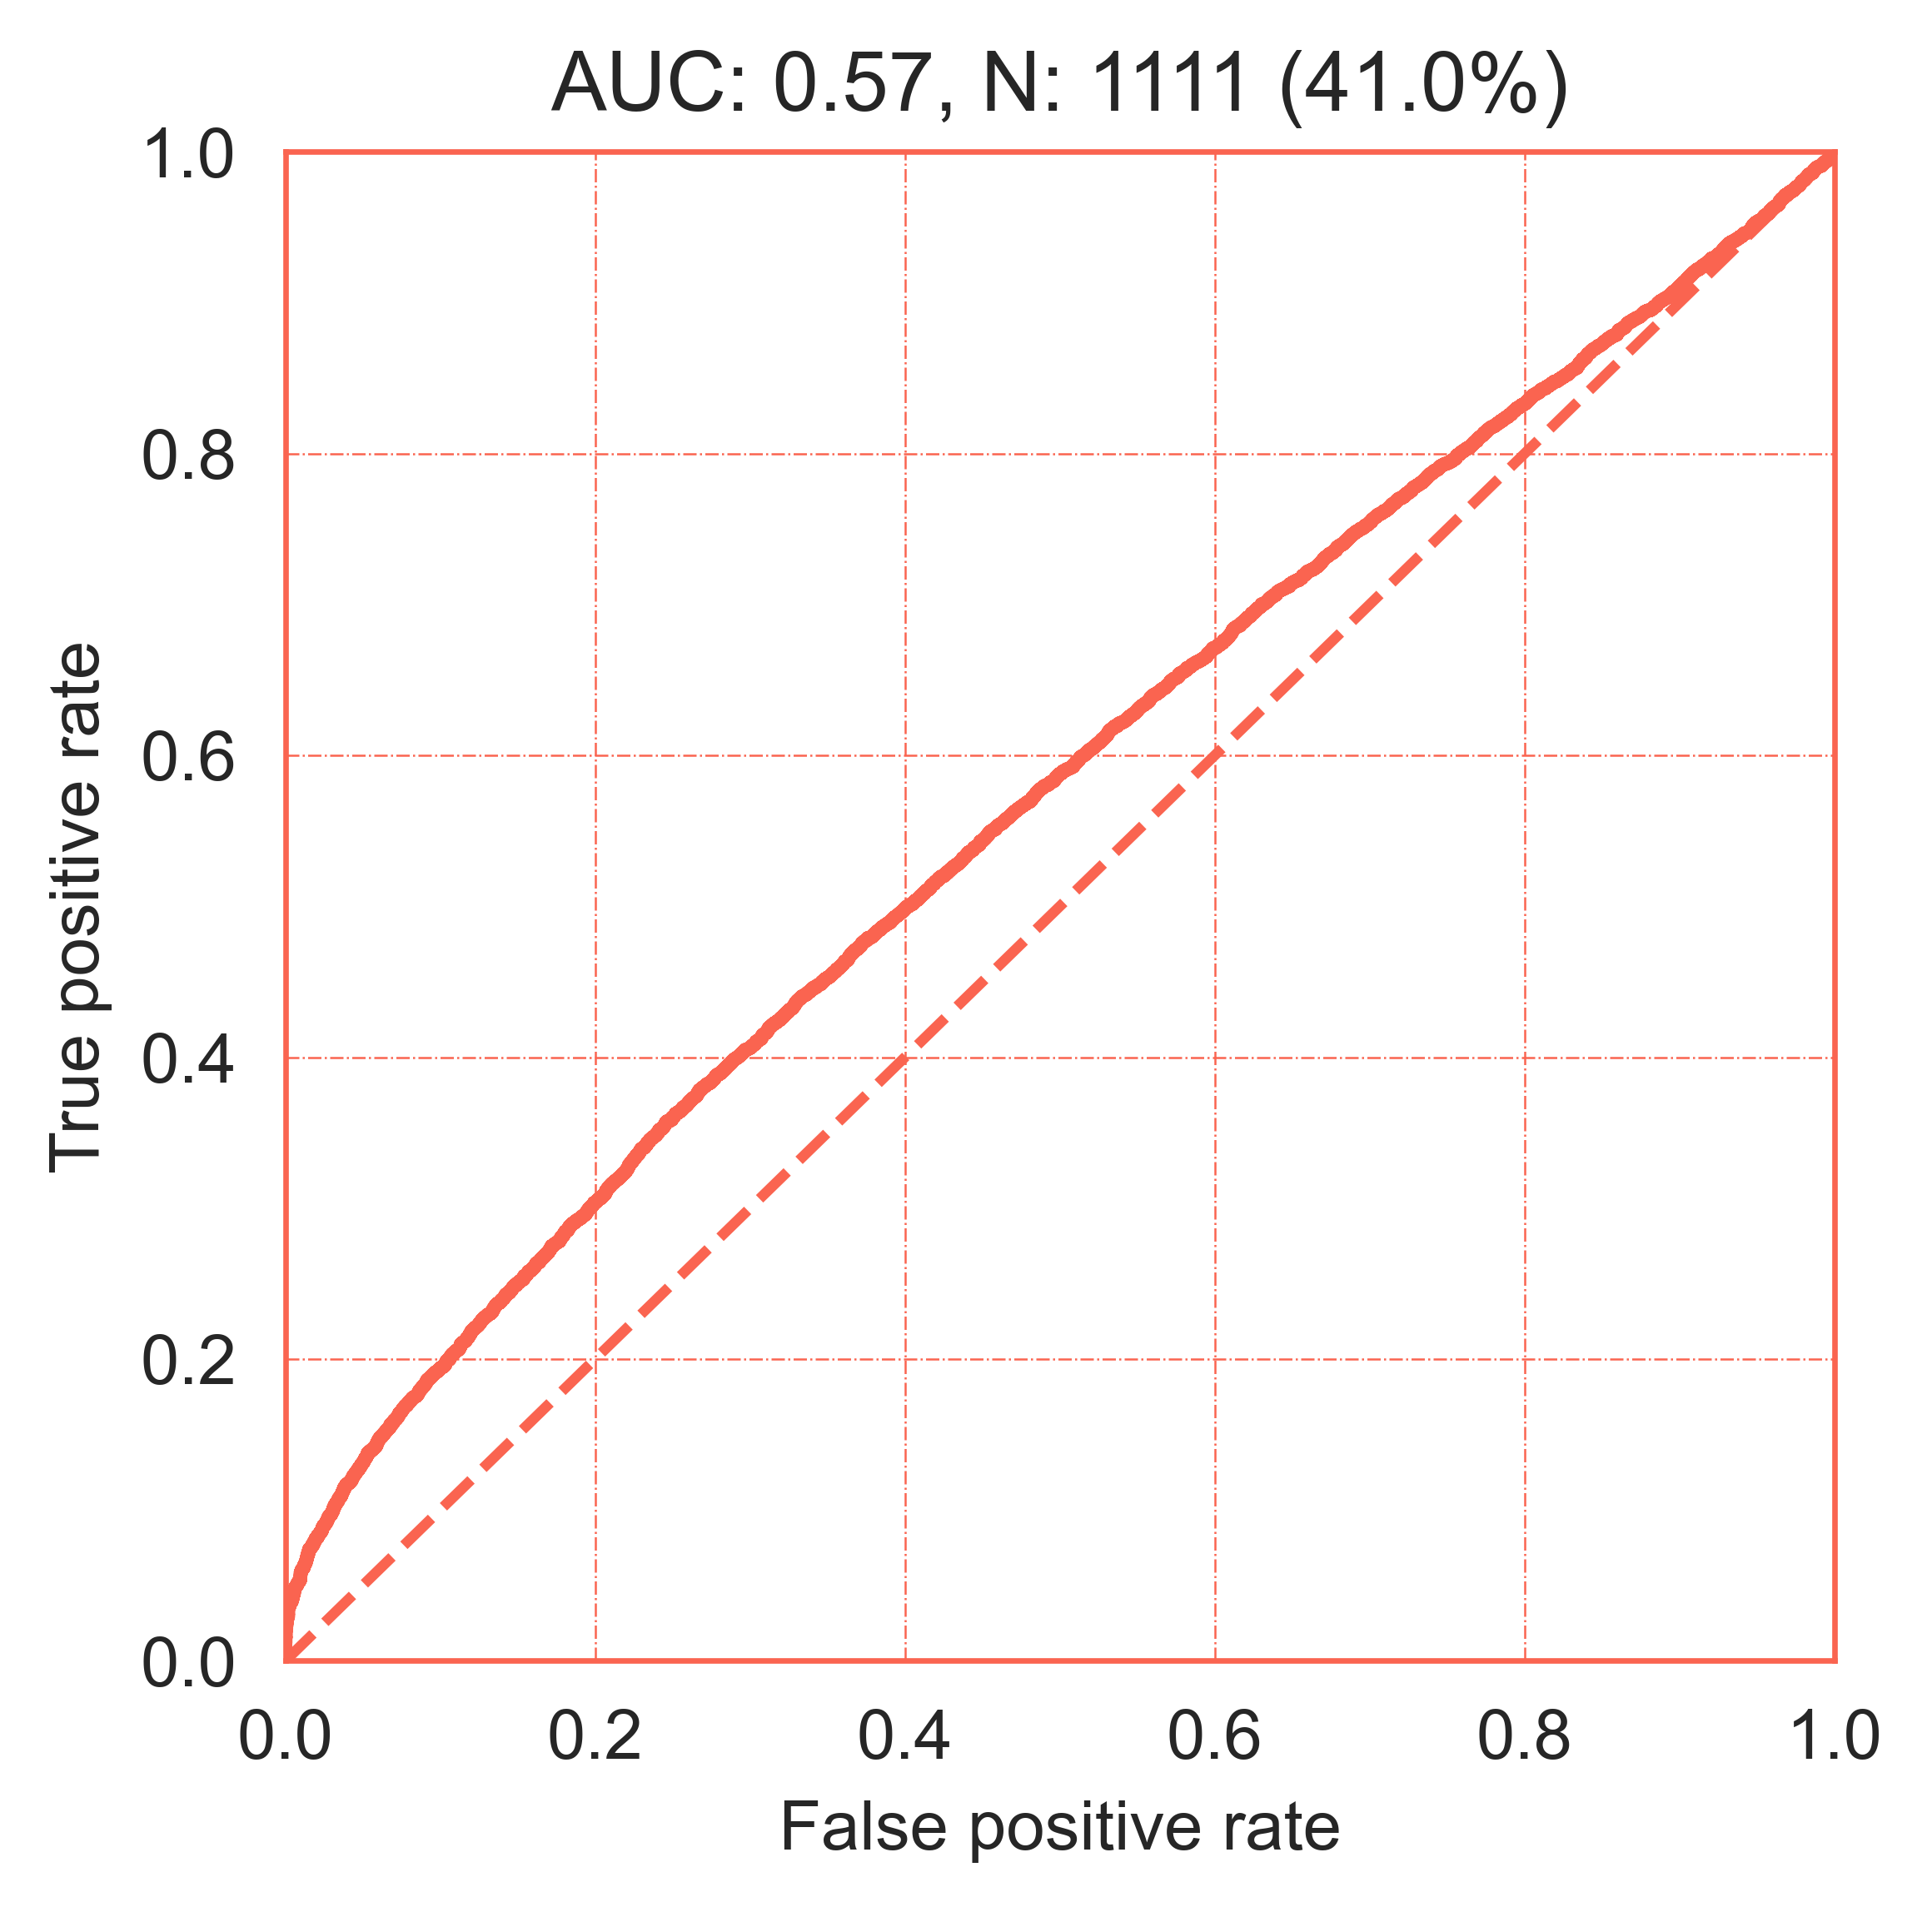

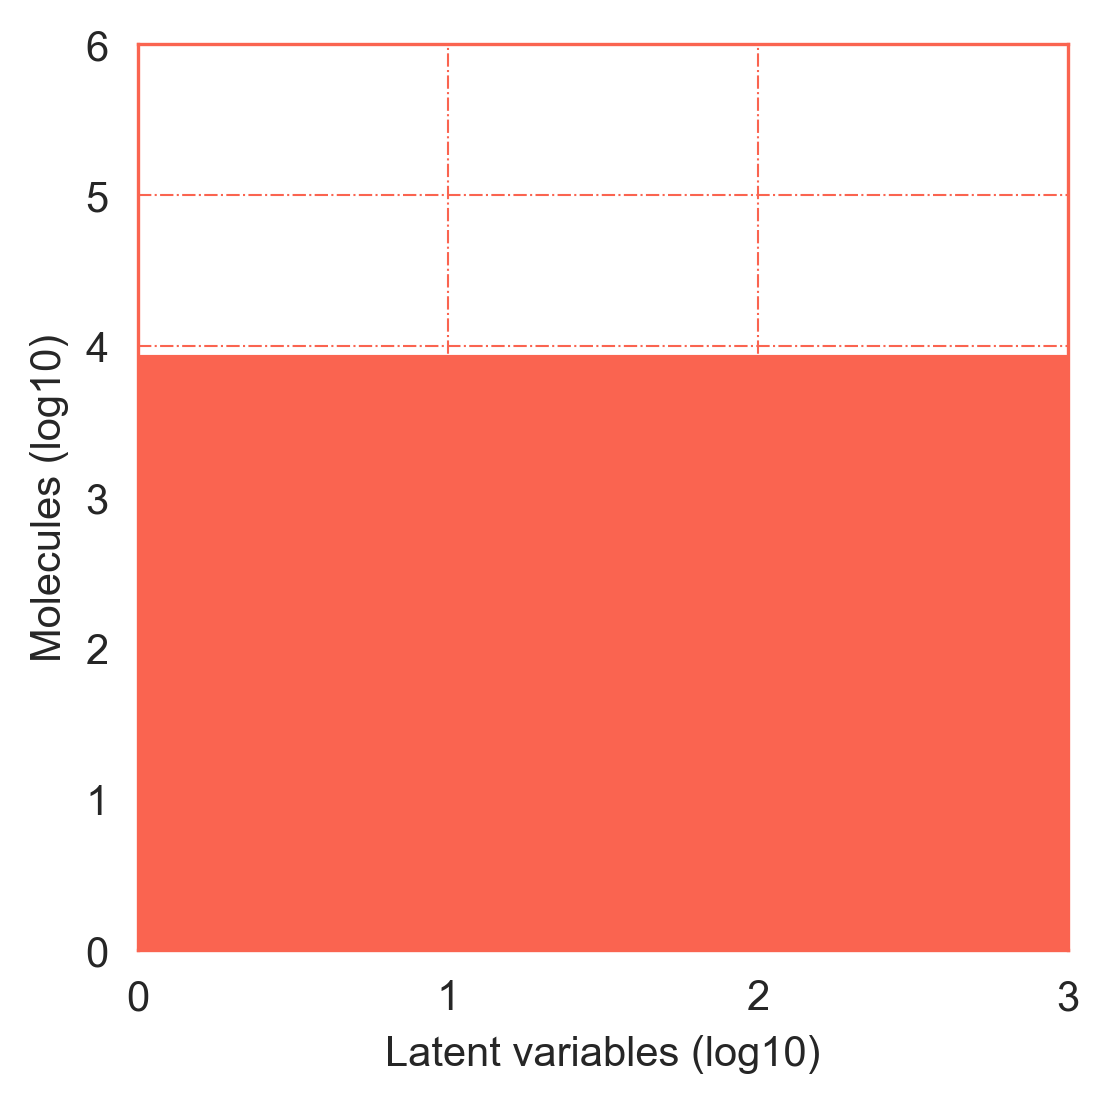

In [17]:
#sign1
sign1 = cc.get_signature('sign1', 'full', dataset)
#sign1.clear()
if not sign1.is_fit():
    sign1.fit(sign0, overwrite=True, metric_learning=False)

sign1_ref = cc.get_signature('sign1', 'reference', dataset)

neigh1= cc.get_signature('neig1', 'reference', dataset)
neigh1.fit(sign1_ref)



2021-07-29 21:36:24,345 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Reading subsamples
2021-07-29 21:36:24,530 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Getting all needed data.
2021-07-29 21:36:24,531 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2021-07-29 21:36:24,532 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2021-07-29 21:36:24,534 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2021-07-29 21:36:24,535 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2021-07-29 21:36:24,538 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2021-07-29 21:36:24,540 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2021-07-29 21:36:24,542 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across coverage
2021-07-29 21:36:24,544 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] kw_plotter: exemplary True
2021-07-29 21:36:24,544 chemicalchecker.core.diagnostic

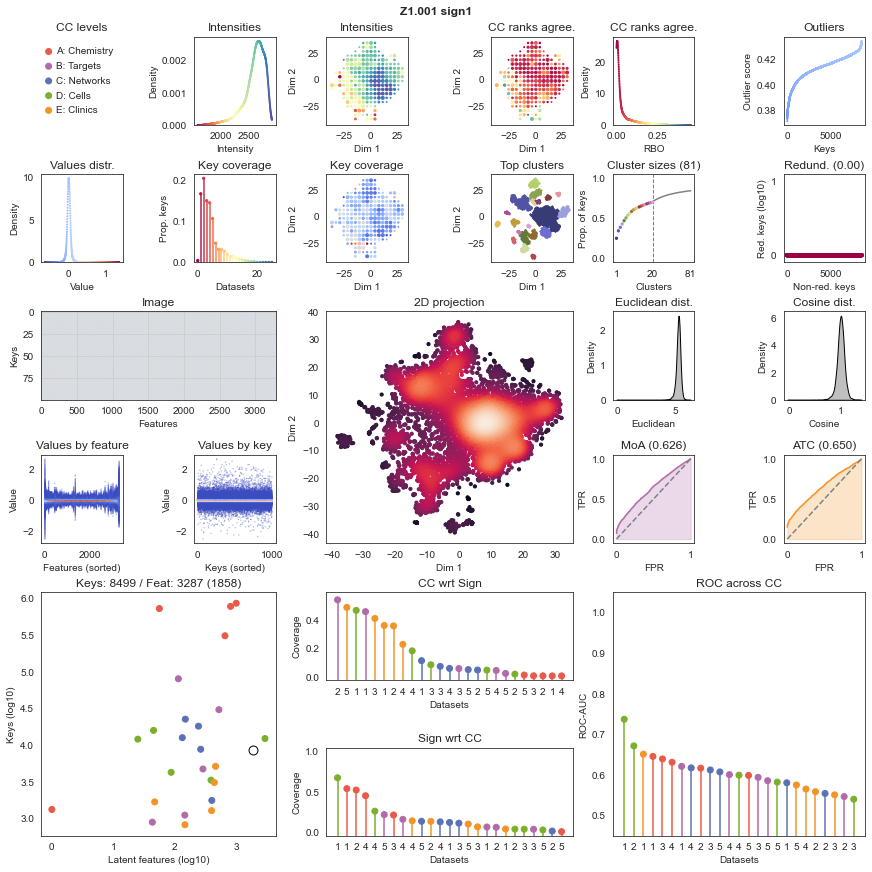

In [18]:
diagPlot(sign1_ref)

2021-07-29 21:36:31,561 chemicalchecker.core.signature_base.BaseSignature [INFO    ] New signature: /aloy/home/epareja/TFM/CC_LINCS_2020/reference/Z/Z1/Z1.001/sign2
2021-07-29 21:36:32,824 tensorflow   [WARNING ] From /opt/miniconda3/envs/py37/lib/python3.7/site-packages/adanet/core/tpu_estimator.py:33: The name tf.estimator.tpu.TPUEstimator is deprecated. Please use tf.compat.v1.estimator.tpu.TPUEstimator instead.

2021-07-29 21:36:32,897 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2021-07-29 21:36:32,900 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Node2Vec
2021-07-29 21:36:32,902 chemicalchecker.core.sign2.sign2 [DEBUG   ] Node2Vec on /aloy/home/epareja/TFM/CC_LINCS_2020/reference/Z/Z1/Z1.001/sign1/sign1.h5
2021-07-29 21:36:32,903 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/epareja/programs/cc/code/chemical_checker/package/chemicalchecker/util/config/cc_config.json
2021-07-29 21:36:33

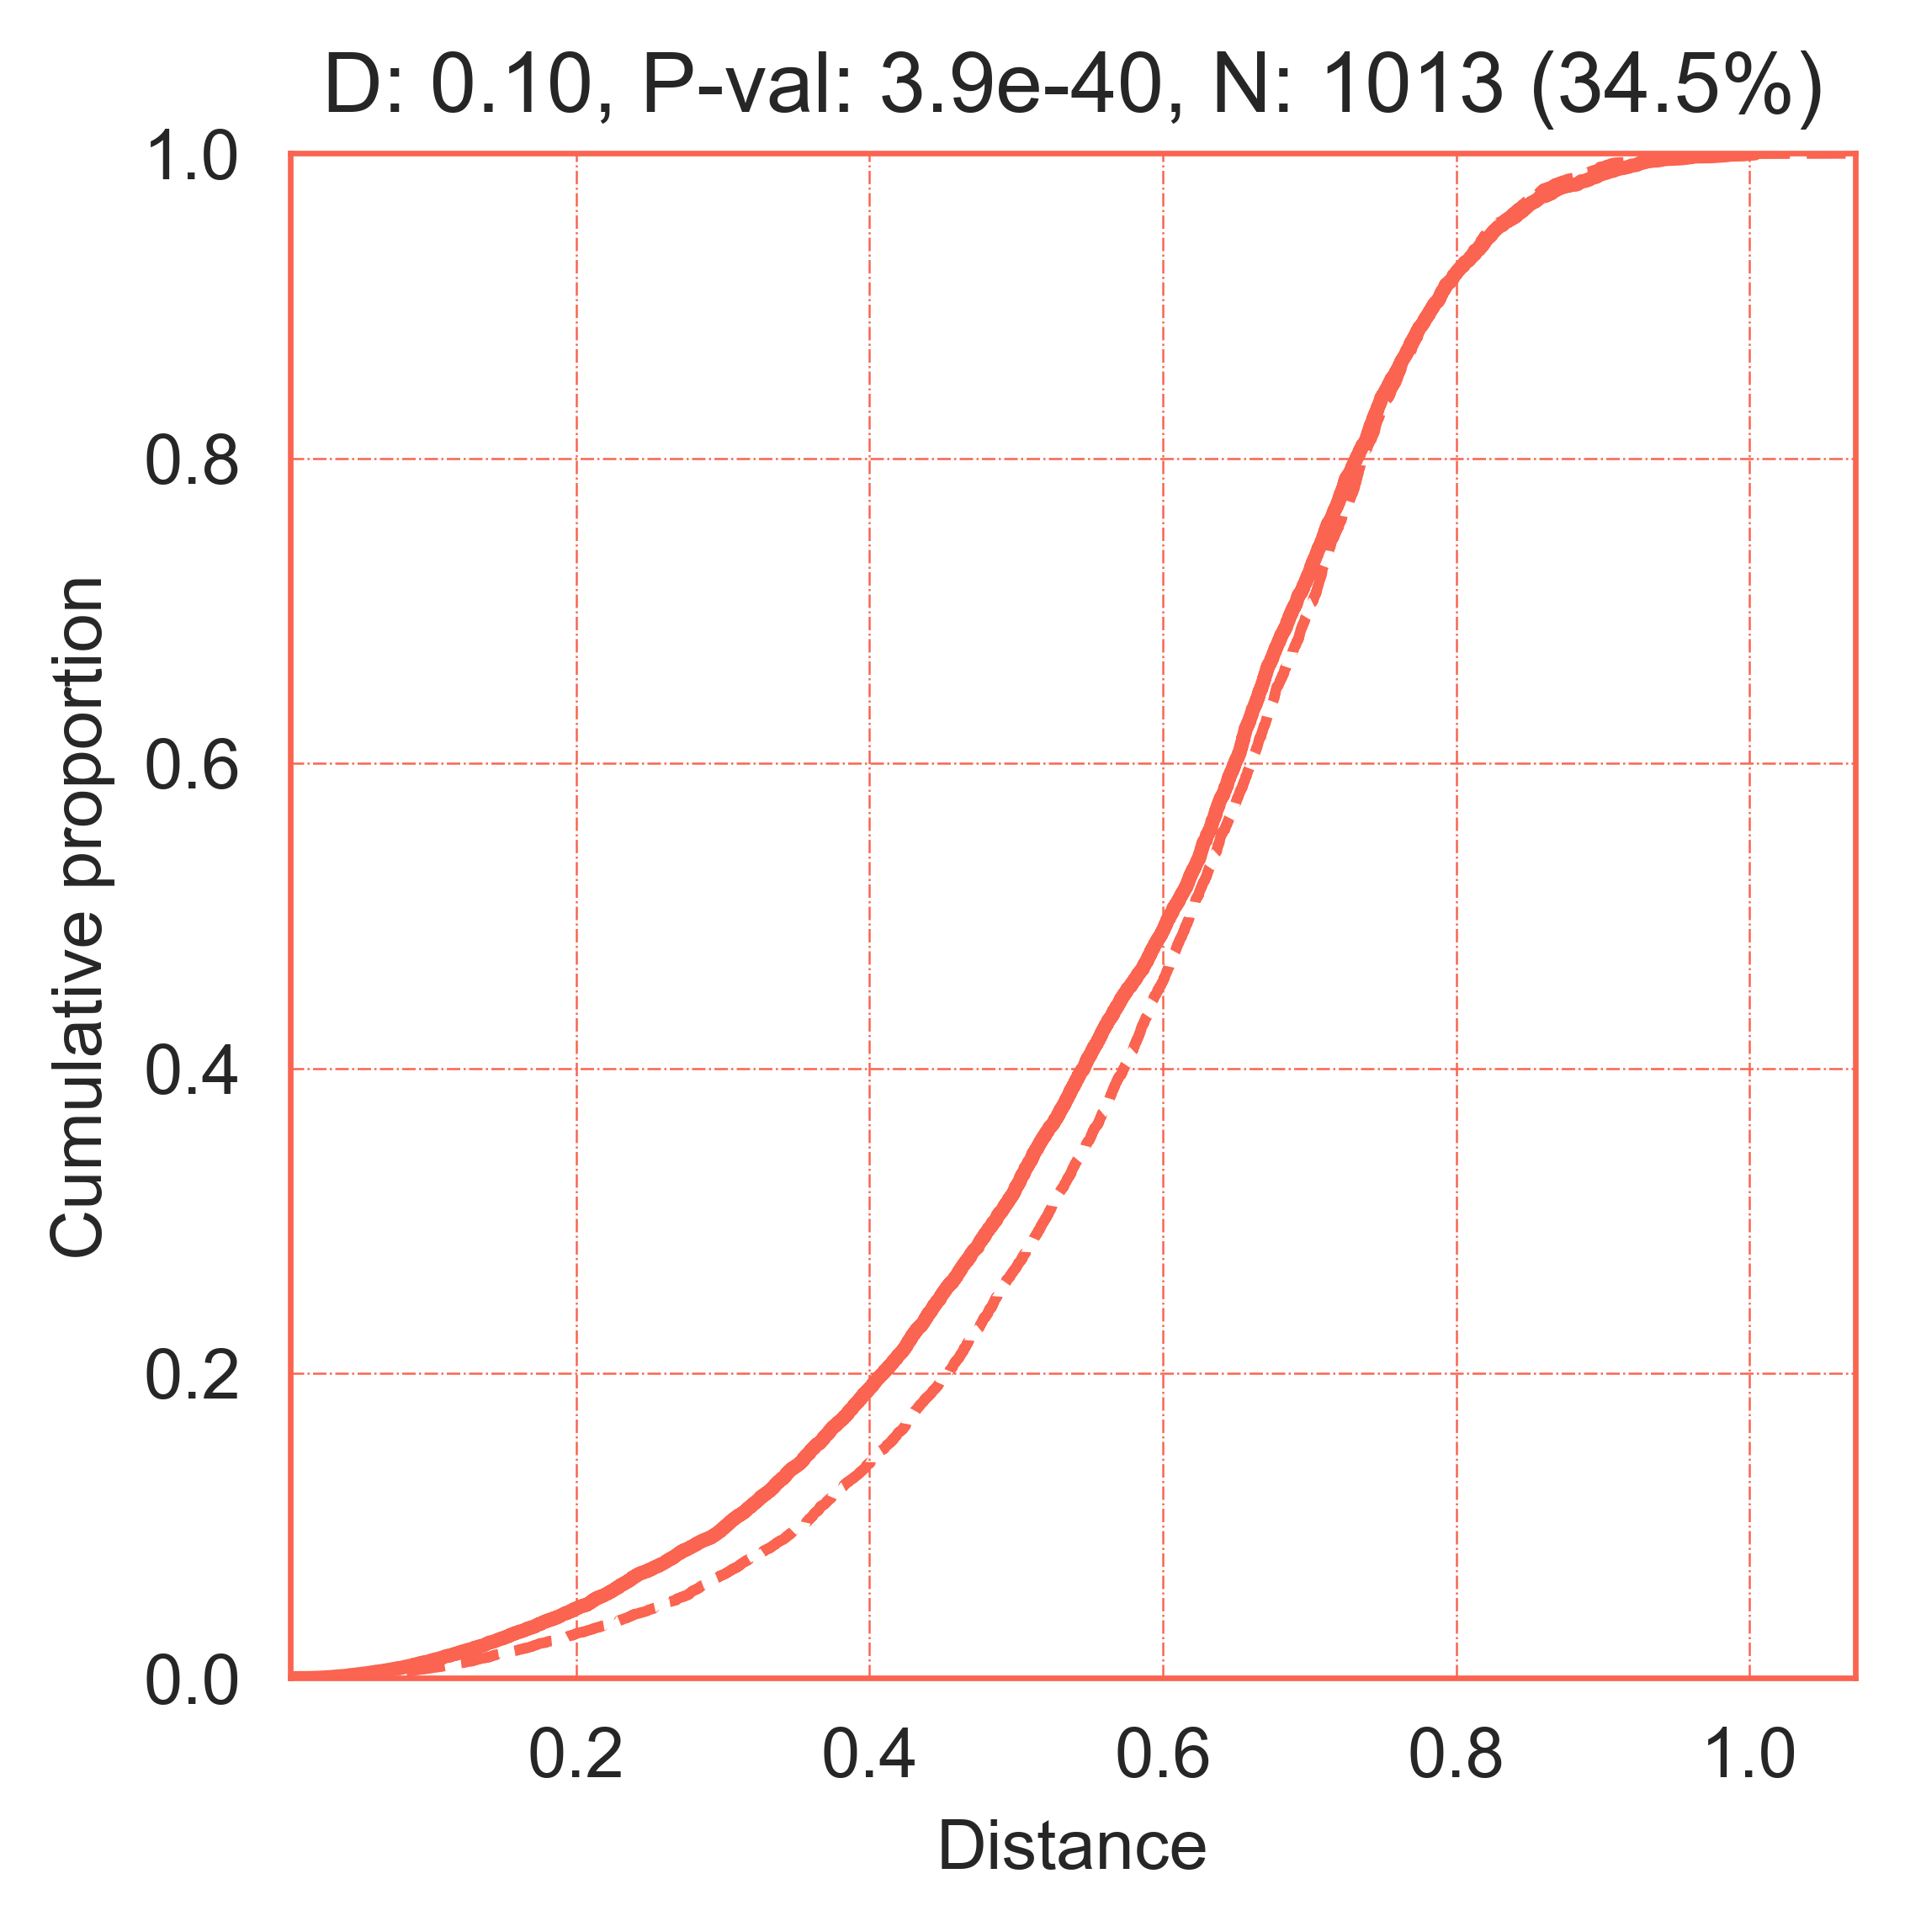

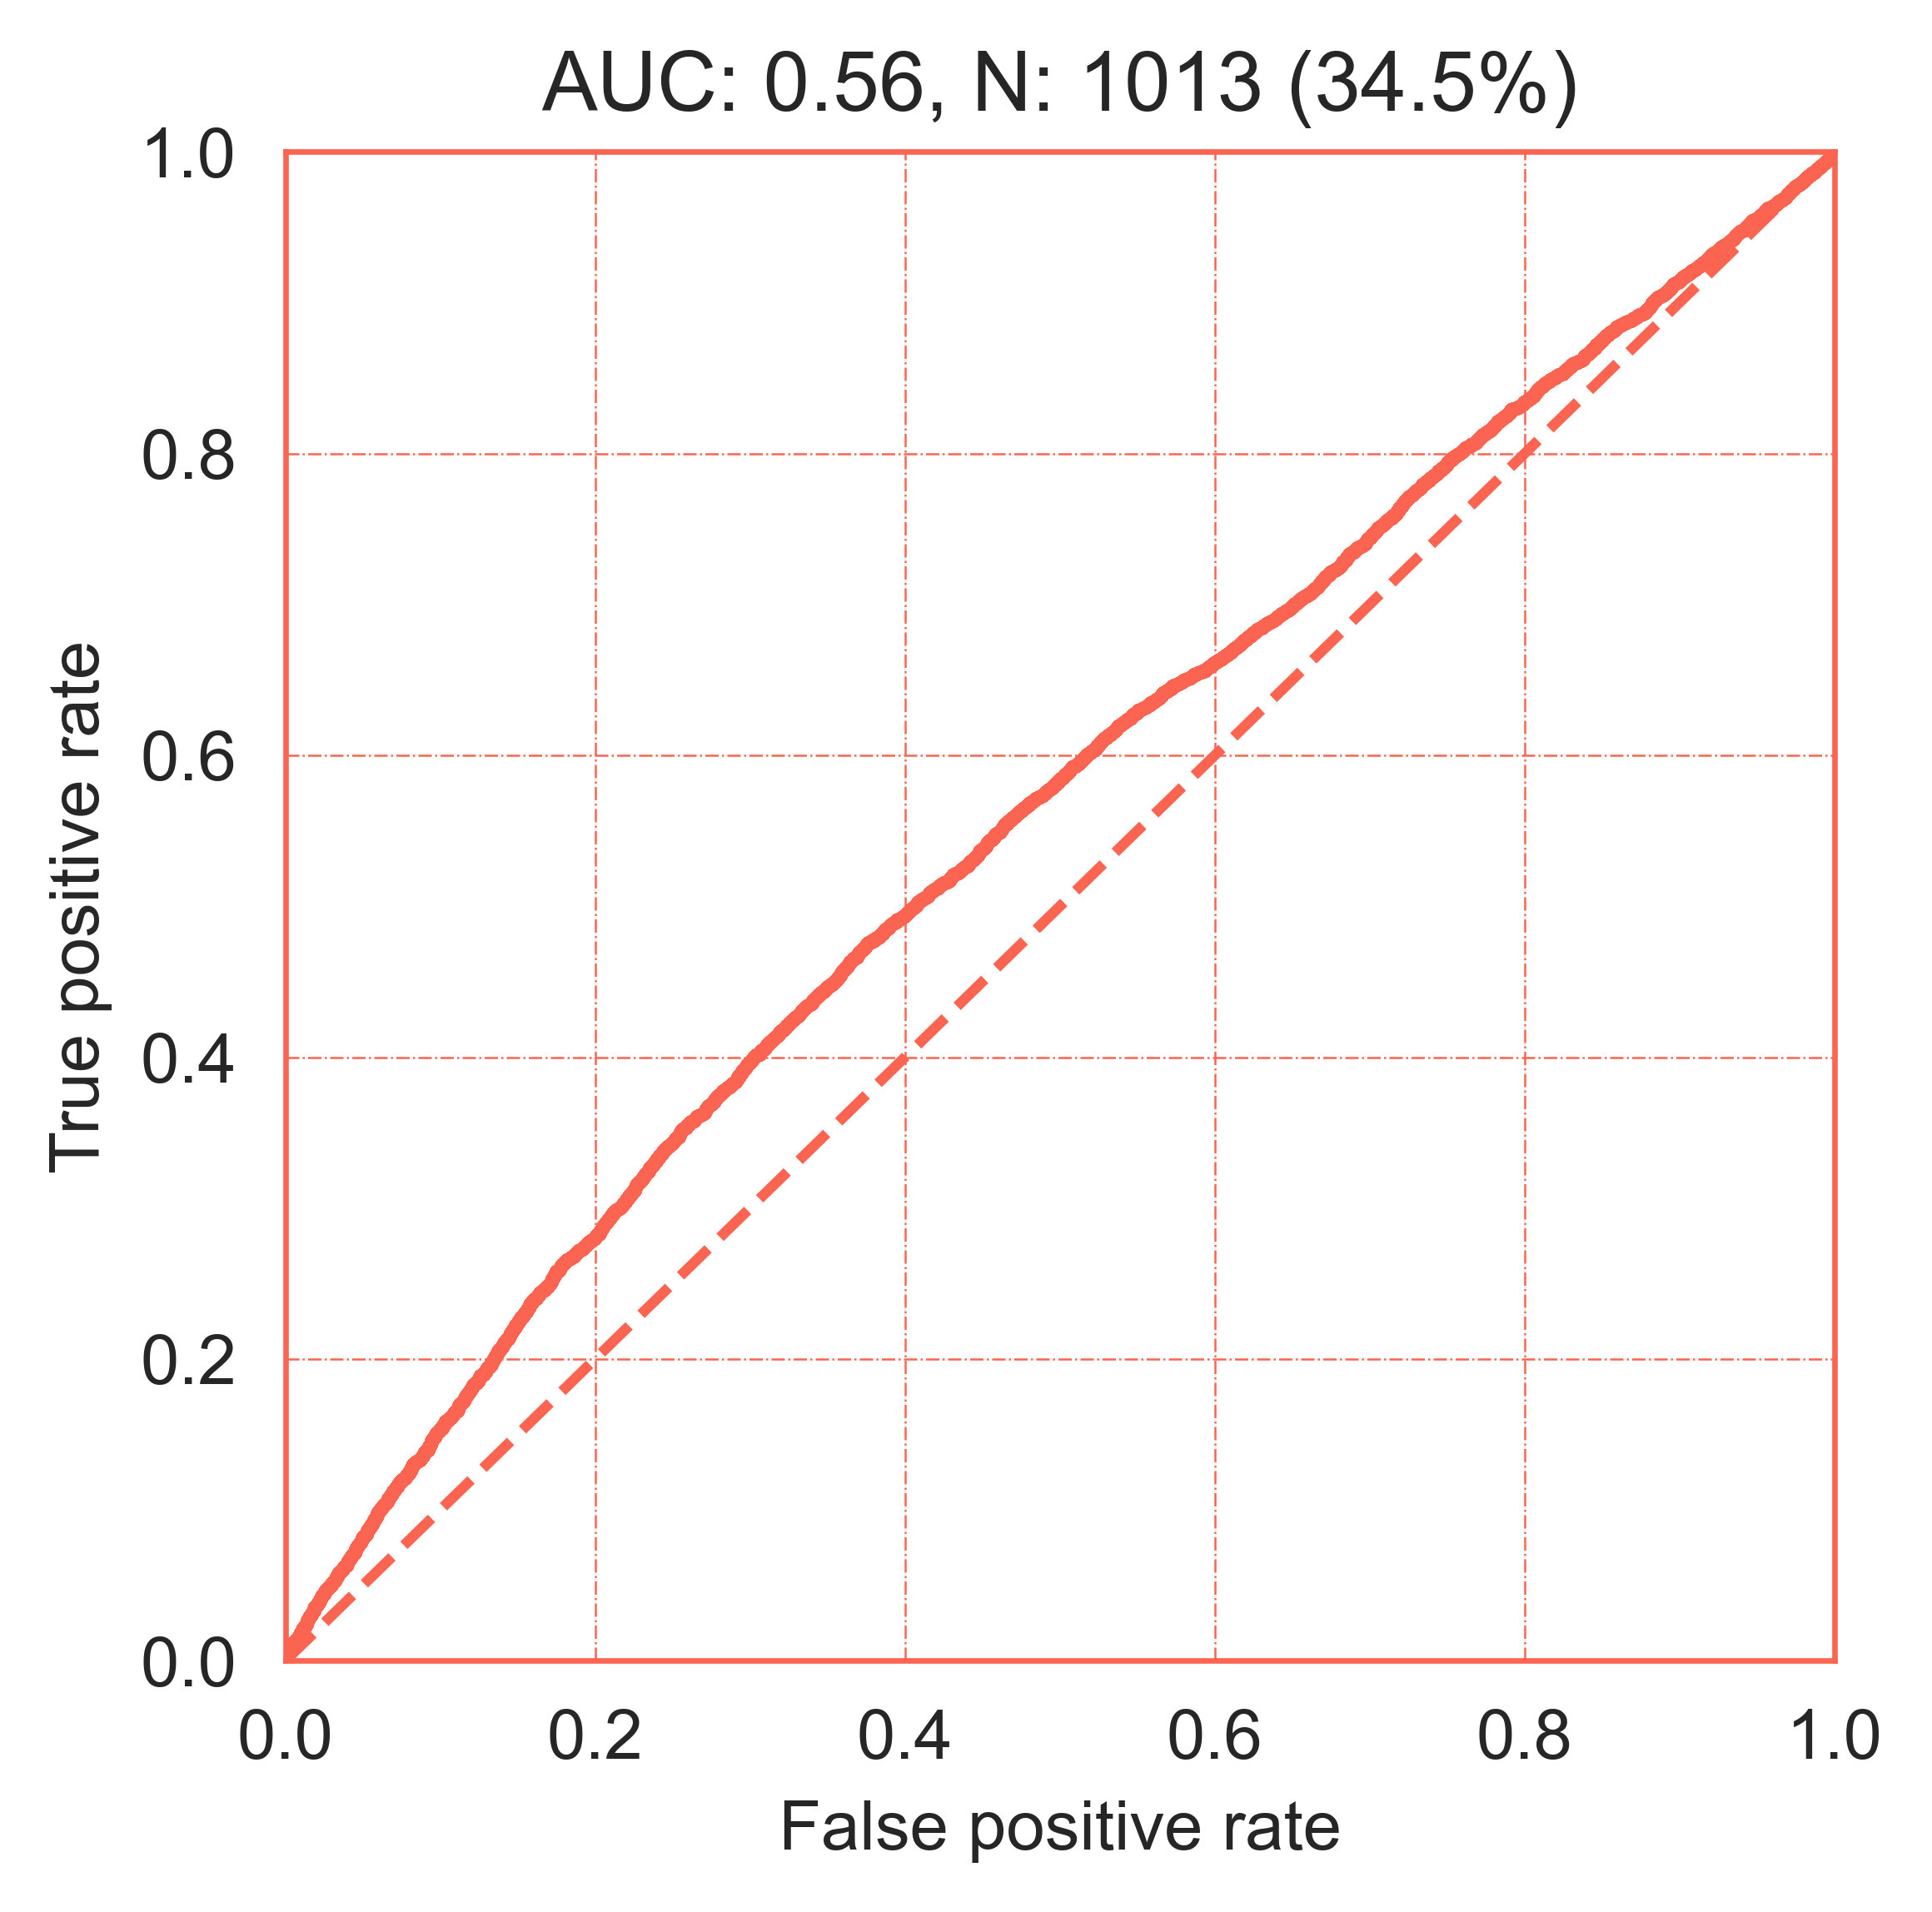

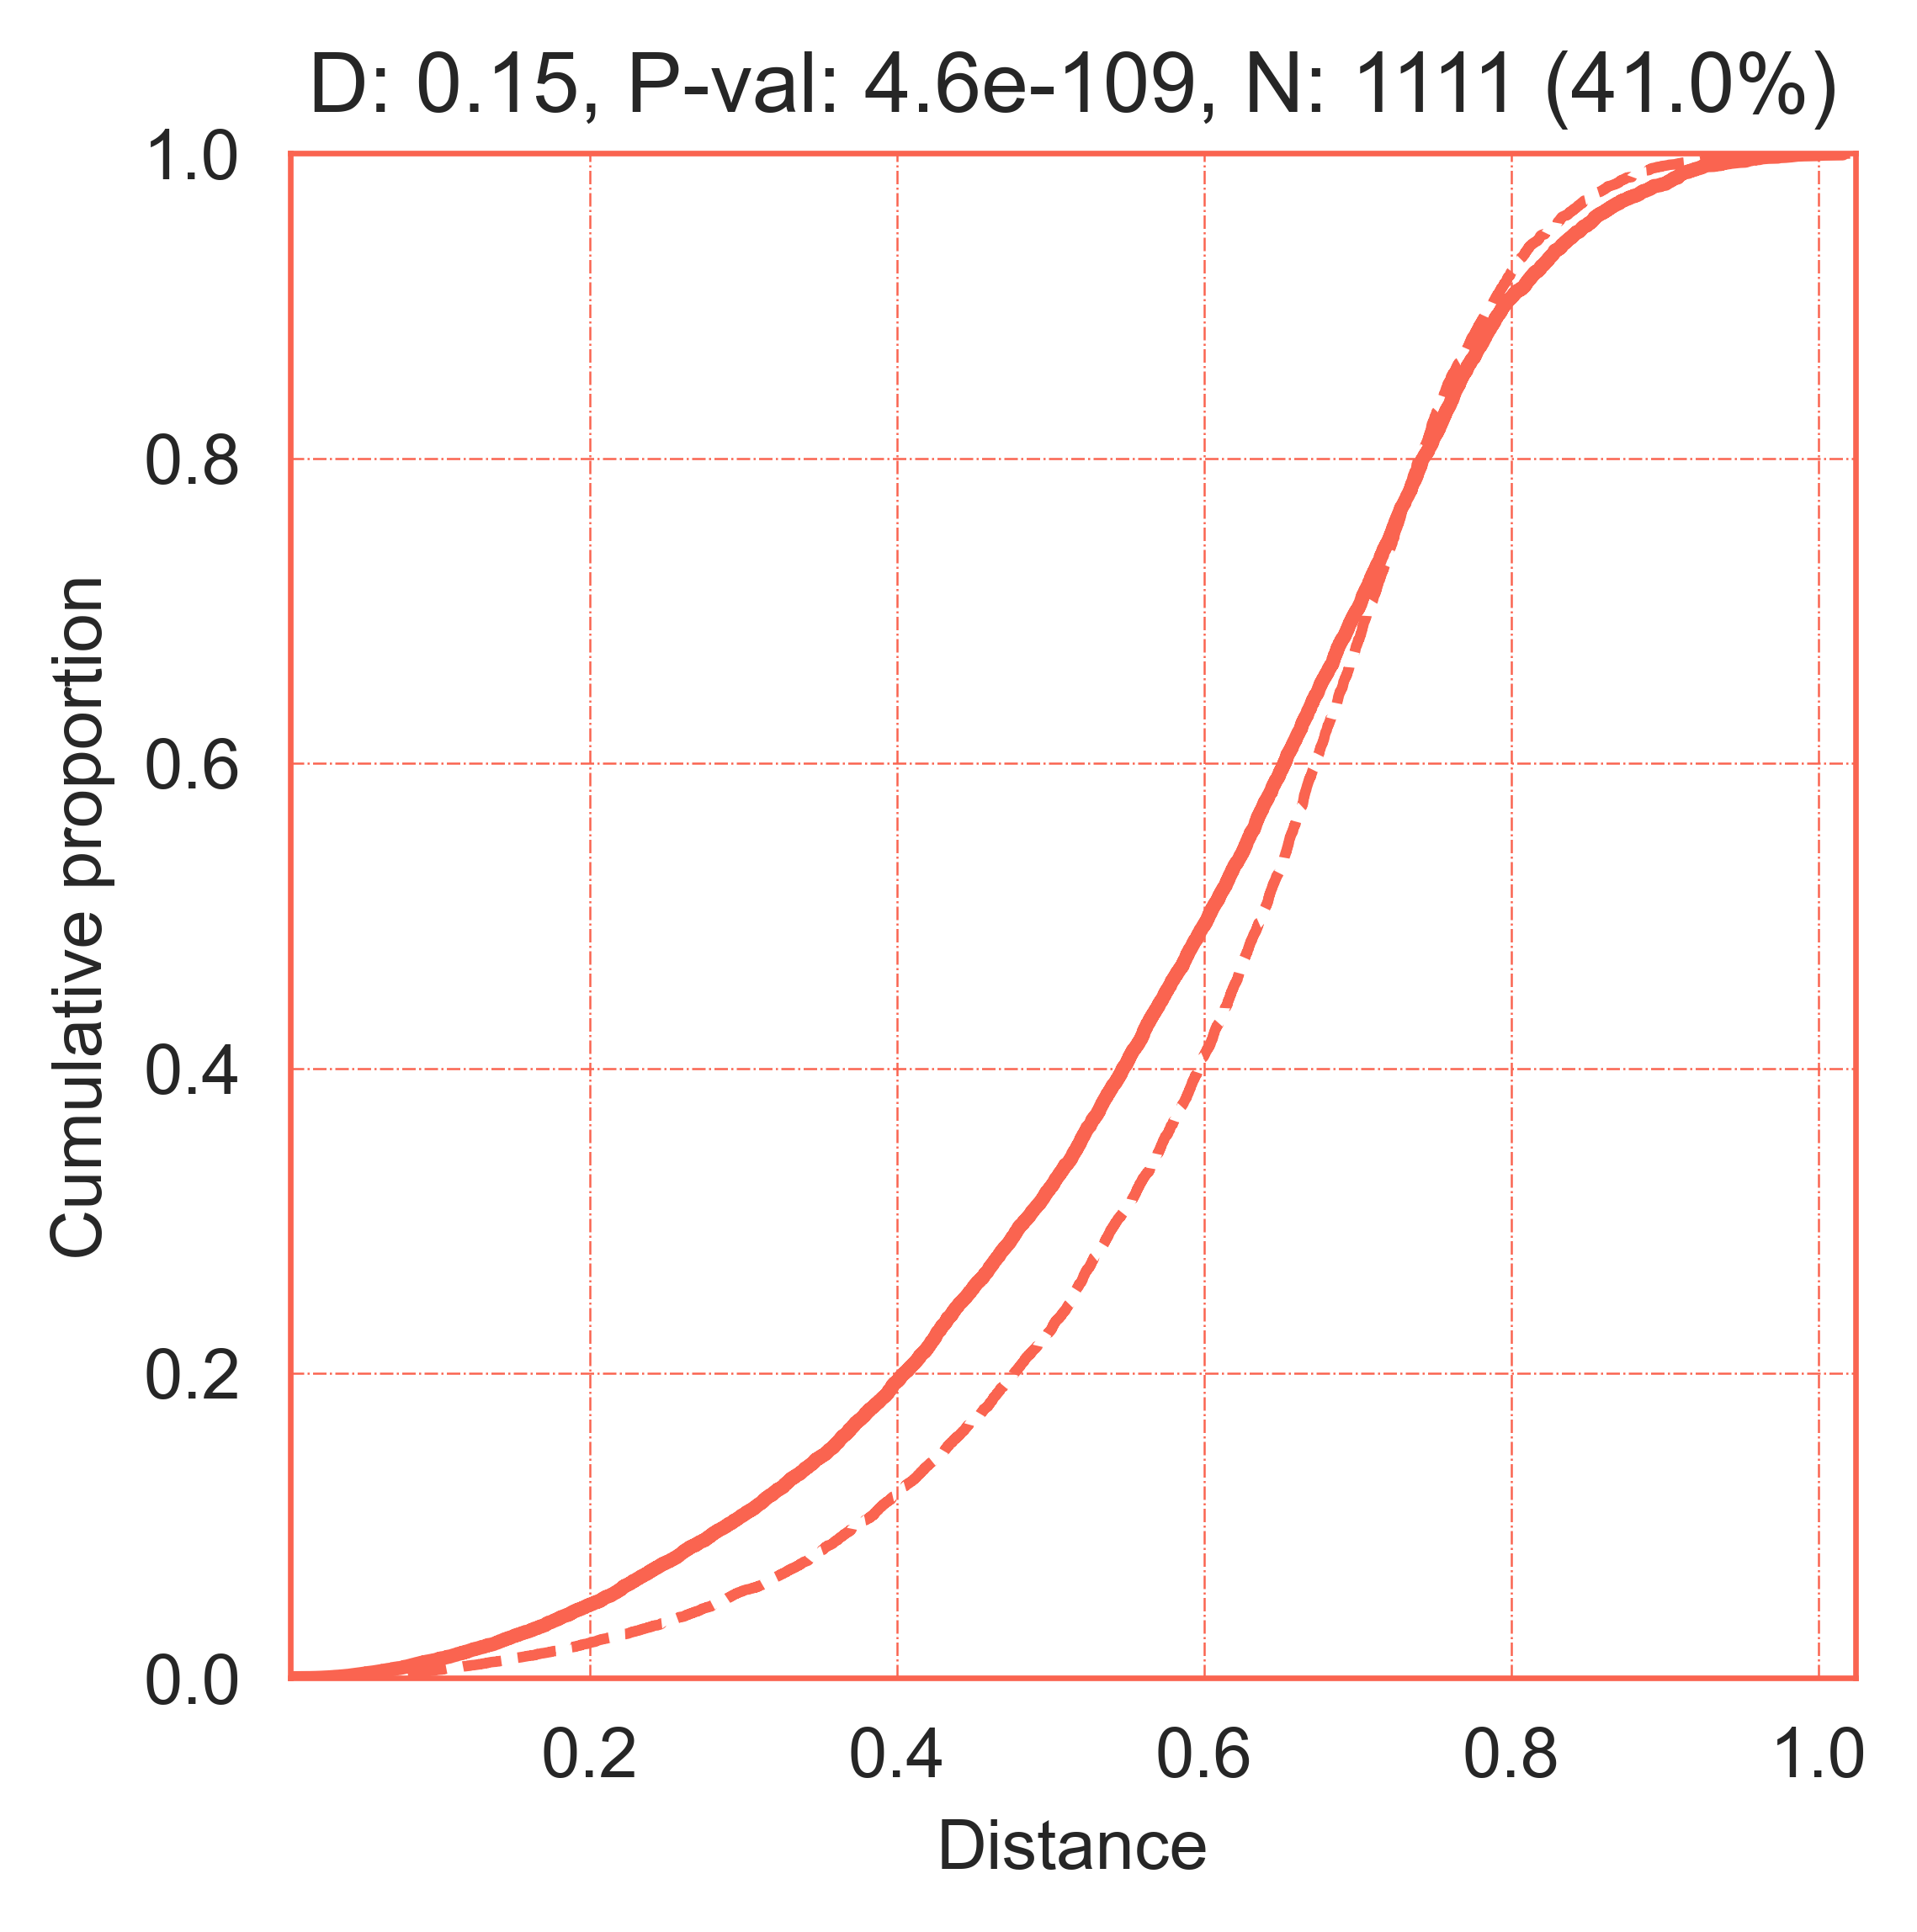

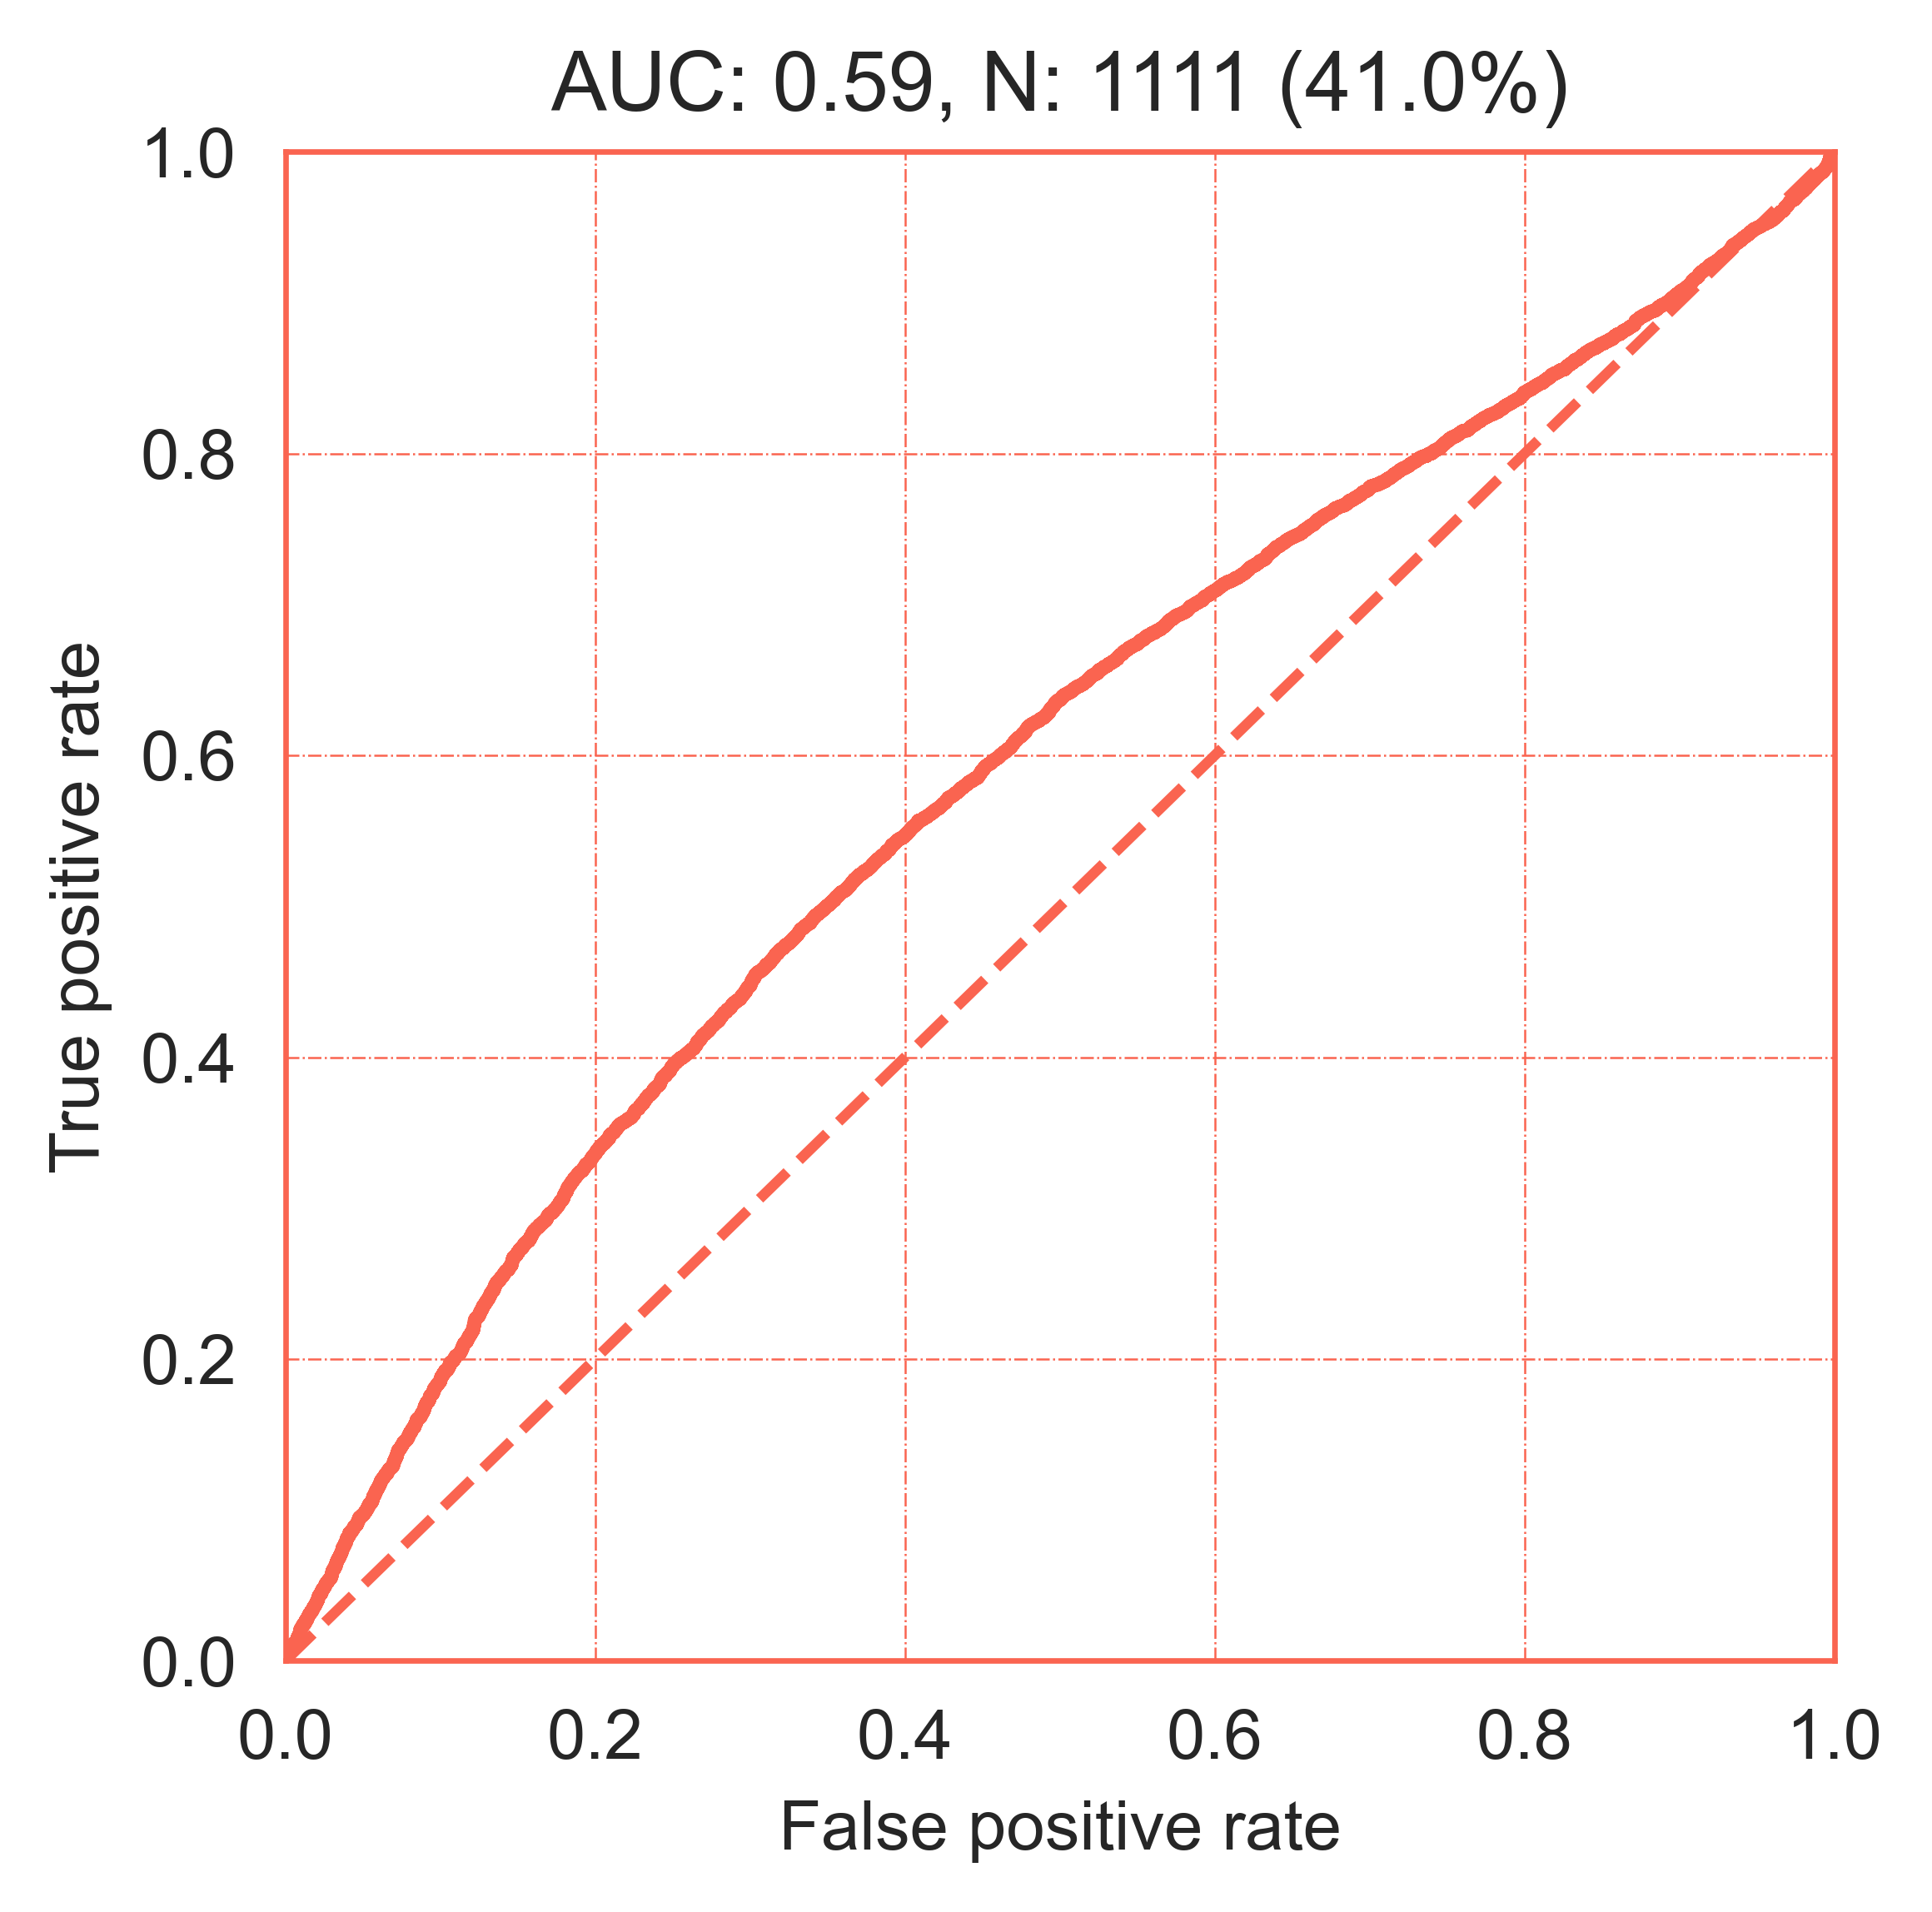

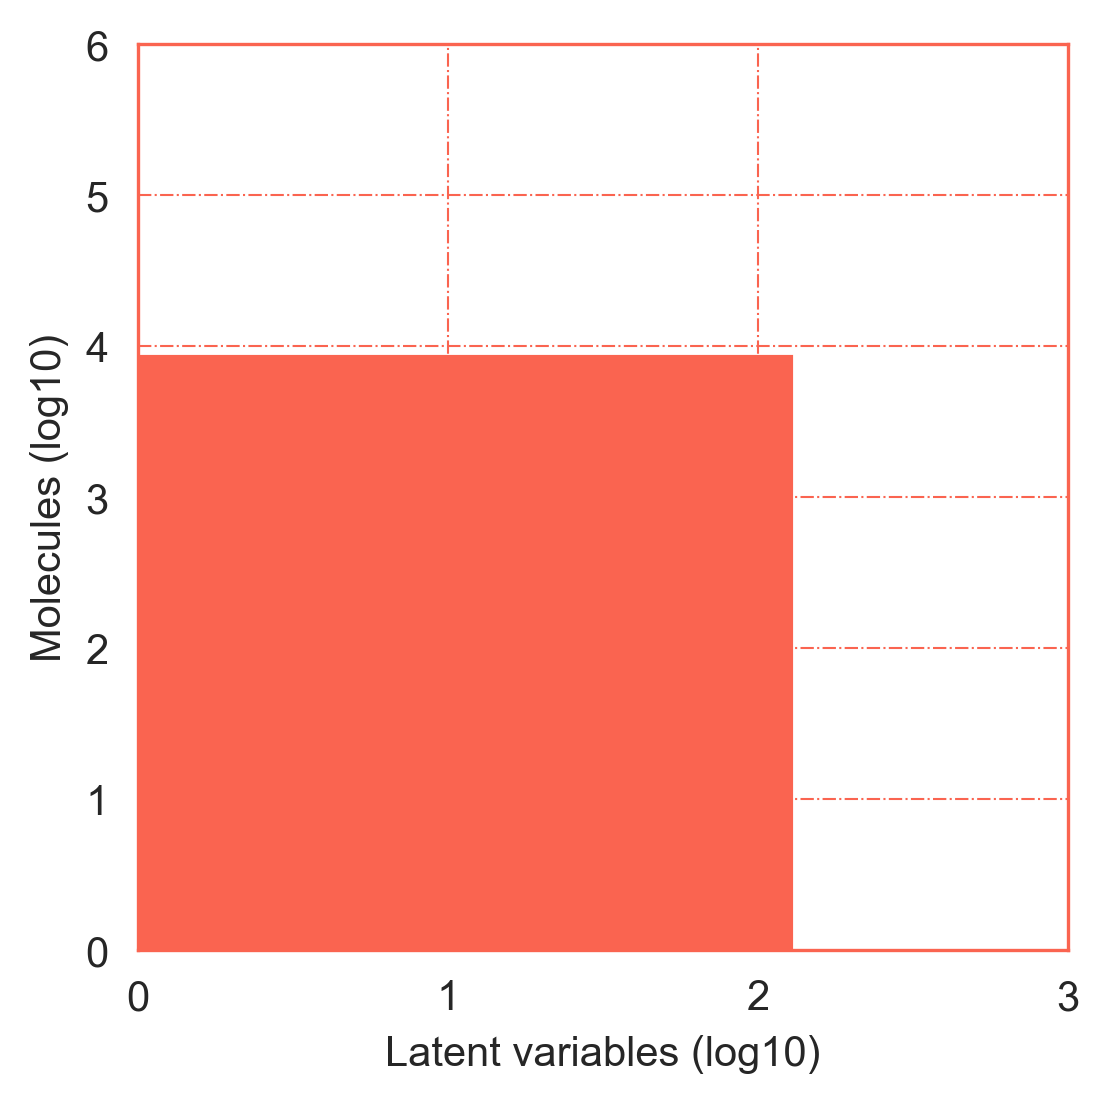

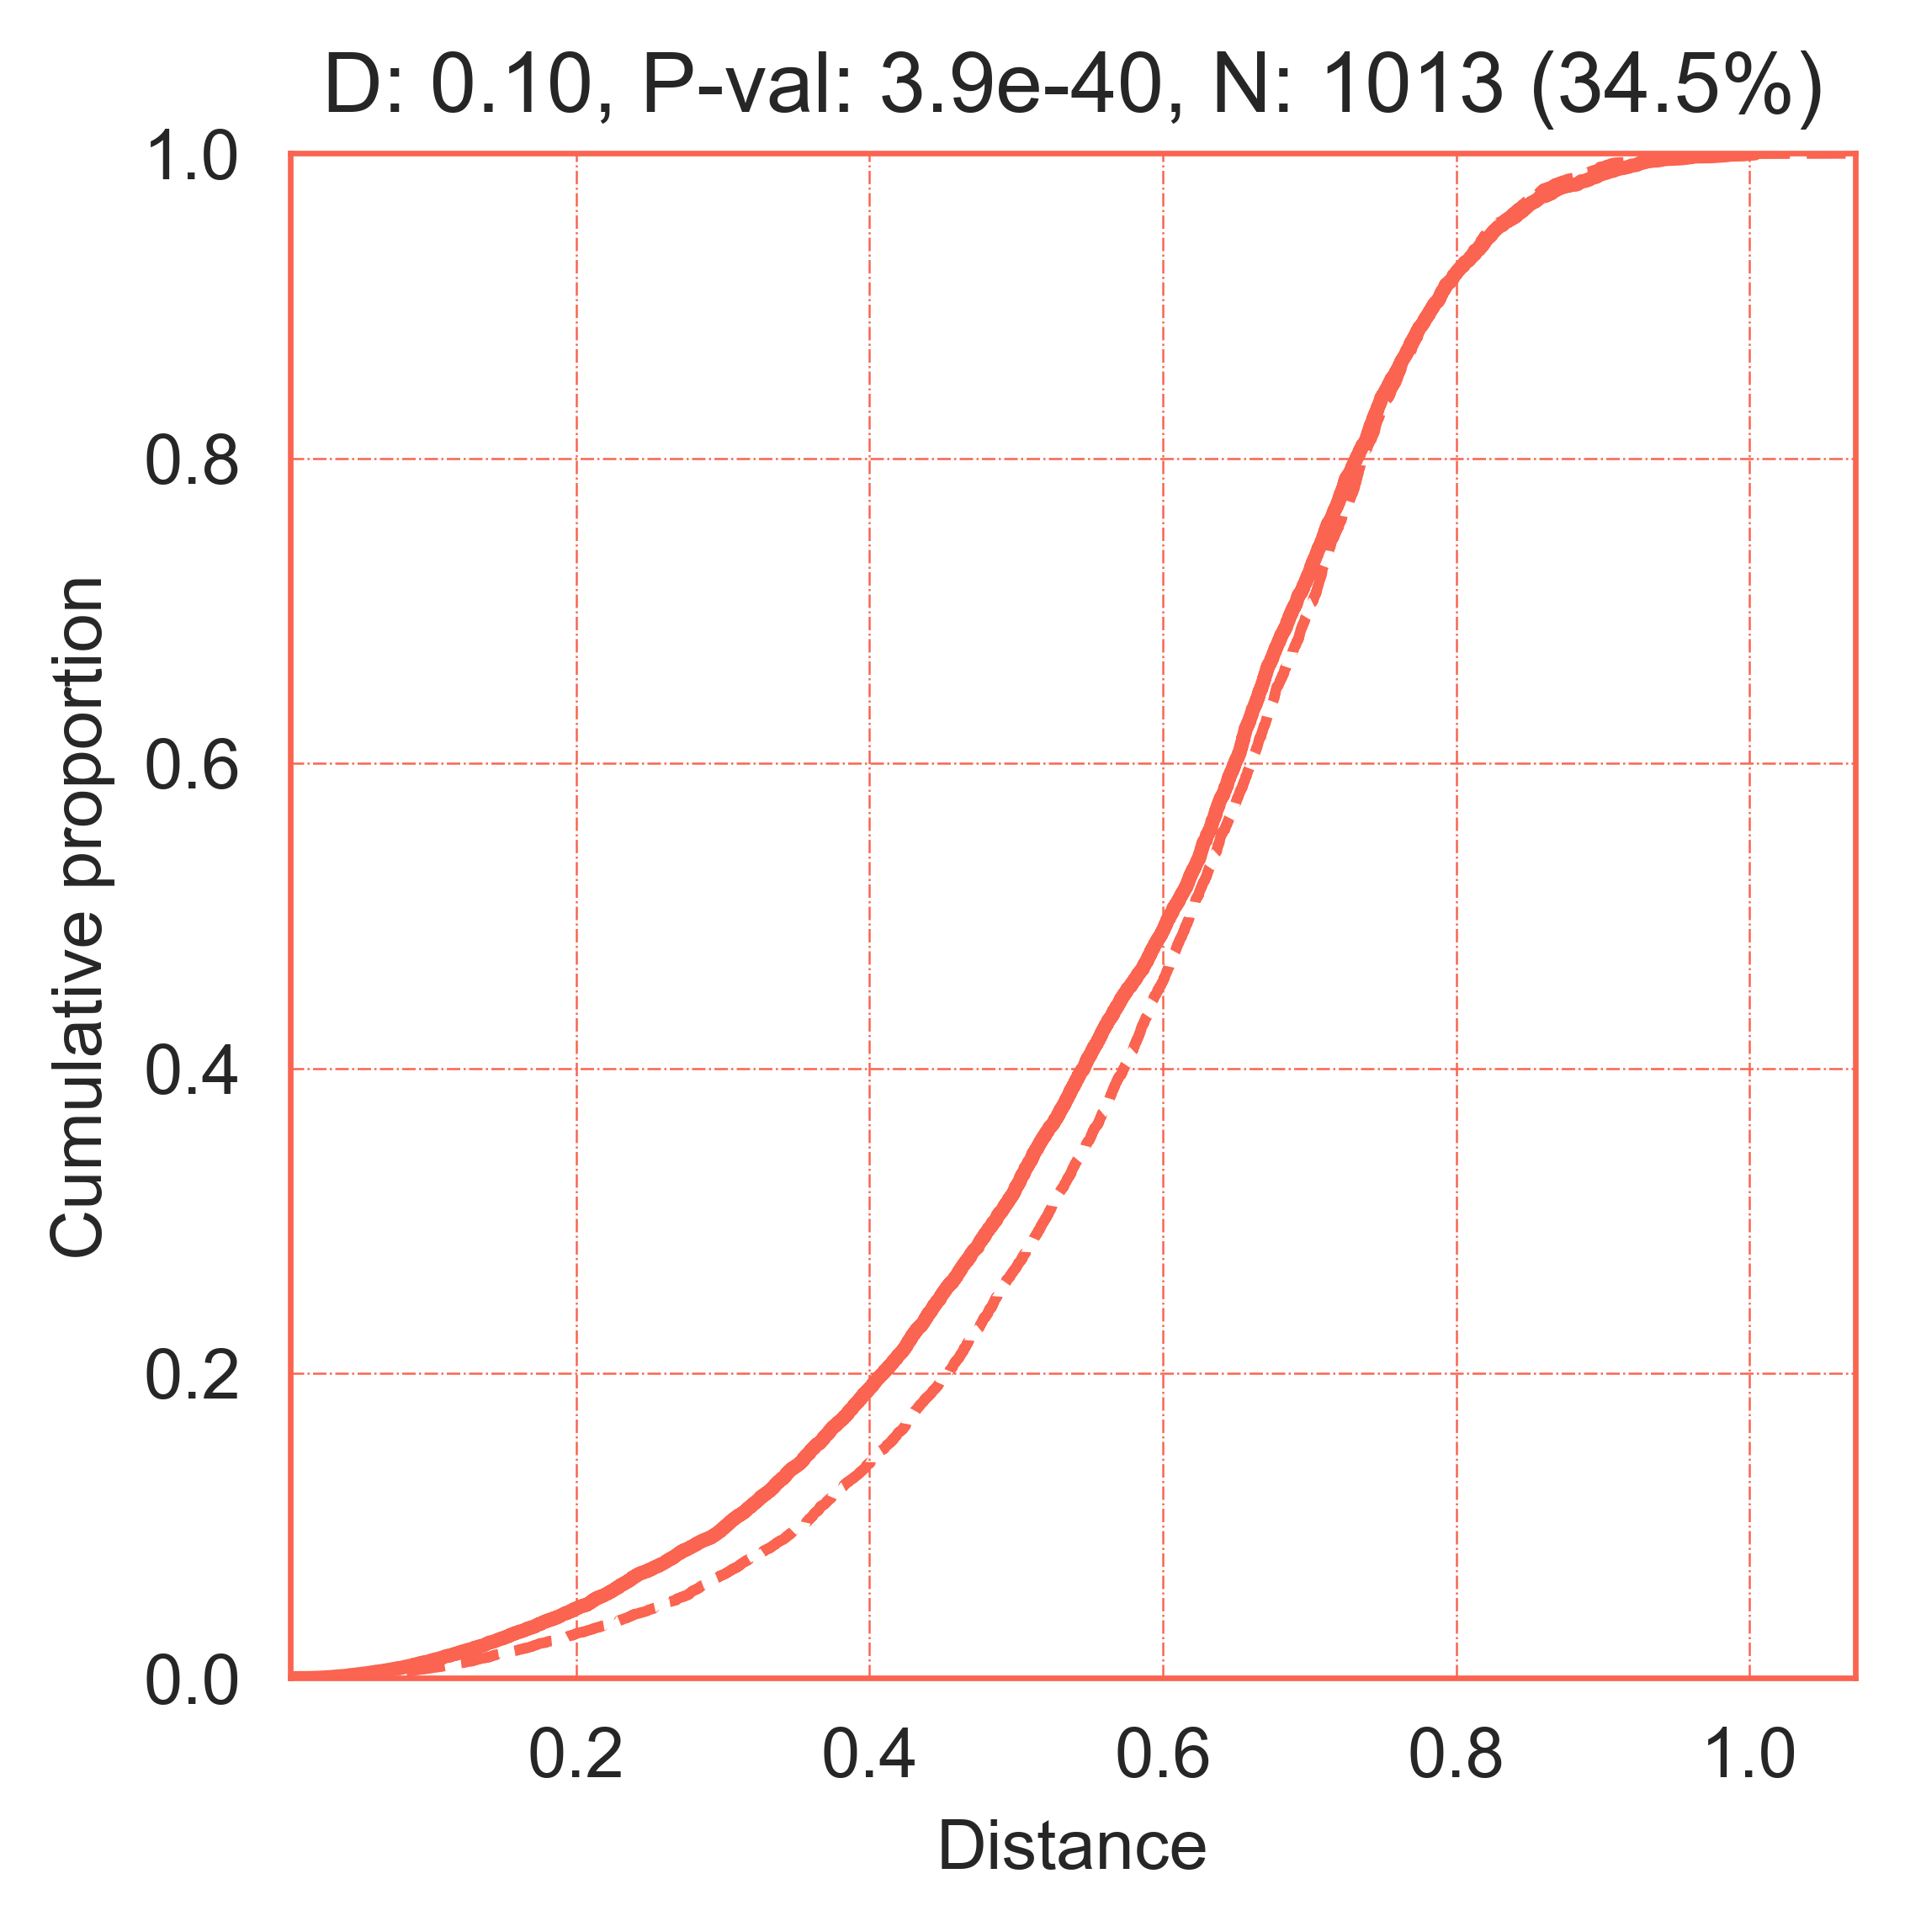

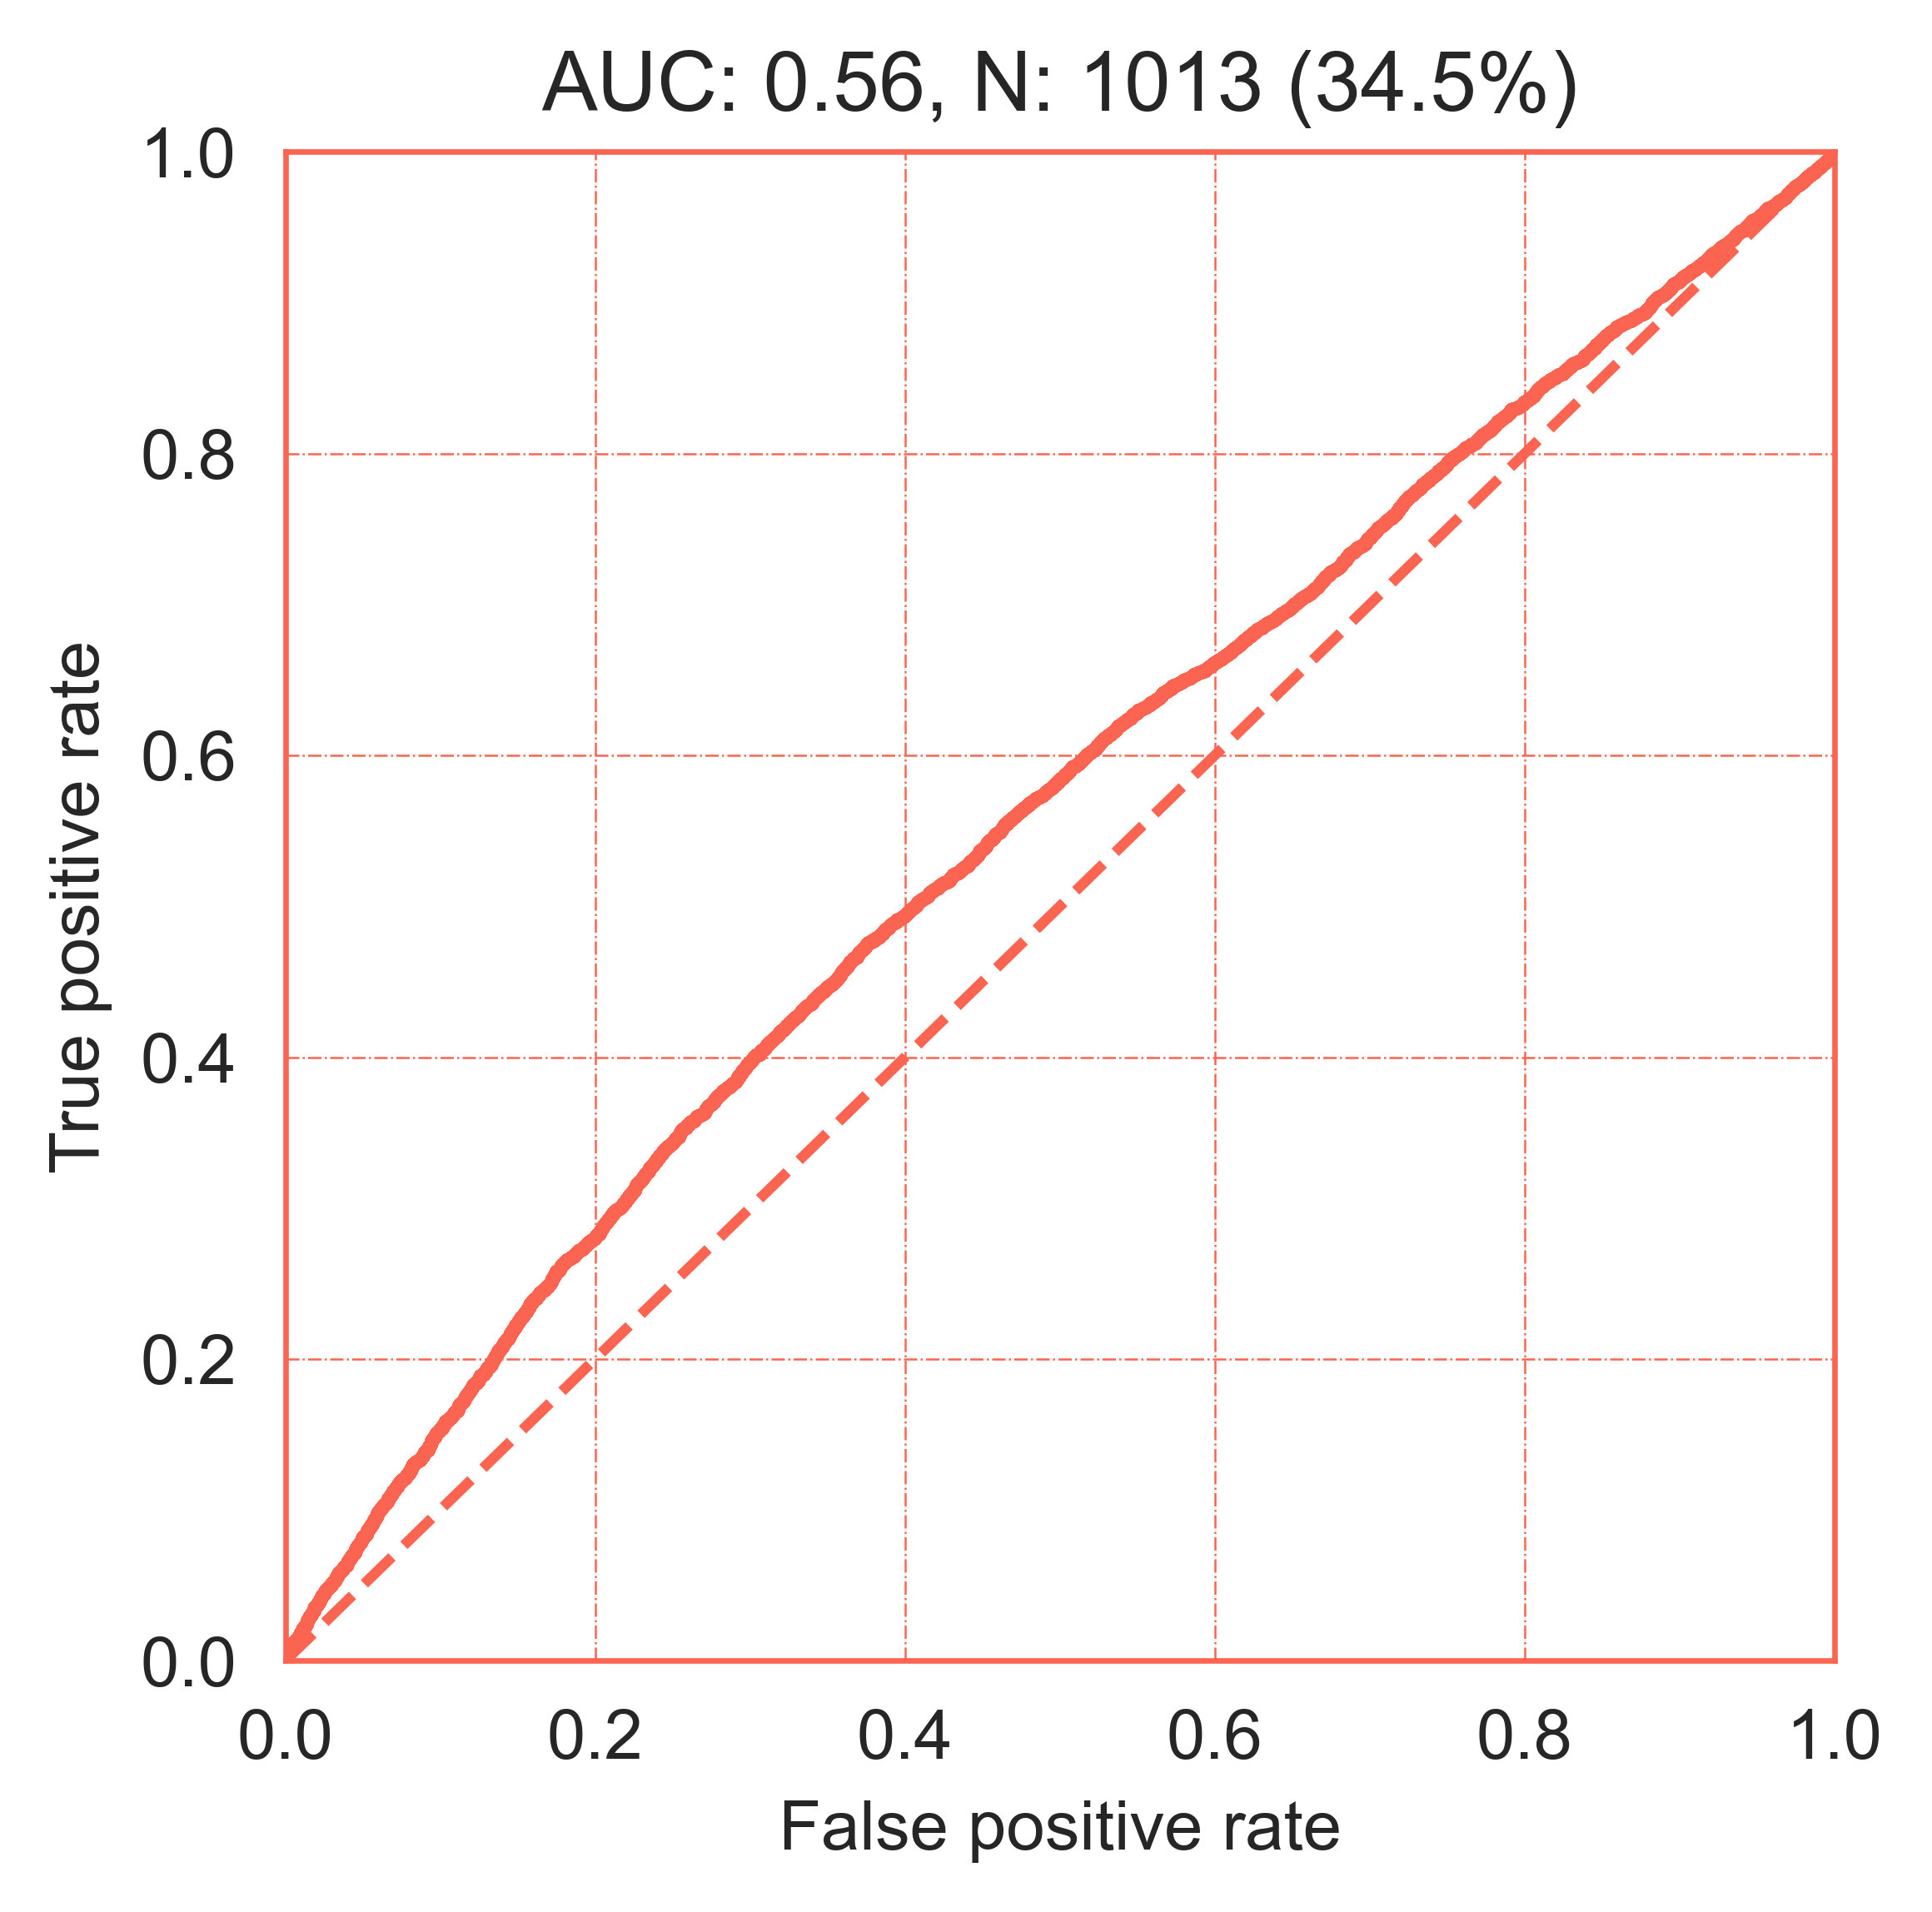

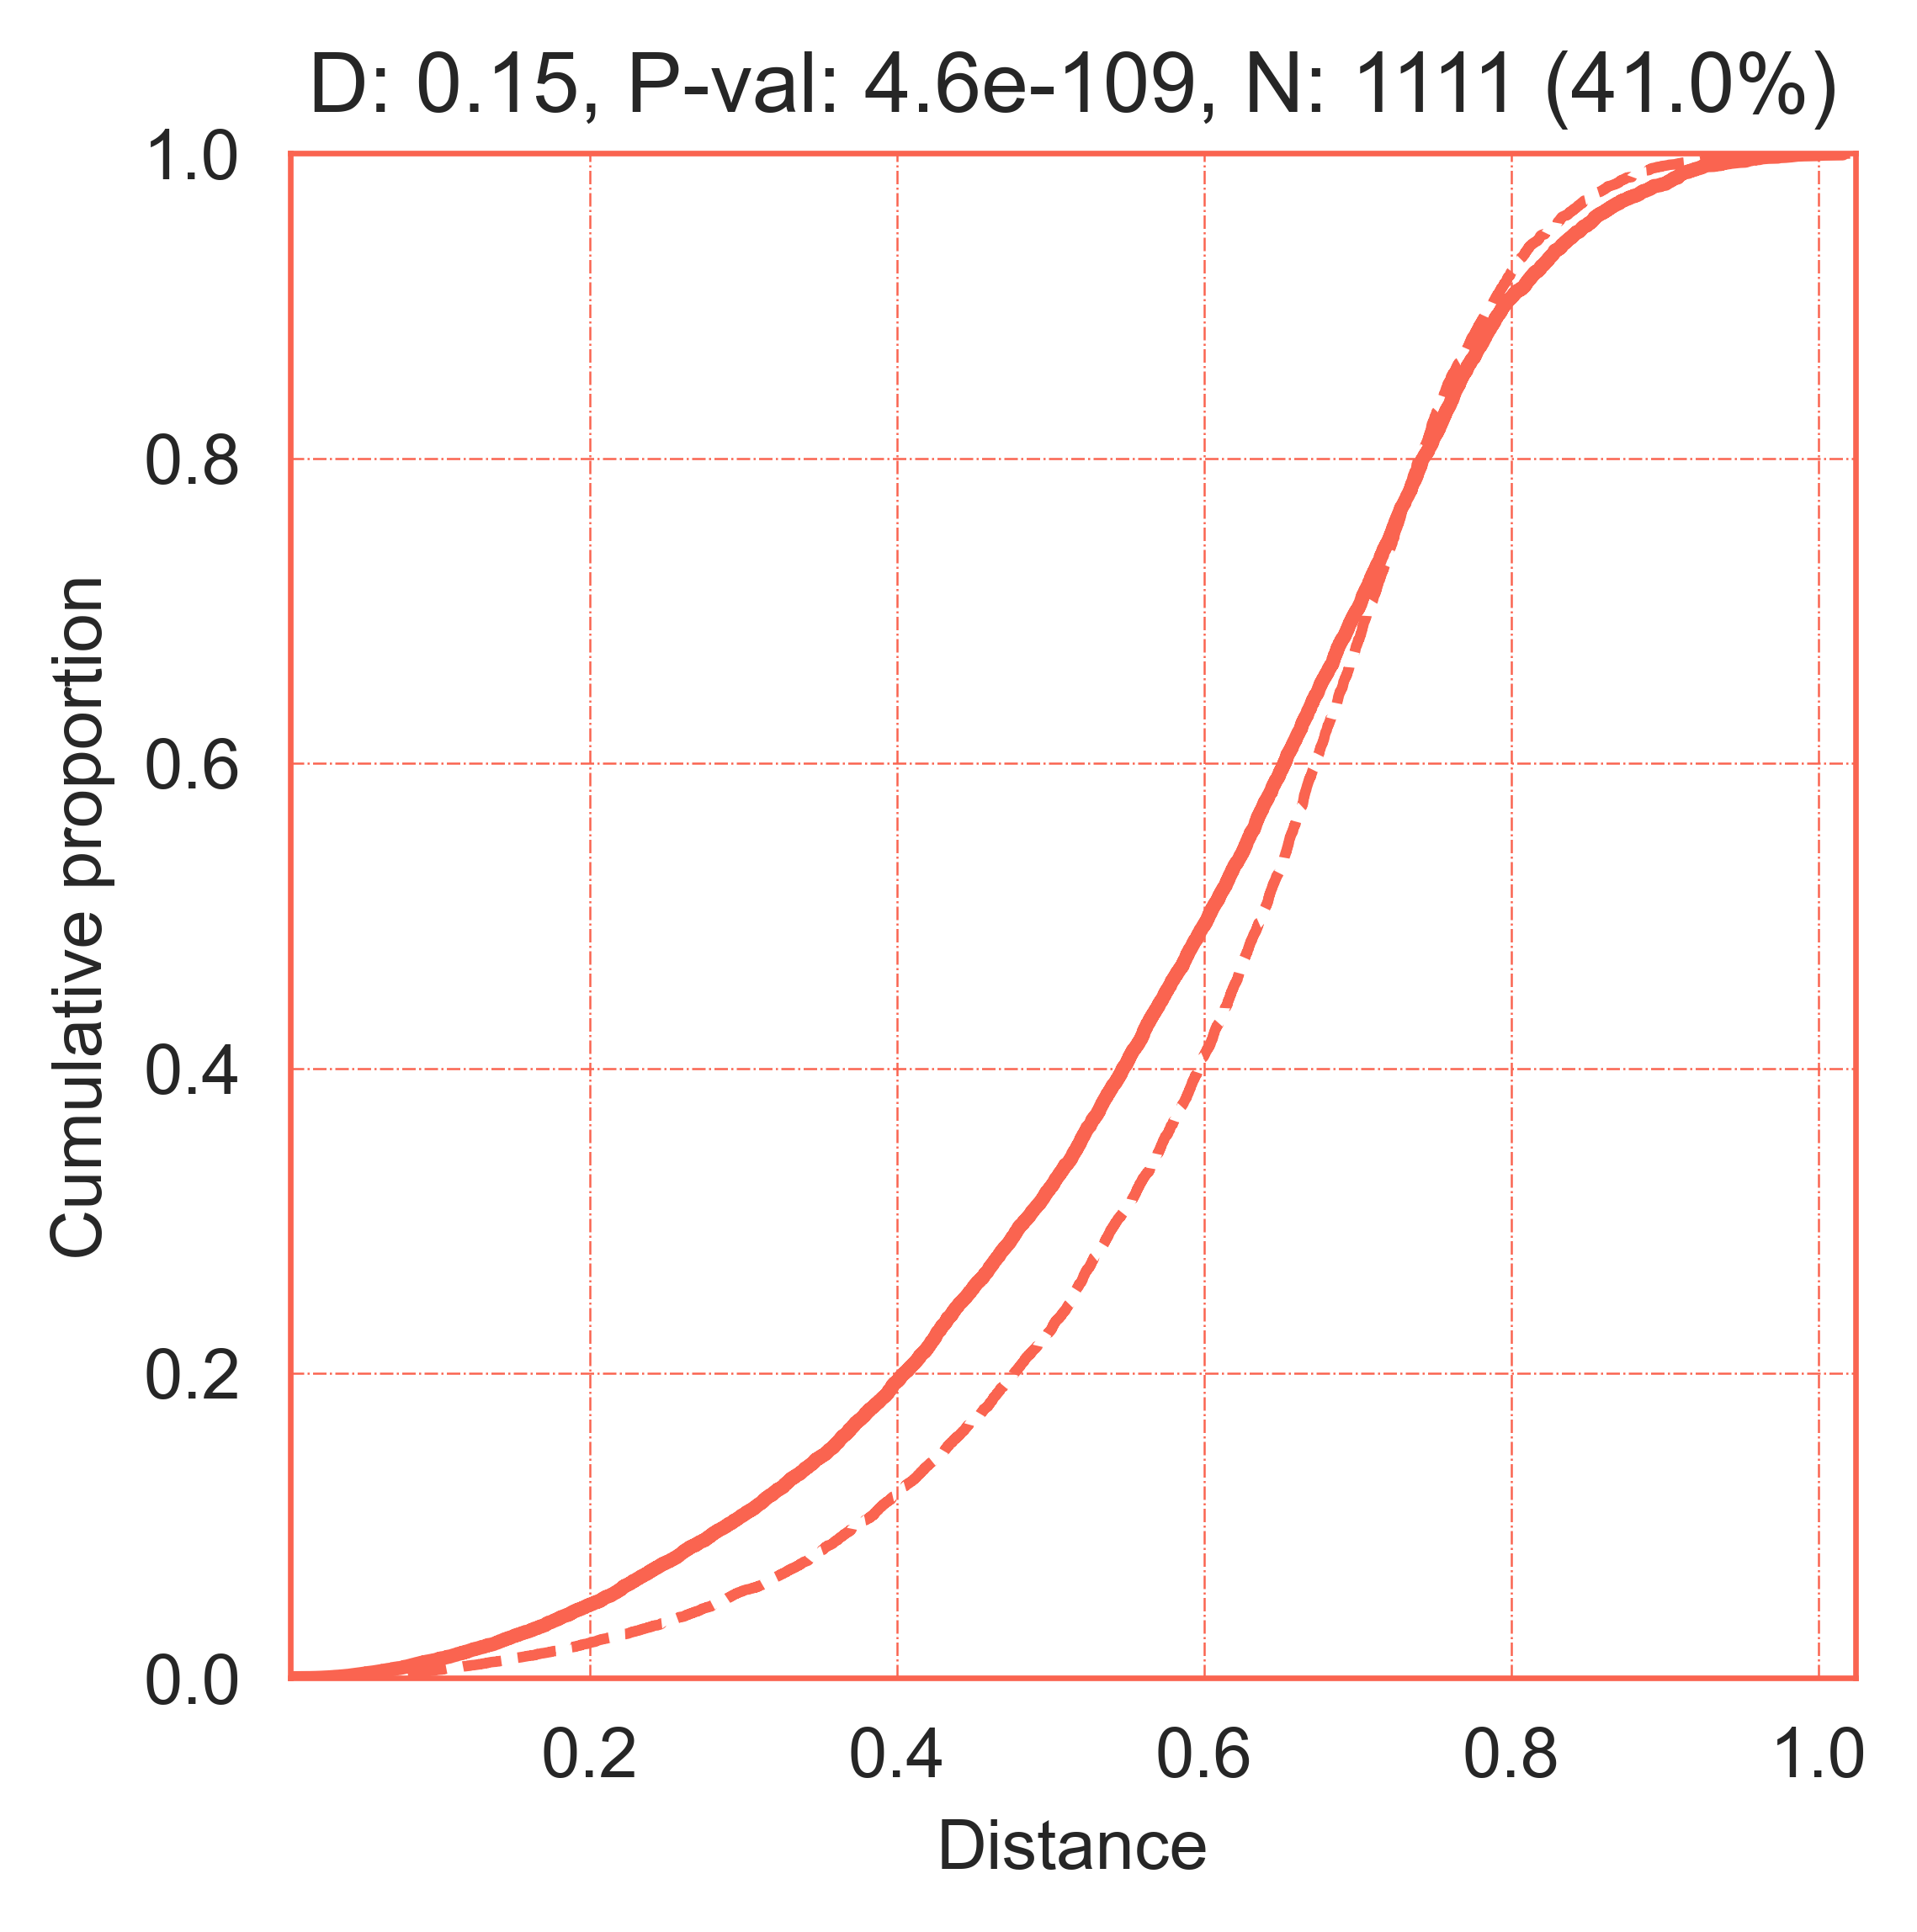

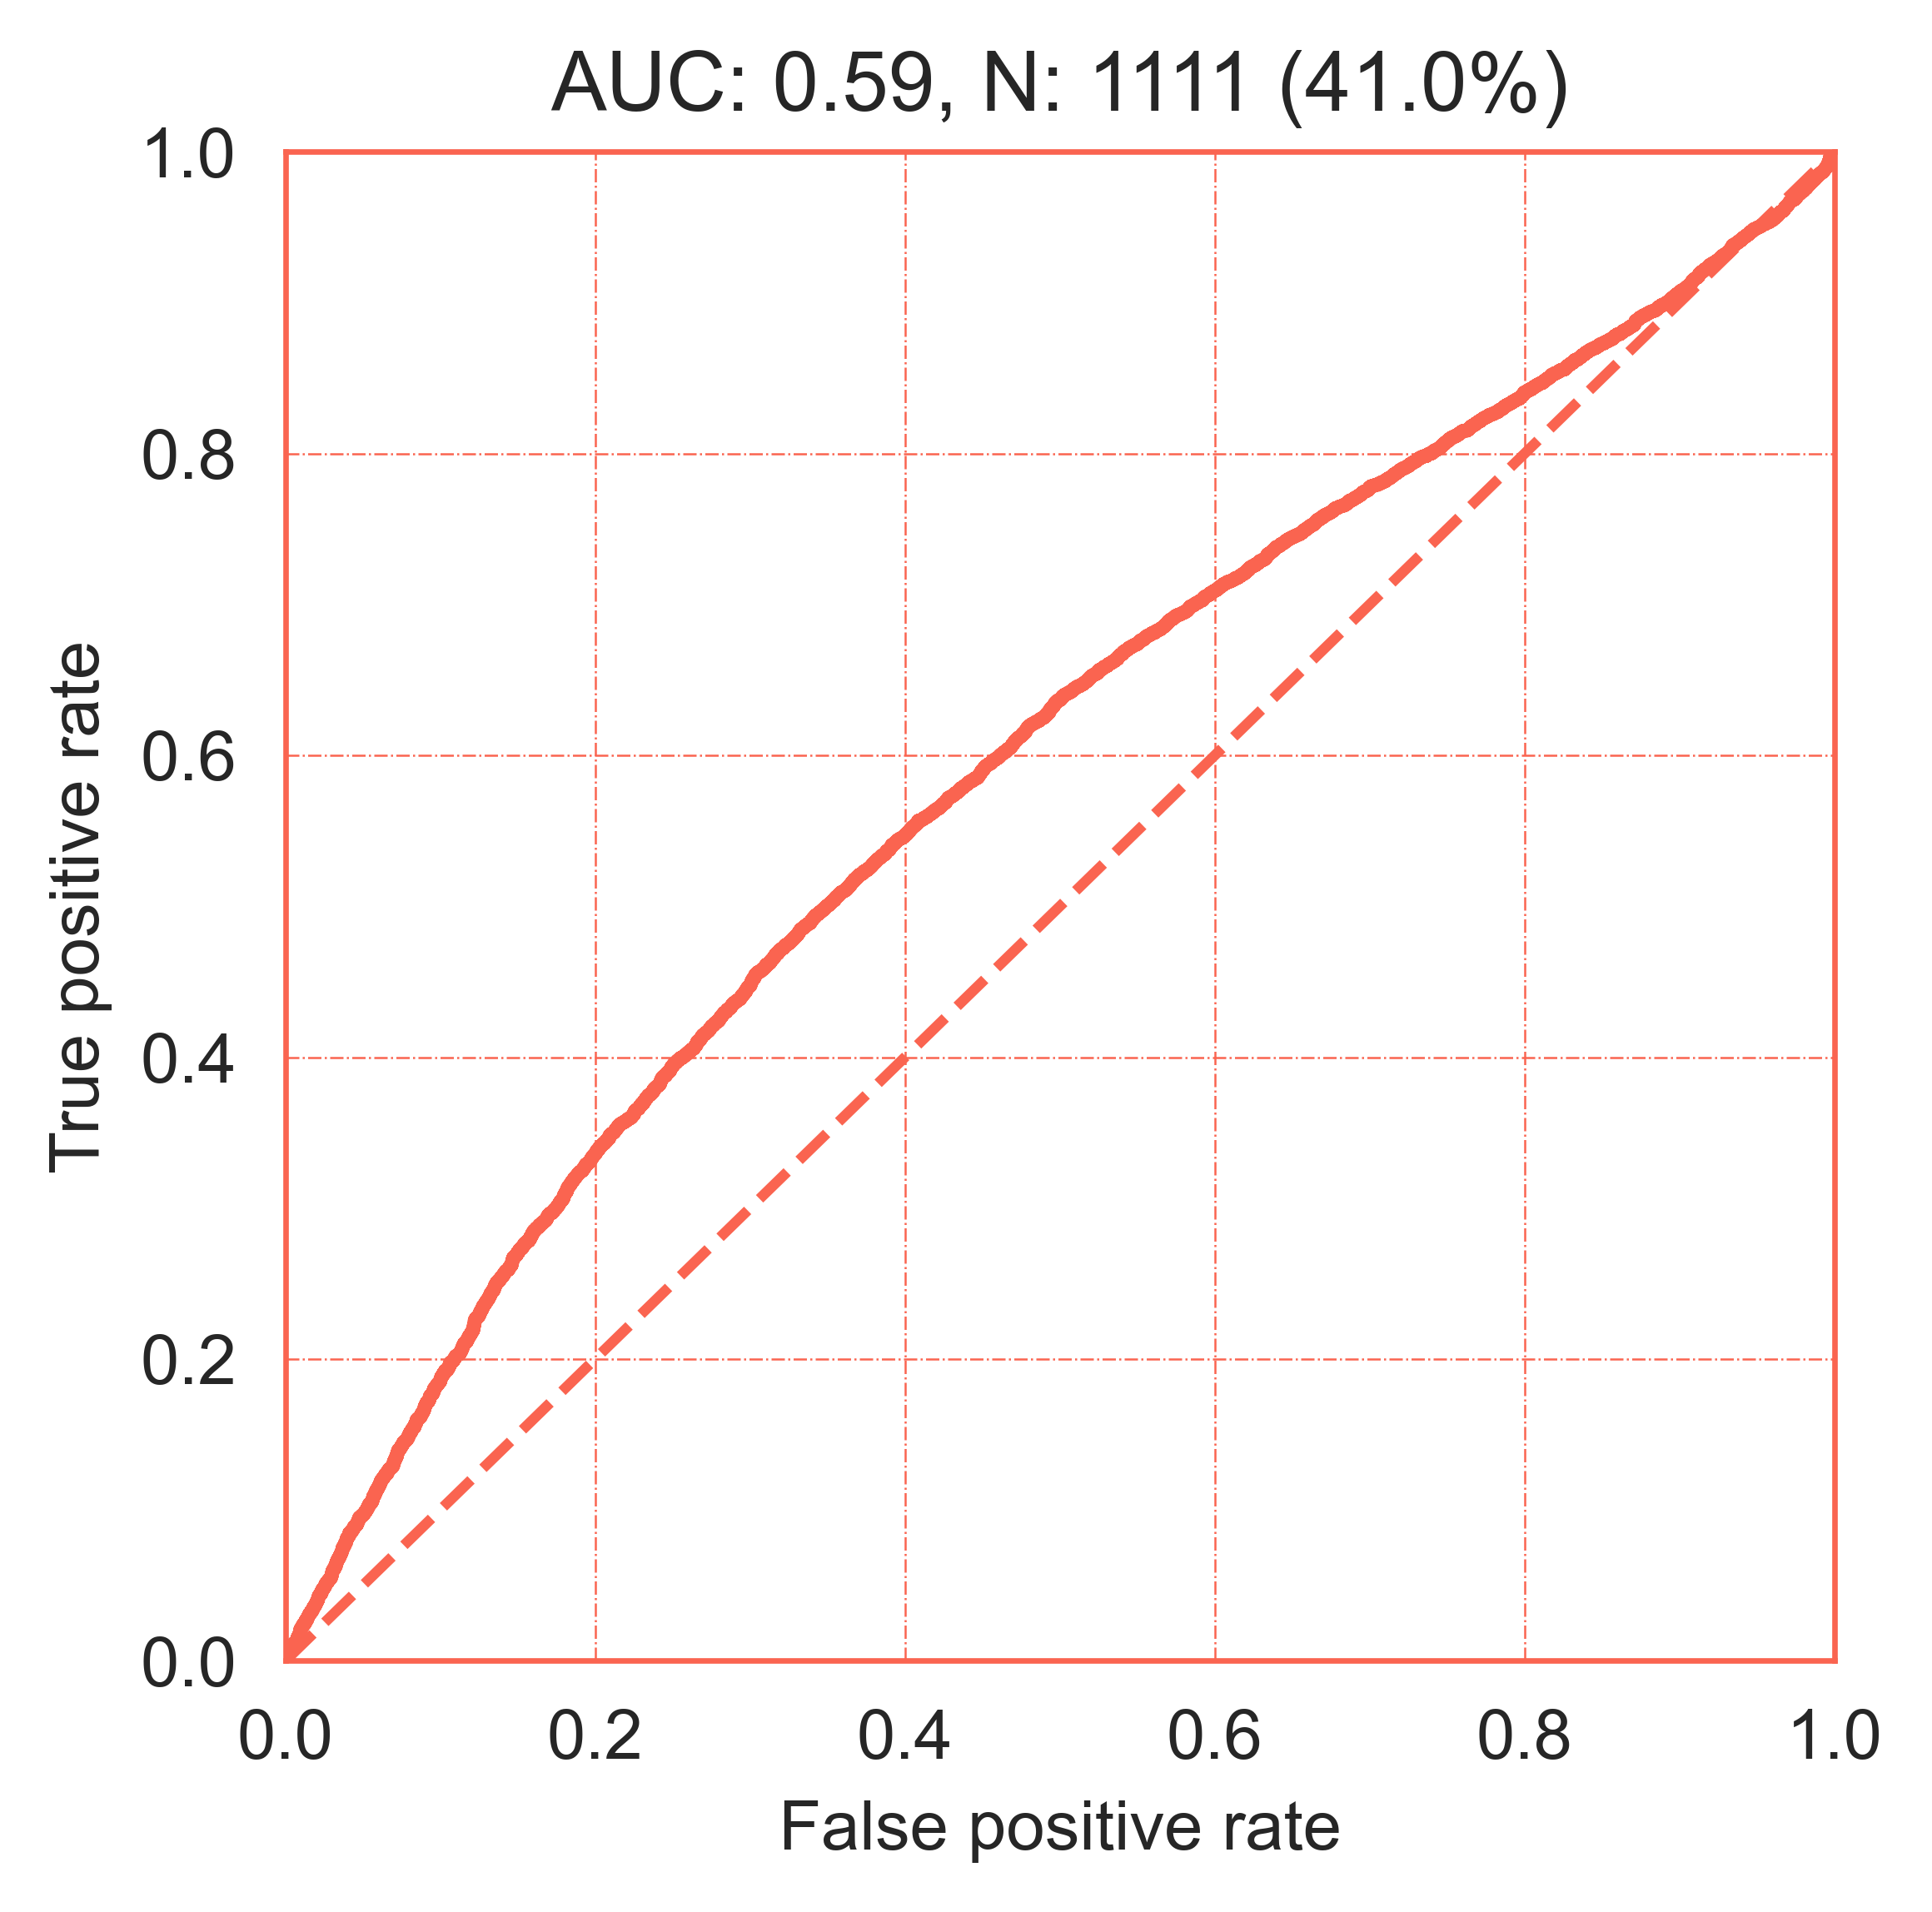

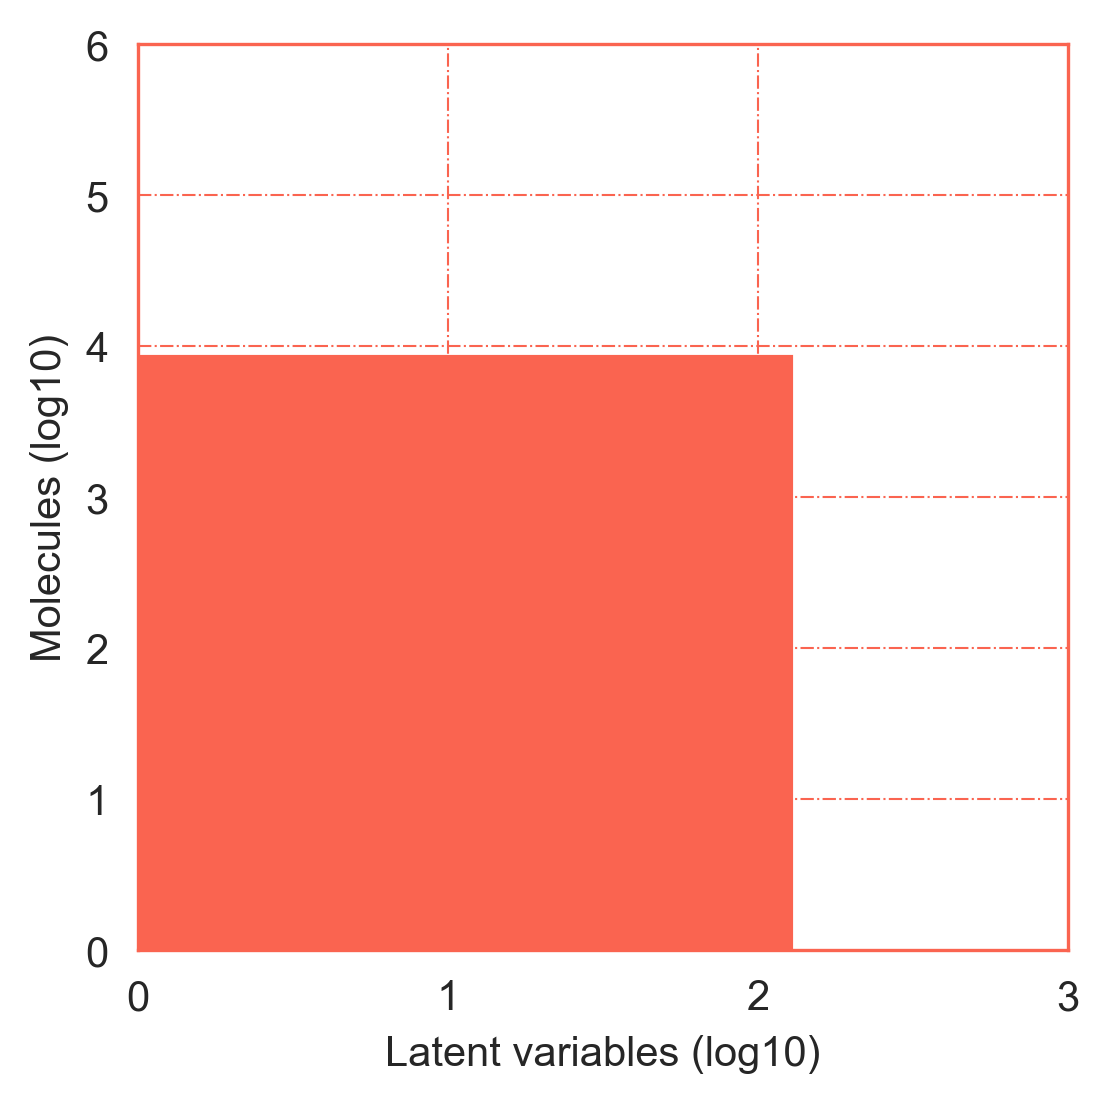

In [19]:
#sign2
sign2= cc.get_signature('sign2', 'reference', dataset )

if not sign2.is_fit():
    sign2.fit(sign1_ref, neigh1, oos_predictor=False)

#sign2.clear()
#sign2_ref.clear()
#if not sign2.is_fit():
#    sign2.fit(sign1_ref, neigh1, oos_predictor=False)

#sign2_ref = cc.get_signature('sign2', 'reference', dataset)
#if not sign2_ref.is_fit():
#    sign2_ref.fit(sign1_ref, neigh1, oos_predictor=False)



2021-07-29 22:16:19,586 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Reading subsamples
2021-07-29 22:16:19,592 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Getting all needed data.
2021-07-29 22:16:19,593 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2021-07-29 22:16:19,596 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2021-07-29 22:16:19,599 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2021-07-29 22:16:19,602 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2021-07-29 22:16:19,605 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2021-07-29 22:16:19,607 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2021-07-29 22:16:19,610 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across coverage
2021-07-29 22:16:19,612 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] kw_plotter: exemplary True
2021-07-29 22:16:19,614 chemicalchecker.core.diagnostic

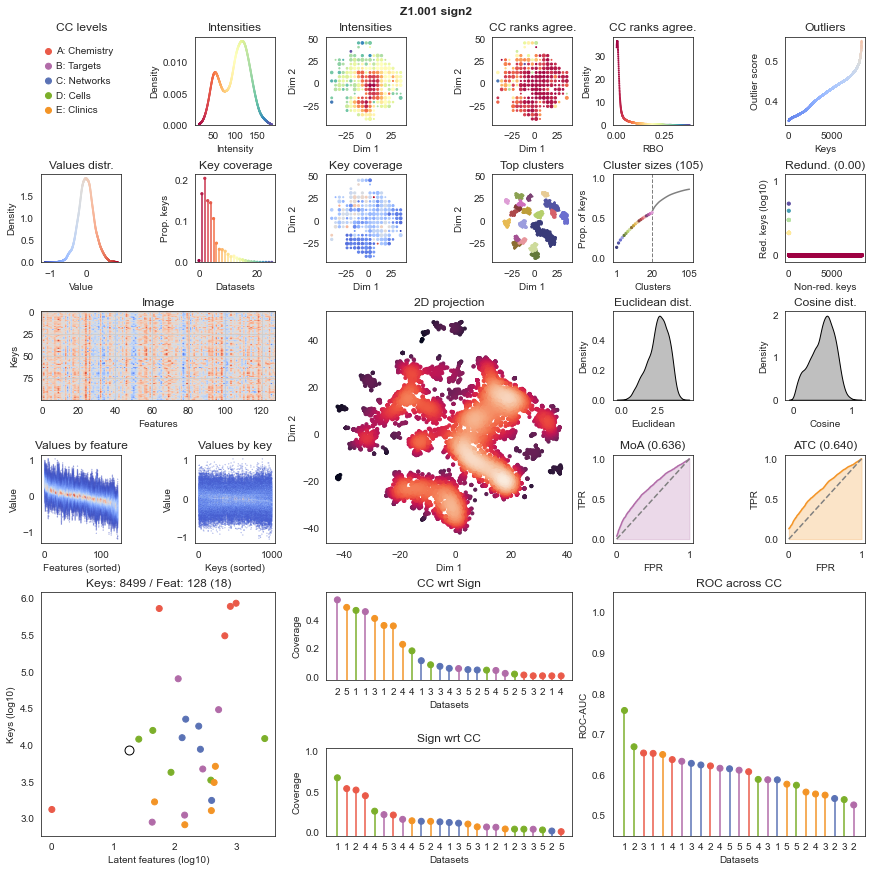

In [20]:
diagPlot(sign2)

In [5]:
sys.exit('Comment me!')

#sign3
sign3 = cc.get_signature('sign3','full', dataset)
sign3.clear()

# Create a list of sign2 objects to feed sign3 
sign2_list=[]
for space in "ABCDE":
    for num in (1,2,3,4,5):
        if space == 'D' and num == 1:
            ds = dataset
        else:
            ds= space+ str(num) + '.001'
            
        print("Appending sign2", ds)
        
        sign2_tmp= cc.get_signature('sign2','full',ds)
        sign2_list.append(sign2_tmp)
        

        
# Also add your own sign2
#sign2_list.append(sign2)

cc.set_verbosity('DEBUG')
sign3.fit_hpc(sign2_list, cpu=16)


2021-08-12 09:55:56,040 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.
2021-08-12 09:55:56,041 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/epareja/programs/cc/code/chemical_checker/package/chemicalchecker/util/config/cc_config.json
2021-08-12 09:55:56,082 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/epareja/programs/cc/code/chemical_checker/package/chemicalchecker/util/config/cc_config.json
2021-08-12 09:55:56,083 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2021-08-12 09:55:56,084 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge


Appending sign2 A1.001
Appending sign2 A2.001
Appending sign2 A3.001
Appending sign2 A4.001
Appending sign2 A5.001
Appending sign2 B1.001
Appending sign2 B2.001
Appending sign2 B3.001
Appending sign2 B4.001
Appending sign2 B5.001
Appending sign2 C1.001
Appending sign2 C2.001
Appending sign2 C3.001
Appending sign2 C4.001
Appending sign2 C5.001
Appending sign2 Z1.001
Appending sign2 D2.001
Appending sign2 D3.001
Appending sign2 D4.001
Appending sign2 D5.001
Appending sign2 E1.001
Appending sign2 E2.001
Appending sign2 E3.001
Appending sign2 E4.001
Appending sign2 E5.001


2021-08-12 09:55:57,063 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2021-08-12 09:55:57,064 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/epareja/cc/tmp_oye107is/job-sign3_fit_hpc.py.sh...
2021-08-12 09:55:57,067 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/epareja/cc/tmp_oye107is/job-sign3_fit_hpc.py.sh
2021-08-12 09:55:59,441 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 352707


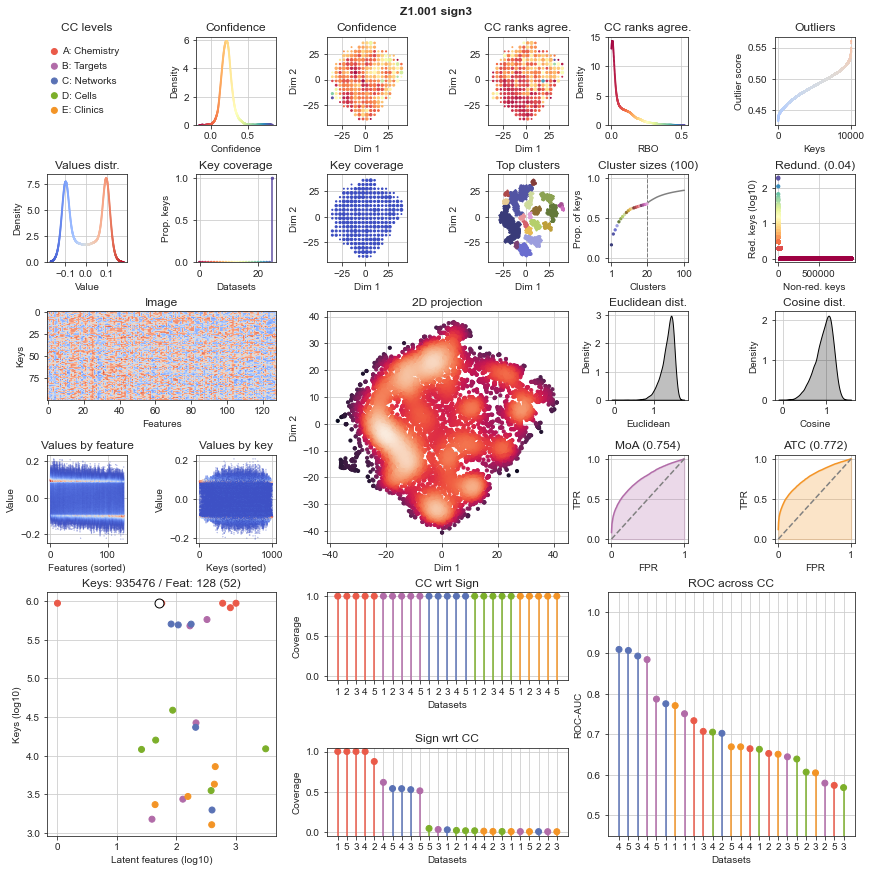

In [6]:
sign3 = cc.get_signature('sign3','full', dataset)
diagPlot(sign3)

In [ ]:
outdir = '/aloy/home/epareja/TFM/CC_LINCS_2020/'


In [7]:
with h5py.File('/aloy/home/epareja/TFM/CC_LINCS_2020/full/Z/Z1/Z1.001/sign2/sign2.h5', "r") as hf: 
    inchi_s2 = hf['keys'][:]
    Z1_s2 = hf['V'][:]

In [8]:
inchi_s2.shape

(8499,)

In [11]:
pwd


'/aloy/home/epareja/TFM/Script/LINCS/4_LINCS_2020'

In [ ]:
4_LINCS_2020/Z1_LINCS2020.ipynb